### Capstone  Project
By Mónica Atiaga

Batch - DSNB1222

<h1>SHOE BRAND CAPSTONE PROJECT</h1>


## Phase  3                                                                                30 marks

* Now make only 1 dataframe of 3 csv file using concat/merge /join operation of pandas and start doing EDA .

* Do the complete EDA in details to explore the insights of data and write the detailed observations of each analysis .

## Phase 4                                                                                20 marks

* Write the complete Machine learning code to make predictions of price and star rating. Use appropriate models on their label basis. Remember you need to make 2 different predictions: price and star rating.

* Apply all the best techniques of scaling ,hyperparameter tuning, avoid underfitting or overfitting (bias/variance)

* At the end save the best model and convey on which basis you have chosen that model. 




#### Submission guidelines :

1. You need to submit  only 3 files in Github . Only Github link will be accepted .

2. File 1 :  webscraping phase 1 file

3. File 2 :   SQL Queries phase 2 file

4. File 3 : EDA and Machine Learning  file  .


#### Note:

1. Make one repository on github and send link on last day of submission date.
2. Do not submit direct file in LMS. Only Github link will be accepted.
3. No extension will be provided.
4. Marks criteria will be followed.
5. Plagiarism work/ Use of any AI tool  will not be accepted or cancelled.



In [4]:
# Importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [5]:
# Read the CSV files into a DataFrame
df_table1 = pd.read_csv('datasets_final/Table1.csv', index_col=0)
df_table2 = pd.read_csv('datasets_final/Table2.csv', index_col=0)
df_table3 = pd.read_csv('datasets_final/Table3.csv', index_col=0)

### Merge the dataframes

In [6]:
# Concat the dataframes 
df_shoes = pd.concat([df_table1, df_table2, df_table3 ], axis=1)
df_shoes

ShoeName Category  no_colors  price_reduce  \
0                                   NaN    Women        1.0        115.00   
1                      Nike Gamma Force    Women        9.0         72.97   
2     Nike Court Vision Low Next Nature    Women        6.0         60.97   
3                      Nike Air Max 270    Women       12.0        120.97   
4                        Nike Air Max 1    Women        6.0        140.00   
...                                 ...      ...        ...           ...   
4417          Brown Sports Shoe for men      Men        1.0         57.56   
4418        PARIS KHAKI sneaker for men      Men        3.0         35.96   
4419       Dubai Khaki sneakers for men      Men        4.0         44.34   
4420              Navy sneakers for men      Men        2.0         23.72   
4421        Black Slip-on Shoes for men      Men        2.0         16.15   

       price   product_code  count_of_sizes color_1 color_2 color_3 color_4  \
0     115.00     DD1503-101              13   Black     NaN   White     NaN   
1      90.00     DX9176-101              15   Black    Blue   White     Red   
2      80.00     DH3158-107              15   Black    Blue   White     NaN   
3     160.00     DZ7736-002              15   Black    Blue   White     NaN   
4     140.00     DZ2628-102              13   Black    Blue   White     NaN   
...      ...            ...             ...     ...     ...     ...     ...   
4417   95.94  FGC0DY0S0082A               1     NaN     NaN     NaN     NaN   
4418   59.94  FGC0L4033131A               0     NaN    Blue     NaN     NaN   
4419   44.34  FGC0L4037301A               1   Black     NaN     NaN     NaN   
4420   39.54  FGC0Y9032792A               0   Black    Blue     NaN     NaN   
4421   21.54  FGC0Z7041652A               0   Black     NaN     NaN     NaN   

     other_color   product_code  n_reviews  size  comfort  quality  \
0            NaN     DD1503-101      617.0  49.0     78.0    44.66   
1           grey     DX9176-101      147.0  61.0     75.0    50.78   
2           pink     DH3158-107      199.0  59.0     78.0    46.67   
3          green     DZ7736-002        2.0   NaN      NaN      NaN   
4           grey     DZ2628-102       70.0  43.0     78.0    54.62   
...          ...            ...        ...   ...      ...      ...   
4417       brown  FGC0DY0S0082A        NaN   NaN      NaN      NaN   
4418       brown  FGC0L4033131A        NaN   NaN      NaN      NaN   
4419       green  FGC0L4037301A        NaN   NaN      NaN      NaN   
4420         NaN  FGC0Y9032792A        NaN   NaN      NaN      NaN   
4421        grey  FGC0Z7041652A        NaN   NaN      NaN      NaN   

      star_rating   product_code  
0             4.8     DD1503-101  
1             4.5     DX9176-101  
2             4.6     DH3158-107  
3             5.0     DZ7736-002  
4             4.6     DZ2628-102  
...           ...            ...  
4417          NaN  FGC0DY0S0082A  
4418          NaN  FGC0L4033131A  
4419          NaN  FGC0L4037301A  
4420          NaN  FGC0Y9032792A  
4421          NaN  FGC0Z7041652A  

[4422 rows x 19 columns]

In [7]:
df_shoes.columns

Index(['ShoeName', 'Category', 'no_colors', 'price_reduce', 'price',
       'product_code', 'count_of_sizes', 'color_1', 'color_2', 'color_3',
       'color_4', 'other_color', 'product_code', 'n_reviews', 'size',
       'comfort', 'quality', 'star_rating', 'product_code'],
      dtype='object')

In [8]:
# Set the columns names product_code to differenciate them
df_shoes.columns = ['ShoeName', 'Category', 'no_colors', 'price_reduce', 'price',
       'product_code', 'count_of_sizes', 'color_1', 'color_2', 'color_3',
       'color_4', 'other_color', 'product_code2', 'n_reviews', 'size',
       'comfort', 'quality', 'star_rating', 'product_code3']

In [9]:
# looking for differences in the data
df_shoes[~(df_shoes['product_code'].isna()) & ((df_shoes['product_code'] != df_shoes['product_code2']) | (df_shoes['product_code'] != df_shoes['product_code3']))]

Empty DataFrame
Columns: [ShoeName, Category, no_colors, price_reduce, price, product_code, count_of_sizes, color_1, color_2, color_3, color_4, other_color, product_code2, n_reviews, size, comfort, quality, star_rating, product_code3]
Index: []

The product_code matches in all three concatenated tables. Table1, Table2, and Table3 were concat into one dataset.

In [10]:
# Drop the repeated columns
df_shoes.drop(['product_code2', 'product_code3'], axis=1, inplace=True)

# 1. EDA Exploratory Data Analysis
## 1.1 First view 

In [11]:
df = df_shoes.copy()

In [12]:
df.head()

ShoeName Category  no_colors  price_reduce  price  \
0                                NaN    Women        1.0        115.00  115.0   
1                   Nike Gamma Force    Women        9.0         72.97   90.0   
2  Nike Court Vision Low Next Nature    Women        6.0         60.97   80.0   
3                   Nike Air Max 270    Women       12.0        120.97  160.0   
4                     Nike Air Max 1    Women        6.0        140.00  140.0   

  product_code  count_of_sizes color_1 color_2 color_3 color_4 other_color  \
0   DD1503-101              13   Black     NaN   White     NaN         NaN   
1   DX9176-101              15   Black    Blue   White     Red        grey   
2   DH3158-107              15   Black    Blue   White     NaN        pink   
3   DZ7736-002              15   Black    Blue   White     NaN       green   
4   DZ2628-102              13   Black    Blue   White     NaN        grey   

   n_reviews  size  comfort  quality  star_rating  
0      617.0  49.0     78.0    44.66          4.8  
1      147.0  61.0     75.0    50.78          4.5  
2      199.0  59.0     78.0    46.67          4.6  
3        2.0   NaN      NaN      NaN          5.0  
4       70.0  43.0     78.0    54.62          4.6

In [13]:
df.tail()

ShoeName Category  no_colors  price_reduce  price  \
4417     Brown Sports Shoe for men      Men        1.0         57.56  95.94   
4418   PARIS KHAKI sneaker for men      Men        3.0         35.96  59.94   
4419  Dubai Khaki sneakers for men      Men        4.0         44.34  44.34   
4420         Navy sneakers for men      Men        2.0         23.72  39.54   
4421   Black Slip-on Shoes for men      Men        2.0         16.15  21.54   

       product_code  count_of_sizes color_1 color_2 color_3 color_4  \
4417  FGC0DY0S0082A               1     NaN     NaN     NaN     NaN   
4418  FGC0L4033131A               0     NaN    Blue     NaN     NaN   
4419  FGC0L4037301A               1   Black     NaN     NaN     NaN   
4420  FGC0Y9032792A               0   Black    Blue     NaN     NaN   
4421  FGC0Z7041652A               0   Black     NaN     NaN     NaN   

     other_color  n_reviews  size  comfort  quality  star_rating  
4417       brown        NaN   NaN      NaN      NaN          NaN  
4418       brown        NaN   NaN      NaN      NaN          NaN  
4419       green        NaN   NaN      NaN      NaN          NaN  
4420         NaN        NaN   NaN      NaN      NaN          NaN  
4421        grey        NaN   NaN      NaN      NaN          NaN

In [14]:
# checking the dimension of the dataset
df.shape

print(f"The rows and columns in the dataset: {df.shape}")
print(f"\nThe column headers in the dataset: {df.columns}")

The rows and columns in the dataset: (4422, 17)

The column headers in the dataset: Index(['ShoeName', 'Category', 'no_colors', 'price_reduce', 'price',
       'product_code', 'count_of_sizes', 'color_1', 'color_2', 'color_3',
       'color_4', 'other_color', 'n_reviews', 'size', 'comfort', 'quality',
       'star_rating'],
      dtype='object')


In [15]:
print(f"Number of Unique values in 'price': {df.price.nunique()}")
print(f"Number of Unique values in 'price_reduce': {df.price_reduce.nunique()}")
print(f"Number of Unique values in 'star_rating': {df.star_rating.nunique()}")

Number of Unique values in 'price': 95
Number of Unique values in 'price_reduce': 376
Number of Unique values in 'star_rating': 32


This dataset comprises 4,422 rows and 17 columns. Among these, the variables 'price'/'price_reduce' and 'star_rating' are designated as targets for distinct analytical approaches. The remaining 15 variables serve as independent variables, as outlined in Phase 01 of the Capstone Project and below.

We aim to analyze 'price'/'price_reduce' and 'star_rating' as regression problems during the Exploratory Data Analysis (EDA) phase. 

#### Description of the columns

- ShoeName: Represent the name of the shoe
- Category: Represen if the shoe belongs to the men's or Women's category, but some brands have a more detailed category. e.g. "Men's Football" or "Women Basketball"
- no_colors: number of colors in total available, could be more than the 5 colors specified in the data gathered as was specified
- price_reduce: shoe price with a discount applied, could considered the real price at the moment
- price: regular shoe price
- product_code: style or product code to identify the shoe
- count_of_sizes: number of sizes available 
- color_1: represent if the shoe is available in "Black" color
- color_2: represent if the shoe is available in a "Blue" color
- color_3: represent if the shoe is available in "White" color
- color_4: represent if the shoe is available in "Red" color
- ohter_color: other representative colors available for the shoe. e.g. "Green", "Yellow", "Gold", "Pink", etc.
- n_reviews: number of reviews 
- size:  metric to evaluate how fits the shoe and is given in percentage
- comfort:  metric to evaluate how comfortable the shoe is and is given in percentage
- quality:  metric to evaluate durability /quality/performance of the shoe and is given in percentage
- star_rating: metric from 0 to 5 


In [16]:
# checking the types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4422 entries, 0 to 4421
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ShoeName        4421 non-null   object 
 1   Category        4422 non-null   object 
 2   no_colors       4205 non-null   float64
 3   price_reduce    4406 non-null   float64
 4   price           4406 non-null   float64
 5   product_code    4334 non-null   object 
 6   count_of_sizes  4422 non-null   int64  
 7   color_1         3300 non-null   object 
 8   color_2         1829 non-null   object 
 9   color_3         3389 non-null   object 
 10  color_4         1547 non-null   object 
 11  other_color     2995 non-null   object 
 12  n_reviews       3895 non-null   float64
 13  size            2916 non-null   float64
 14  comfort         2954 non-null   float64
 15  quality         3339 non-null   float64
 16  star_rating     3895 non-null   float64
dtypes: float64(8), int64(1), object(8

There are three types of data (float64, int64, and object ) present in the dataset, which corresponding features according to the data type will be listed as follows:

In [17]:
# List object variables
object_vars = df.select_dtypes(include='object').columns.tolist()
print(f"Object/Categorical variables:\n{object_vars}\n{len(object_vars)} in total\n")

# List int64 variables
int_vars = df.select_dtypes(include='int64').columns.tolist()
print(f"int64 variables:\n{int_vars}\n{len(int_vars)} in total\n")

# List float64 variables
float_vars = df.select_dtypes(include='float64').columns.tolist()
print(f"float64 variables:\n{float_vars}\n{len(float_vars)} in total\n")

Object/Categorical variables:
['ShoeName', 'Category', 'product_code', 'color_1', 'color_2', 'color_3', 'color_4', 'other_color']
8 in total

int64 variables:
['count_of_sizes']
1 in total

float64 variables:
['no_colors', 'price_reduce', 'price', 'n_reviews', 'size', 'comfort', 'quality', 'star_rating']
8 in total



## 1.2 Missing values
### 1.2.1 Inspecting the dataset

In [18]:
# checking the null values
missing_val = df.isnull().sum().to_frame("Null values")

# Calculate the % of the null values
missing_val["% of missing"] = round(missing_val['Null values'] / len(df) * 100,2)

missing_val

Null values  % of missing
ShoeName                  1          0.02
Category                  0          0.00
no_colors               217          4.91
price_reduce             16          0.36
price                    16          0.36
product_code             88          1.99
count_of_sizes            0          0.00
color_1                1122         25.37
color_2                2593         58.64
color_3                1033         23.36
color_4                2875         65.02
other_color            1427         32.27
n_reviews               527         11.92
size                   1506         34.06
comfort                1468         33.20
quality                1083         24.49
star_rating             527         11.92

In [19]:
print(f"The dataset presents {df.isnull().sum().sum()} missing values.")

The dataset presents 14499 missing values.


Some columns present null values, so it is important to make a deep analysis to determine how to treat each column.
- The color columns have the highest percentage of null values, for example, column color_4(red) and color_2(blue) have 65.02% and 58.64% null values respectively. However, these columns (color_1, color_2, color_3, and color_4) represent the absence or presence of a determined color as an option, so these are 0/1 columns to represent whether the shoe is available or not in a specific color. Then, if the value is null will be considered 0 which means that color is not available.
- The other_color column, which has 32.27% null values, has assorted colors available for the shoe, so could be imputed with the data in the other color columns.
- The missing values in no_colors could be imputed from the data in color columns. As well, the missing values in n_reviews, size, comfort, quality, and star_rating could be imputed with the mean.
- the product_code column will be analyzed with other columns with missing values, if a row has more than 50% missing values perhaps is better to drop it.

The aim of the project is to build a model to predict the price and the star rating based on the data gathered from differents sites like Nike, Adidas, Puma, and WoodLand. Therefore, the null values in this columns will be treated specially.

### 1.2.2 Heatmap with missing values

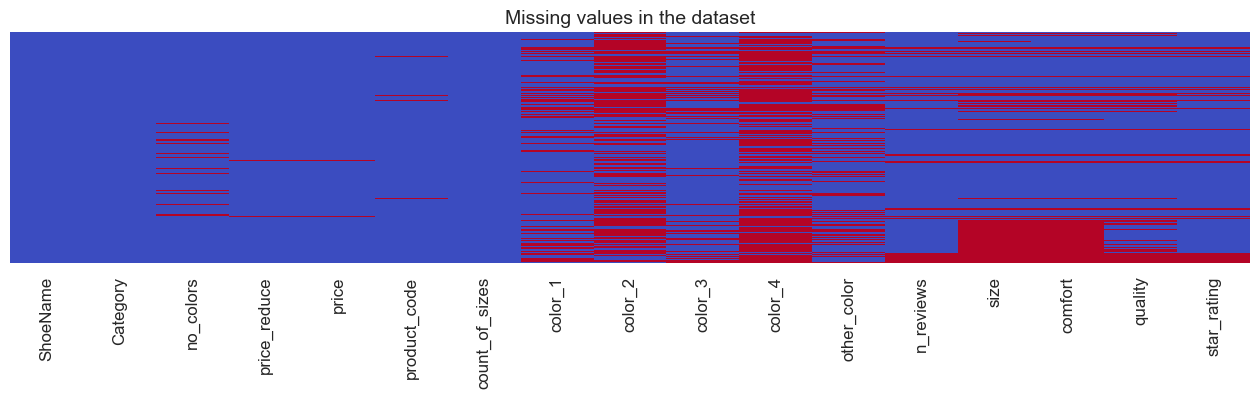

In [20]:
# Style settings
sns.set_style('whitegrid')
sns.set(font_scale=1.1)  
sns.set_palette('vlag')
plt.figure(figsize=(16,3))

# Let's visualize it using heatmap
sns.heatmap(df.isnull(), yticklabels=False, cmap='coolwarm', cbar=False)
plt.title('Missing values in the dataset', fontsize=14);

### 1.2.3 Correcting no_colors
We will use the data in columns color_1, color_2, color_3, color_4, and other_color to fill the null values of no_colors since this column represents the number of available colors per shoe. Perhaps, during the web scraping process, this info could not be gathered.

In [21]:
# Counts non-null values in row, color columns
def count_colors(row):
    val = np.sum(~row.isna())
    return (val if val!=0 else None)

# If the value is nan then calculates the number of colors present in the colors columns
df['no_colors'] = df.apply(lambda row: row['no_colors'] if pd.notna(row['no_colors']) else count_colors(row[['color_1', 'color_2', 'color_3', 'color_4', 'other_color']]), axis=1)

In [22]:
print(f" After correcting n_colors we still have {df['no_colors'].isna().sum()} records with missing values.")

 After correcting n_colors we still have 13 records with missing values.


### 1.2.4 Rows with no info

In [23]:
# Calculate the number of missing values by row
df['missing_by_row'] = df.isna().sum(axis=1)

# Show the records according with the missing values by row
df['missing_by_row'].value_counts().to_frame().sort_index(ascending=False)

missing_by_row
11              62
10             144
9               60
8              146
7              206
6              316
5              319
4              310
3              650
2              820
1              702
0              687

Statistically speaking, if the number of missing observations is less than 5% of the sample, we can drop them. 

There are two groups with 10 and 11 null values corresponding to 144 and 62 rows, 206 in total that represents 4.66% of the data. Then, we will set the threshold as 10 and drop these 206 rows.

In [24]:
df[df['missing_by_row'] >= 10].isnull().sum().to_frame("Null values")

Null values
ShoeName                  0
Category                  0
no_colors                 0
price_reduce              0
price                     0
product_code             62
count_of_sizes            0
color_1                 206
color_2                 206
color_3                 206
color_4                 206
other_color             206
n_reviews               206
size                    206
comfort                 206
quality                 206
star_rating             206
missing_by_row            0

The rows to drop have null values in columns: product_code, color_1, color_2, color_3, color_4, other_color, n_reviews, size, comfort, quality, and star_rating.

We will set the threshold as 10 and drop all the rows with 10 or more null values.

In [25]:
# Drop the rows with 10 or more missing values per row.
threshold = 10
df = df[df['missing_by_row'] < threshold]

# Drop column missing_by_row
df.drop('missing_by_row', axis=1, inplace=True)

print(f"The new dimension of the dataset is {df.shape}")

The new dimension of the dataset is (4216, 17)


####  Check for missing values

In [26]:
df.isnull().sum().sum()

12173

The rest of the missing values will be treated in further sections, but first, we will do EDA.

## 1.3 Features Analysis
### 1.3.1 Unique values

In [27]:
# Reviewing the number of unique values in each feature and the target
info_df = df.nunique().to_frame('No. of unique values')
info_df['type'] = df.dtypes.values

# List of categorical variables
display(info_df[(info_df['type'] == 'object')])
display(info_df[(info_df['type'] != 'object')])


No. of unique values    type
ShoeName                      2225  object
Category                        70  object
product_code                  3577  object
color_1                          1  object
color_2                          1  object
color_3                          1  object
color_4                          1  object
other_color                     18  object

No. of unique values     type
no_colors                         27  float64
price_reduce                     374  float64
price                             94  float64
count_of_sizes                    28    int64
n_reviews                        490  float64
size                             636  float64
comfort                          650  float64
quality                         1209  float64
star_rating                       32  float64

In [28]:
df['ShoeName'].value_counts()

NMD_R1 Shoes                                59
Avryn Shoes                                 40
Ultraboost Light Running Shoes              39
Superstar Shoes                             31
X_PLRBOOST Shoes                            24
                                            ..
Nike Offcourt (NFL Detroit Lions)            1
Nike Offcourt (NFL Los Angeles Rams)         1
Nike Offcourt (NFL Seattle Seahawks)         1
Nike Offcourt (NFL Tampa Bay Buccaneers)     1
Black Slip-on Shoes for men                  1
Name: ShoeName, Length: 2225, dtype: int64

Regarding the dataset's unique values:

- The 'product_code' column exhibits high cardinality with 3,577 unique values among the 4,422 rows, making up roughly 80.9% of the data. While it may not significantly contribute to the model, it will be utilized for imputing some missing values. However, it is advisable to consider dropping this feature post imputation to streamline the dataset.

- The 'ShoeName' column also presents high cardinality, featuring 2,225 unique values out of 4,422 records, more than 50%. An examination of unique values reveals instances where multiple shoes share the same name. Further analysis is warranted to determine if encoding based on characteristics is applicable.

- The columns 'color_1', 'color_2', 'color_3', and 'color_4' contain only a single unique value each, representing specific colors. These will be transformed into binary columns (0/1).

- The project specification doesn't specify whether the Price considered for the prediction model should be the entire price or the reduced price. During Phase 01 when data was collected, both prices were fetched since the reduced price could be considered the actual or final price.

**'price'/'price_reduce' - Regression Problem:** 'price' is the target variable with 94 unique values among the 4,422 total dataset entries. This suggests a regression problem, given that the target variable is continuous and numerical.

**'star_rating' - Regression Problem:** 'star_rating' is another target variable with 32 unique values among the 4,422 total dataset entries. Given the substantial number of unique values, 32 in this case, we will also treat this as a regression problem.

#### 1.3.1.1 Price and Price_reduce unique values

In [29]:
# Inspect the unique values of the target variable
column = 'price'
print(f"Feature {column}:\n{df[column].value_counts(dropna=False)}\n")
print(f"Unique values: {sorted(df[column].unique())}")

Feature price:
140.00    374
110.00    328
160.00    274
100.00    254
120.00    254
         ... 
51.54       1
63.00       1
119.94      1
58.74       1
21.54       1
Name: price, Length: 95, dtype: int64

Unique values: [21.54, 23.94, 25.0, 25.14, 26.0, 26.34, 27.54, 28.0, 28.74, 29.94, 30.0, 31.14, 32.34, 33.54, 34.74, 35.0, 35.94, 39.54, 40.0, 43.14, 44.34, 45.0, 45.54, 47.94, 50.0, 51.54, 53.94, 55.0, 58.74, 59.94, 60.0, 63.0, 63.54, 65.0, 65.94, 70.0, 71.94, 75.0, 75.54, 77.94, 80.0, 83.94, 85.0, 89.94, 90.0, 95.0, 95.94, 100.0, 101.94, 105.0, 107.94, 110.0, 115.0, 119.94, 120.0, 125.0, 130.0, 131.94, 135.0, 140.0, 145.0, 150.0, 155.0, 160.0, 165.0, 167.94, 170.0, 175.0, 180.0, 185.0, 190.0, 195.0, 200.0, 205.0, 210.0, 220.0, 225.0, 230.0, 240.0, 250.0, 260.0, 270.0, 275.0, 280.0, 285.0, 295.0, 300.0, 305.0, 320.0, 400.0, nan, 330.0, 350.0, 450.0, 600.0]


In [30]:
# Inspect the unique values of the target variable
column = 'price_reduce'
print(f"Feature {column}:\n{df[column].value_counts(dropna=False)}\n")

Feature price_reduce:
90.00     123
120.00    121
140.00    113
56.00      94
80.00      86
         ... 
84.99       1
73.00       1
47.00       1
111.00      1
16.15       1
Name: price_reduce, Length: 375, dtype: int64



The target variables 'price' and 'price_reduce' has 95 and 375 unique values of the 4,422 rows in the dataset. In order to predict this feature we need to build a regression model.

#### 1.3.1.2 Star rating unique values

In [31]:
# Inspect the unique values of the target variable
column = 'star_rating'
print(f"Feature {column}:\n{df[column].value_counts()}")
print(f"Unique values: {df[column].unique()}")
print(f"# unique values: {df[column].nunique()}")

Feature star_rating:
4.6    503
4.7    503
4.5    439
5.0    403
0.0    390
4.4    345
4.8    332
4.3    217
4.0    149
4.2    145
4.9    126
4.1     70
3.0     53
3.9     36
3.8     36
3.5     32
3.7     29
3.3     15
3.6     15
1.0     14
2.0     11
3.4      8
3.1      7
2.5      4
3.2      3
2.3      3
1.9      2
2.7      1
2.6      1
2.8      1
1.8      1
1.6      1
Name: star_rating, dtype: int64
Unique values: [4.8 4.5 4.6 5.  4.7 4.4 0.  1.  4.  4.3 4.1 3.5 3.9 4.9 3.3 3.  nan 4.2
 3.8 3.6 3.7 2.7 2.  3.2 2.5 3.4 2.6 2.8 1.8 3.1 2.3 1.6 1.9]
# unique values: 32


The target variable 'star_rating' has 32 unique values of the 4422 rows in the dataset. In order to predict this feature we will build a regression model.

#### 1.3.1.3 Independent variables unique values

We will separate the numerical discrete variables from the continuous.

In [32]:
# Separating Numerical and Categorical columns
categorical_col =  df.select_dtypes(include='object').columns.tolist()
numerical_col =  df.select_dtypes(include=np.number).columns.tolist()

# Remove the target variables since they will be analyzed separately
numerical_col.remove('price')
numerical_col.remove('price_reduce')
numerical_col.remove('star_rating')

#  Numerical and Categorical columns
print(f"Categorical Columns:\n {categorical_col}\n")
print(f"Numerical Columns:\n {numerical_col}\n")

Categorical Columns:
 ['ShoeName', 'Category', 'product_code', 'color_1', 'color_2', 'color_3', 'color_4', 'other_color']

Numerical Columns:
 ['no_colors', 'count_of_sizes', 'n_reviews', 'size', 'comfort', 'quality']



#### Categorical columns

In [33]:
for i, column in enumerate(categorical_col):
    print(f"{i+1}.Feature {column}:\n{df[column].value_counts(dropna=False)}")
    print(f"# unique values: {df[column].nunique()}\n")

1.Feature ShoeName:
NMD_R1 Shoes                                59
Avryn Shoes                                 40
Ultraboost Light Running Shoes              39
Superstar Shoes                             31
Superstar XLG Shoes                         24
                                            ..
Nike Offcourt (NFL Detroit Lions)            1
Nike Offcourt (NFL Los Angeles Rams)         1
Nike Offcourt (NFL Seattle Seahawks)         1
Nike Offcourt (NFL Tampa Bay Buccaneers)     1
Black Slip-on Shoes for men                  1
Name: ShoeName, Length: 2226, dtype: int64
# unique values: 2225

2.Feature Category:
Men                                 1417
Women                                861
Men's Originals                      309
Women's Originals                    172
Women's Running                      104
                                    ... 
Men's Y-3                              1
Women's HIIT                           1
Men's adidas by Stella McCartney       1
Men's Tr

#### Numerical columns

In [34]:
for i, column in enumerate(numerical_col):
    print(f"{i+1}.Feature {column}:\n{df[column].value_counts(dropna=False)}")
    print(f"# unique values: {df[column].nunique()}\n")

1.Feature no_colors:
2.0     1079
1.0     1019
3.0      579
4.0      351
5.0      254
6.0      197
7.0      154
8.0       88
9.0       68
10.0      57
11.0      49
22.0      40
17.0      39
12.0      36
50.0      30
18.0      27
45.0      23
14.0      22
13.0      20
15.0      17
NaN       13
34.0      13
16.0      10
39.0      10
28.0       8
24.0       5
23.0       4
19.0       4
Name: no_colors, dtype: int64
# unique values: 27

2.Feature count_of_sizes:
0     431
12    323
1     311
13    307
2     261
15    244
10    234
3     220
17    217
6     197
4     189
11    163
5     148
7     128
9     120
16    119
8     117
14    115
19    107
18     91
20     53
21     35
22     35
23     23
25     12
26      7
24      7
27      2
Name: count_of_sizes, dtype: int64
# unique values: 28

3.Feature n_reviews:
0.0       390
NaN       321
1.0       244
2.0       160
3.0       125
         ... 
329.0       1
2540.0      1
228.0       1
390.0       1
702.0       1
Name: n_reviews, Length: 49

### 1.3.3 Summary statistics of the numerical and non-numerical variables

In [35]:
# Summary statistics of numerical columns
stats = df.describe()
stats

no_colors  price_reduce        price  count_of_sizes     n_reviews  \
count  4203.000000   4200.000000  4200.000000     4216.000000   3895.000000   
mean      4.662384     96.501731   130.832981        8.874526    357.563543   
std       6.754693     49.207574    57.874860        6.393588   1291.539132   
min       1.000000     12.000000    21.540000        0.000000      0.000000   
25%       2.000000     61.160000    90.000000        3.000000      4.000000   
50%       3.000000     88.000000   120.000000        9.000000     30.000000   
75%       5.000000    120.000000   160.000000       14.000000    172.000000   
max      50.000000    450.000000   600.000000       27.000000  11565.000000   

              size      comfort    quality  star_rating  
count  2916.000000  2954.000000  3339.0000  3895.000000  
mean     49.611717    82.099804        inf     4.032914  
std       9.151360    11.545312        NaN     1.421609  
min      10.000000     0.000000     0.0000     0.000000  
25%      47.000000    76.617000    61.8200     4.200000  
50%      50.000000    82.758600    83.3300     4.500000  
75%      52.941200    88.194400    89.2287     4.700000  
max     100.000000   100.000000        inf     5.000000

In [36]:
# Look at the non numeric columns
df.describe(exclude=[np.number])

ShoeName Category product_code color_1 color_2 color_3 color_4  \
count           4215     4216         4190    3300    1829    3389    1547   
unique          2225       70         3577       1       1       1       1   
top     NMD_R1 Shoes      Men       ID4122   Black    Blue   White     Red   
freq              59     1417            3    3300    1829    3389    1547   

       other_color  
count         2995  
unique          18  
top           grey  
freq          1774

**Observations**
- The dataset contains null values, and the column 'quality' must be reviewed because it has inf values.

Next, we will analyze the skewness present in the columns, and infer the present of outliers.

In [37]:
# Contrast the mean with the 50th percentile
(stats.loc['mean',:] - stats.loc['50%',:]).sort_values(ascending=False)

quality                  inf
n_reviews         327.563543
price              10.832981
price_reduce        8.501731
no_colors           1.662384
count_of_sizes     -0.125474
size               -0.388283
star_rating        -0.467086
comfort            -0.658796
dtype: float64

The mean value is larger than the median(50%) in columns 'quality', 'n_reviews', 'price', 'price_reduce', and 'no_colors' columns. Therefore, the data could be skewed to the right.  

In the columns 'count_of_sizes', 'size', 'star_rating', and 'comfort' the median(50%) is larger than the mean, then the data could be skewed to the left.

In [38]:
# Contrast the maximum value in each colum with 2 times the std plus the mean 
(stats.loc['max',:] - (stats.loc['mean',:] + 2 * stats.loc['std',:] ) ).sort_values(ascending=False)

n_reviews         8624.358193
price              353.417300
price_reduce       255.083122
size                32.085563
no_colors           31.828230
count_of_sizes       5.338299
star_rating         -1.876131
comfort             -5.190428
quality                   NaN
dtype: float64

Since the max value is greater than two standard deviations plus the mean in the features 'n_reviews', 'price', and 'price_reduce' columns listed above, there could be outliers in the data. 

### 1.3.3 Duplicates

In [39]:
# Searching for duplicated values
duplicated_rows = df[df.duplicated()].shape[0]

print(f"There are {duplicated_rows} duplicate rows, which represent {duplicated_rows/ df.shape[0] * 100:.3f}% of the data.")

There are 29 duplicate rows, which represent 0.688% of the data.


The dataset have duplicate values.

In [40]:
# Drop duplicated rows 
df.drop_duplicates(inplace=True)

# checking the new dimension of the dataset
print(f"After dropping duplicates, the rows and columns in the dataset: {df.shape}")
print(f"Now, There are {df.duplicated().sum()} duplicates in the dataset.")

After dropping duplicates, the rows and columns in the dataset: (4187, 17)
Now, There are 0 duplicates in the dataset.


Now the dataset has 4187 rows and 17 columns.

## 1.4 Data Visualization
### 1.4.1 Univariate Analysis
#### 1.4.1.1 Price / Price_-reduce feature

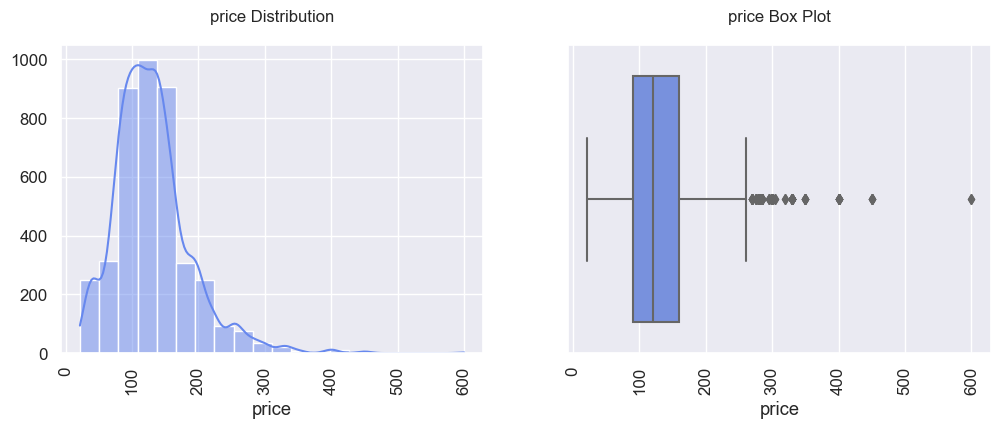

Skewness of price : 1.3934063070306926


In [41]:
#Visualize target distribution
col = 'price'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_palette('coolwarm')
sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].tick_params(axis='x', rotation=90)  
axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)
axes[1].tick_params(axis='x', rotation=90)  

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'price' is skewed to the right and presents outliers in the Box plot.

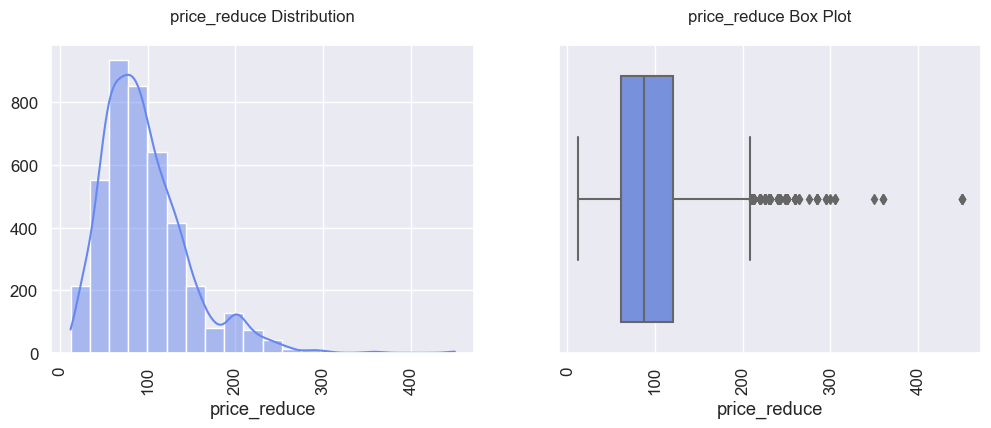

Skewness of price_reduce : 1.4294089405513029


In [42]:
#Visualize target distribution
col = 'price_reduce'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_palette('coolwarm')
sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].tick_params(axis='x', rotation=90)  
axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)
axes[1].tick_params(axis='x', rotation=90)  

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'price_reduce' is skewed to the right and presents outliers in the Box plot.

#### 1.4.1.2 Star rating feature

In [43]:
def show_percentage(ax, total, fontsize=10):
    ''' Shows the representative percentage in each bar in a countplot.'''
    for p in ax.patches:
        percentage = f"{100 * p.get_height()/total:.1f}%"
        x = p.get_x() + p.get_width() / 2 + 0.04
        y = p.get_height()
        ax.annotate(percentage, (x , y + 20), fontsize=fontsize, ha='center')

In [44]:
# Distribution of target
df['star_rating'].value_counts().to_frame()

star_rating
4.6          497
4.7          497
4.5          437
5.0          400
0.0          390
4.4          341
4.8          329
4.3          216
4.0          149
4.2          144
4.9          126
4.1           69
3.0           53
3.9           36
3.8           36
3.5           32
3.7           28
3.6           15
3.3           14
1.0           14
2.0           11
3.4            8
3.1            7
2.5            4
3.2            3
2.3            3
1.9            2
2.7            1
2.6            1
2.8            1
1.8            1
1.6            1

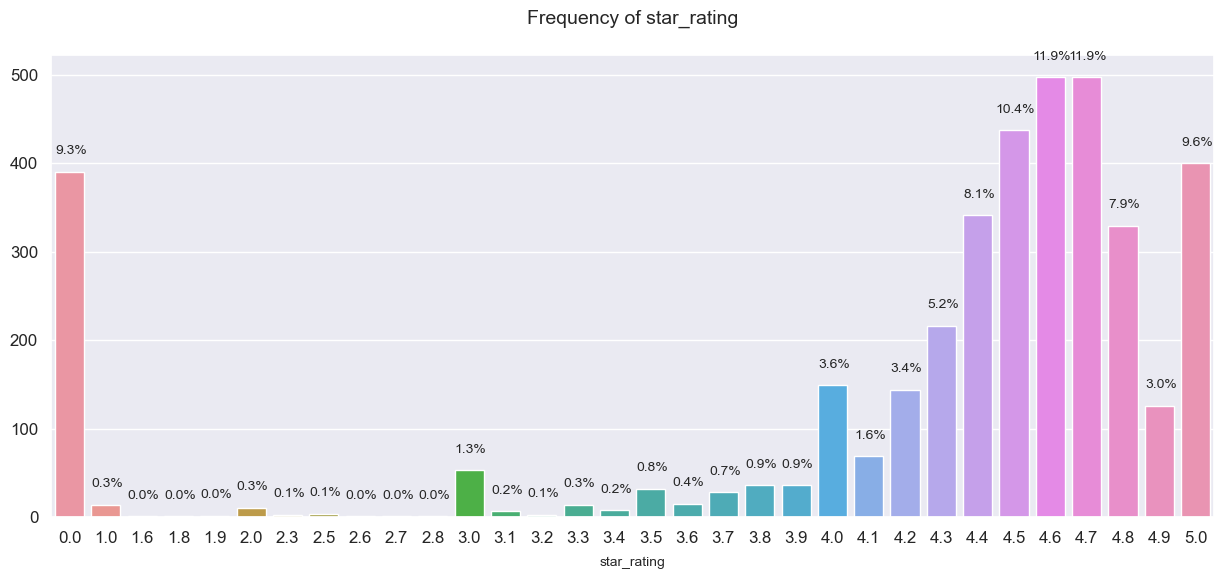

In [45]:
# Set the custom palette
sns.set_palette('vlag')

# Visualize the frequency of star_rating
col = 'star_rating'
plt.figure(figsize=(15, 6))
ax = sns.countplot(x=col, data=df)
show_percentage(ax, len(df)) 

plt.xlabel(col, size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

Out of the total dataset, almost 500 entries (11.9%) fall within star_rating 4.6 and 4.7, followed by 437 entries (10.4%) in star_rating 4.5, 400 entries (9.5%) in star_rating 5.0, and 390 entries (9.3%) in star_rating 0.0.  

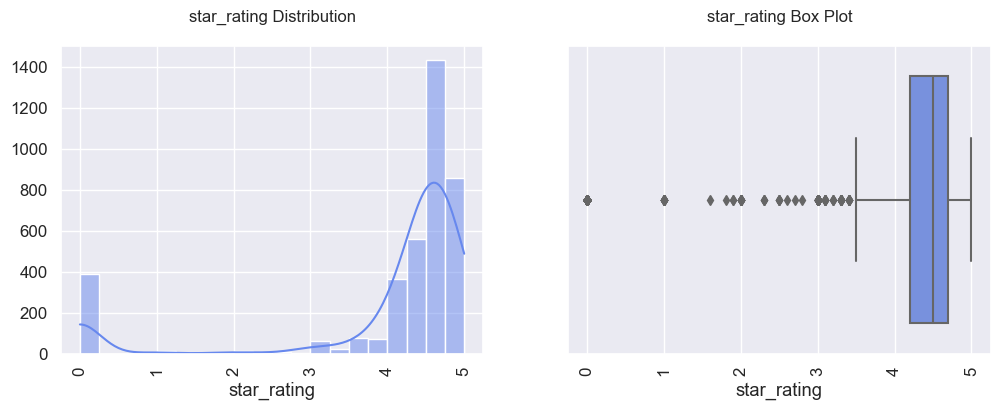

Skewness of star_rating : -2.2537438573929096


In [46]:
#Visualize target distribution
col = 'star_rating'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_palette('coolwarm')
sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].tick_params(axis='x', rotation=90)  
axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)
axes[1].tick_params(axis='x', rotation=90)  

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'star_rating' is skewed to the left and presents outliers in the Box plot.

#### 1.4.1.3 Independent variables 

##### Categorical columns

In [47]:
# List of categorical columns that look like categories
for i,col in enumerate(categorical_col):
    print(f"{i+1}. {col}:   {df[col].nunique()} unique values")

1. ShoeName:   2225 unique values
2. Category:   70 unique values
3. product_code:   3577 unique values
4. color_1:   1 unique values
5. color_2:   1 unique values
6. color_3:   1 unique values
7. color_4:   1 unique values
8. other_color:   18 unique values


The columns 'ShoeName'**(1)**, 'product_code'**(3)** exhibit high cardinality issues, despite being categorical variables. Consequently, these features will be adjusted in data visualizations. 

#### ShoeName (1)

This column exhibits high cardinality. To address this, we plan to visualize the counts for the top 25 most representative cities and list the counts for the remaining 131 cities. This approach aims to provide a concise representation of the data while highlighting the prevalence of the most frequent cities.

NMD_R1 Shoes                                     58
Avryn Shoes                                      39
Ultraboost Light Running Shoes                   38
Superstar Shoes                                  31
Superstar XLG Shoes                              24
X_PLRBOOST Shoes                                 24
Ultraboost 1.0 Shoes                             22
Adilette Comfort Slides                          21
OZWEEGO Shoes                                    20
NMD_V3 Shoes                                     20
Nike Air Force 1 '07                             18
Stan Smith Shoes                                 18
Hyperturf Adventure Shoes                        17
Predator Accuracy.1 Firm Ground Soccer Cleats    16
Adizero SL Running Shoes                         15
4DFWD 2 Running Shoes                            13
Pureboost 22 Running Shoes                       12
Five Ten Freerider Pro Mountain Bike Shoes       12
NMD_S1 Shoes                                     12
Nike Phantom

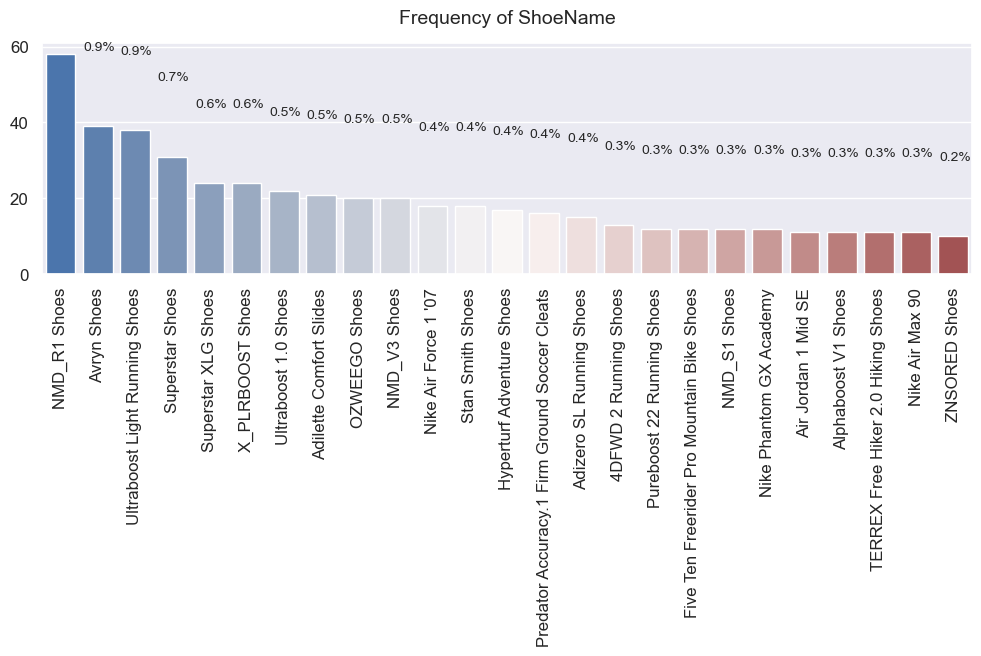

In [48]:
# Visualize the frequency of ShoeName(1)
col = 'ShoeName'
plt.figure(figsize=(12, 3))
df_counts = df[col].value_counts()
display(df_counts[:25])
ax = sns.barplot(x=df_counts[:25].index, y=df_counts[:25].values, palette='vlag')
show_percentage(ax, len(df)) 

plt.xticks(rotation=90)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

In [49]:
# List the rest of the Shoe Names.
display(df_counts[25:])

Barricade Tennis Shoes                          10
Ultra 4D Running Shoes                          10
Adilette Shower Slides                          10
Racer TR23 Shoes                                10
The Velosamba Made with Nature Cycling Shoes    10
                                                ..
Nike Offcourt (NFL Las Vegas Raiders)            1
Nike Offcourt (NFL Detroit Lions)                1
Nike Offcourt (NFL Los Angeles Rams)             1
Nike Offcourt (NFL Seattle Seahawks)             1
Black Slip-on Shoes for men                      1
Name: ShoeName, Length: 2200, dtype: int64

The dataset comprises observations for 2225 names.

#### Category (2)
This feature exhibits a high cardinality too. Therefore, we will generalize into two principal categories: Men and Women.

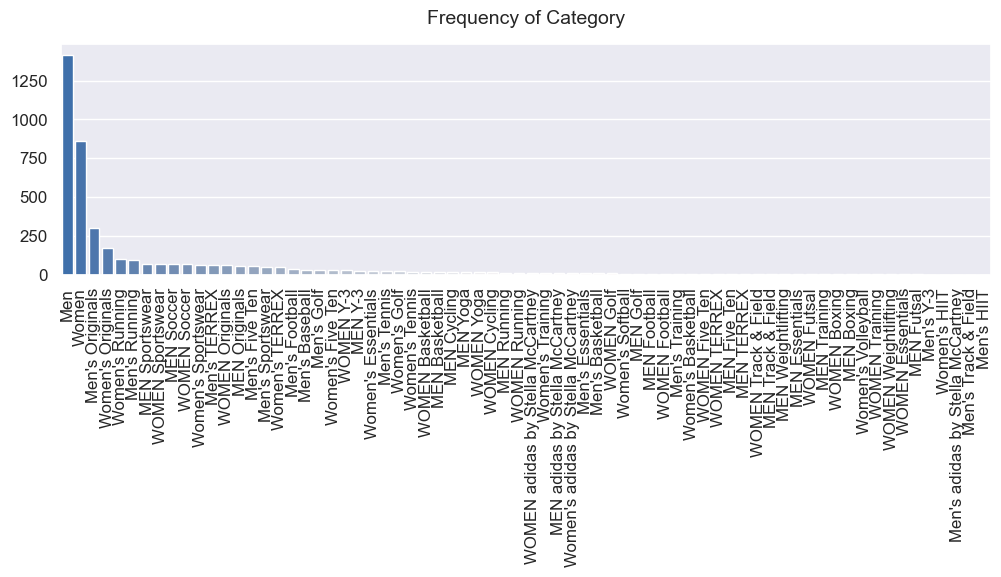

In [50]:
# Visualize the frequency of Category(2)
col = 'Category'
plt.figure(figsize=(12, 3))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')

plt.xticks(rotation=90)
plt.xlabel('', size=6, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

Observationally, the presence of Men's categories seems to outweigh that of Women's categories. To facilitate a more streamlined analysis, we intend to preprocess the 'Category' column, consolidating it into a broader classification with two distinct values: Men and Women.

In [51]:
# Regular Expression 'Men' or 'Women'
pattern = re.compile(r'Men|Women', flags=re.IGNORECASE)

def get_general_category(category):
    match = re.search(pattern, category)
    if match:
        return match.group(0).upper()
    else:
        return 'Other'

df['Category_gral'] = df['Category'].apply(get_general_category)    
df.sample(5)

ShoeName         Category  \
166                                       Nike Offcourt            Women   
2609                                      OZMORPH Shoes  Men's Originals   
887                                     Nike Air Max 97              Men   
919                          Nike Court Vintage Premium              Men   
4181  Slipstream Hi Leather SneakersPuma White-Puma ...              Men   

      no_colors  price_reduce  price product_code  count_of_sizes color_1  \
166         1.0         34.97   40.0   BQ4632-002               1   Black   
2609        5.0         98.00  140.0       IE2025              14   Black   
887         2.0        109.97  185.0   DX3946-100               3     NaN   
919         2.0         68.97   80.0   CT1726-100              15   Black   
4181        1.0         59.99  100.0    388640_02              12     NaN   

     color_2 color_3 color_4 other_color  n_reviews     size  comfort  \
166      NaN     NaN     NaN        grey      442.0  41.0000  97.0000   
2609    Blue   White     Red        grey       88.0  50.2841  73.0114   
887      NaN   White     NaN        grey        2.0      NaN      NaN   
919      NaN   White     NaN       brown      127.0  42.0000  84.0000   
4181     NaN   White     NaN         NaN        6.0      NaN      NaN   

      quality  star_rating Category_gral  
166   46.4500          4.7         WOMEN  
2609  80.9659          4.3           MEN  
887       NaN          5.0           MEN  
919   43.0500          4.5           MEN  
4181  80.0000          3.8           MEN

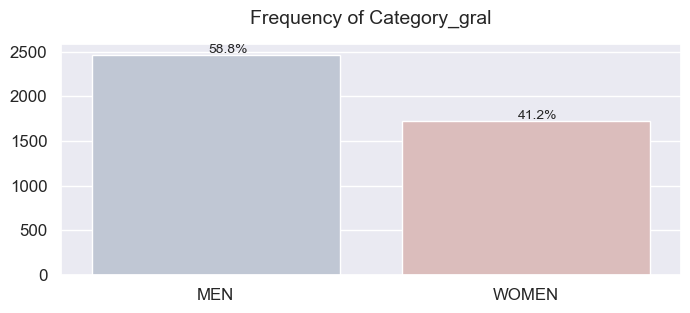

In [52]:
# Visualize the frequency of Category_-gral
col = 'Category_gral'
plt.figure(figsize=(8, 3))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')
show_percentage(ax, len(df)) 

plt.xticks(rotation=0)
plt.xlabel('', size=6, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

Of the total shoes in the dataset, 58.8% belong to the Men's category, while the remaining 41.2% fall under the Women's category.

#### product_code (3)
This column presents challenges associated with high cardinality, even though it is a categorical variable. Therefore, we will abstain from conducting data visualizations on it.

#### Color 1 - Black (4)

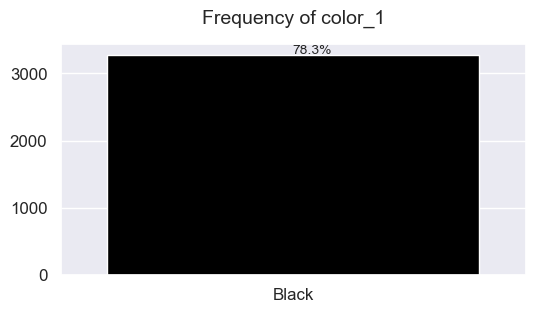

In [53]:
# Visualize the frequency of Has Table Color_1(4)
col = 'color_1'
plt.figure(figsize=(6, 3))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, color='black')
show_percentage(ax, len(df)) 

plt.xticks(rotation=0)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

The color black is available for 78.3% of the shoes, while the remaining models do not offer this color option.

1. ShoeName:   2225 unique values
2. Category:   70 unique values
3. product_code:   3577 unique values
4. color_1:   1 unique values
5. color_2:   1 unique values
6. color_3:   1 unique values
7. color_4:   1 unique values
8. other_color:   18 unique values

#### Color_2 - Blue (5)

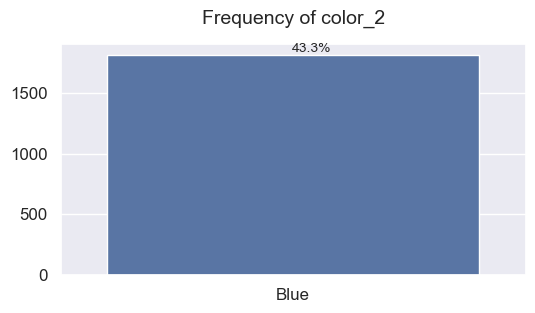

In [54]:
# Visualize the frequency of Has Table Color_2(5)
col = 'color_2'
plt.figure(figsize=(6, 3))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, color='b')
show_percentage(ax, len(df)) 

plt.xticks(rotation=0)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

The color blue is available for 43.3% of the shoes, while the remaining models do not offer this color option.

#### Color 3 - White (6)

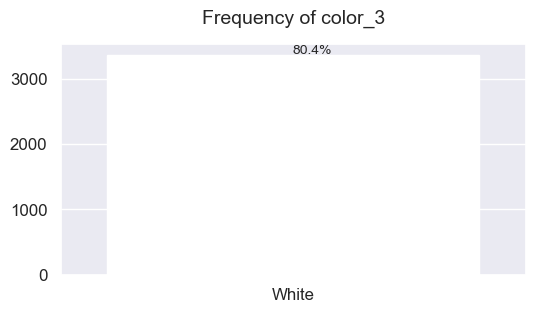

In [55]:
# Visualize the frequency of Has Table Color_3(6)
col = 'color_3'
plt.figure(figsize=(6, 3))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, color='white')
show_percentage(ax, len(df)) 

plt.xticks(rotation=0)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

The color white is available for 80.4% of the shoes, while the remaining models do not offer this color option.

#### Color_4 - Red (7)

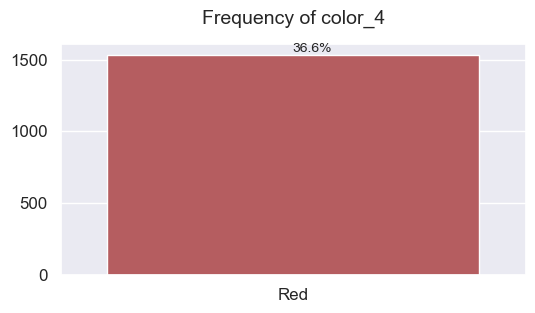

In [56]:
# Visualize the frequency of Has Table Color_4(7)
col = 'color_4'
plt.figure(figsize=(6, 3))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, color='r')
show_percentage(ax, len(df)) 

plt.xticks(rotation=0)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

The color red is available for 36.6% of the shoes, while the remaining models do not offer this color option.

#### other_color (8)

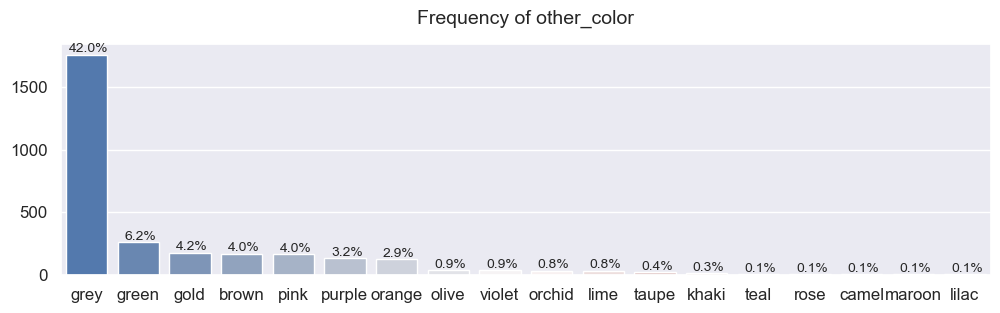

In [57]:
# Visualize the frequency of Has Online other_color(8)
col = 'other_color'
plt.figure(figsize=(12, 3))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')
show_percentage(ax, len(df)) 

plt.xticks(rotation=0)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

The prevailing color in the 'other_color' column is grey, constituting 42.0%. Following closely are green at 6.2%, gold at 4.2%, brown at 4.0%, pink at 4.0%, and so forth.

#### Numerical columns

In [58]:
# List of numerical columns in the dataset
for i,col in enumerate(numerical_col):
    print(f"{i+1}. {col}")

1. no_colors
2. count_of_sizes
3. n_reviews
4. size
5. comfort
6. quality


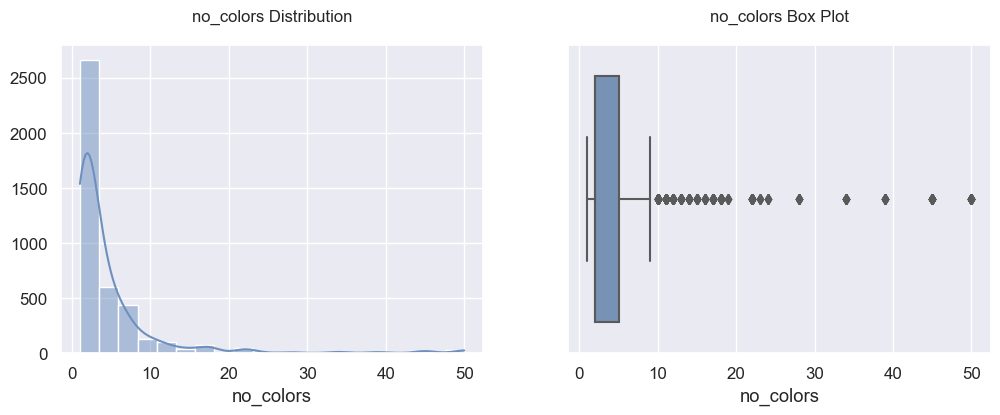

Skewness of no_colors : 4.3501733116472865


In [59]:
#Visualize (1) no_colors
col = 'no_colors'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.color_palette("vlag", as_cmap=True)

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#6e90bf')
sns.boxplot(df[col], ax=axes[1], color='#6e90bf')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of no_colors
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'no_colors' exhibits a rightward skewness. A Box plot indicates the presence of outliers in this variable.  

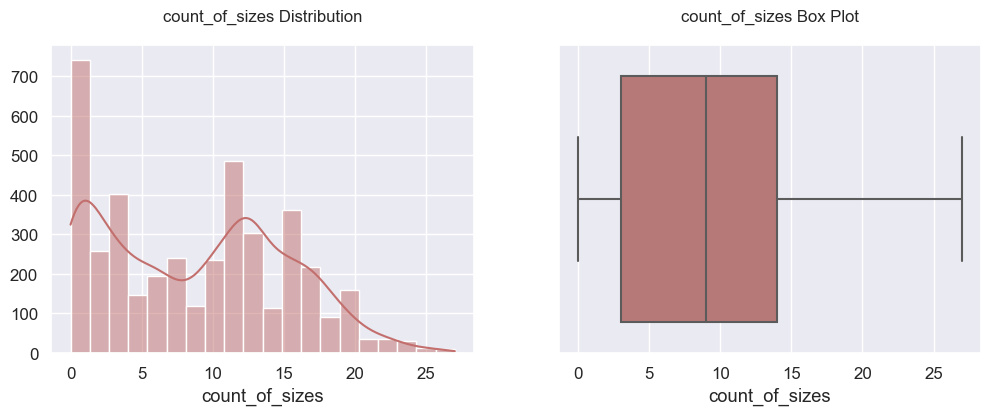

Skewness of count_of_sizes : 0.20177226635619083


In [60]:
#Visualize (2) count_of_sizes
col = 'count_of_sizes'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.color_palette("vlag", as_cmap=True)

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#c26f6d')
sns.boxplot(df[col], ax=axes[1], color='#c26f6d')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of count_of_sizes
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'count_of_sizes' is right-skewed. A box plot does not indicate the presence of outliers in this variable.

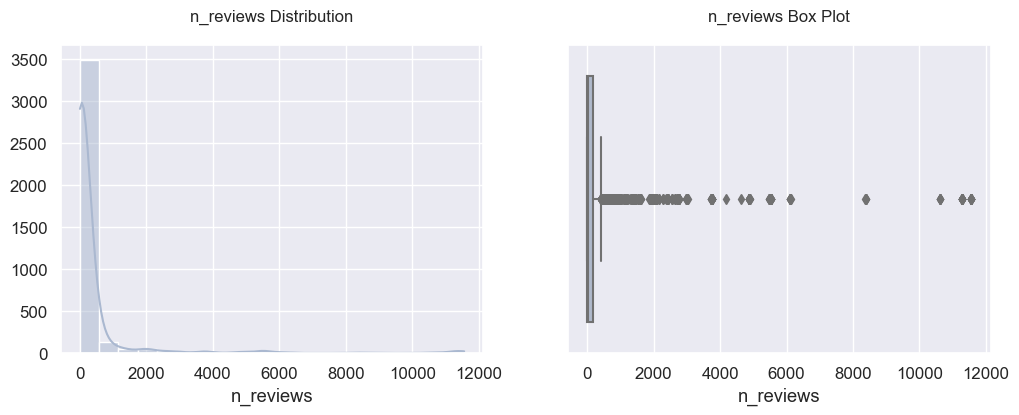

Skewness of n_reviews : 6.4926268543005845


In [61]:
#Visualize (3) n_reviews
col = 'n_reviews'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.color_palette("vlag", as_cmap=True)

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#aab8d0')
sns.boxplot(df[col], ax=axes[1], color='#aab8d0')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of n_reviews
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'n_reviews' is skewed to the right. A Box plot indicates the presence of outliers in this variable.

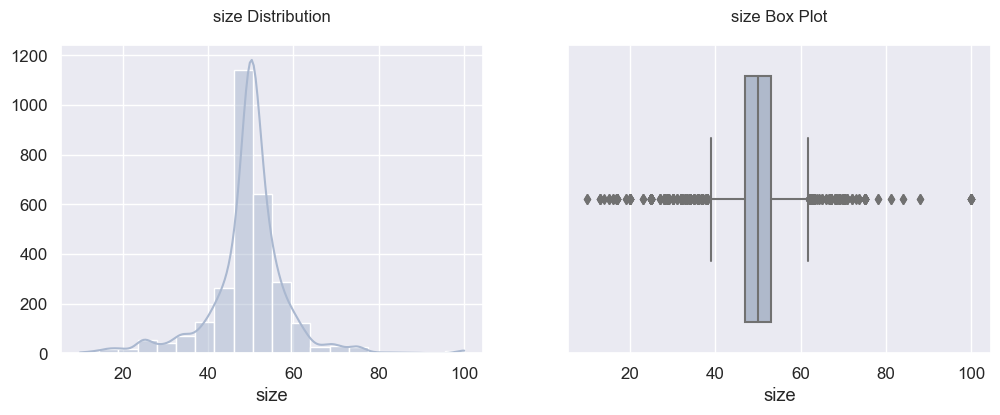

Skewness of size : -0.015037334756479502


In [62]:
#Visualize (4) size
col = 'size'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.color_palette("vlag", as_cmap=True)

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#aab8d0')
sns.boxplot(df[col], ax=axes[1], color='#aab8d0')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of size
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'size' appears to be almost normal. However, a box plot reveals the presence of outliers in this variable.

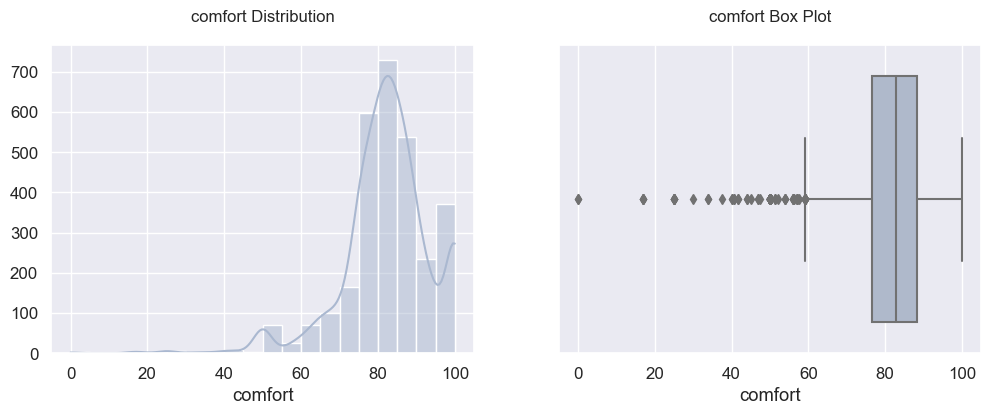

Skewness of comfort : -1.3229543055661768


In [63]:
#Visualize (5) comfort
col = 'comfort'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.color_palette("vlag", as_cmap=True)

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#aab8d0')
sns.boxplot(df[col], ax=axes[1], color='#aab8d0')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of comfort
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'comfort' is skewed to the left. A Box plot indicates the presence of outliers in this variable.

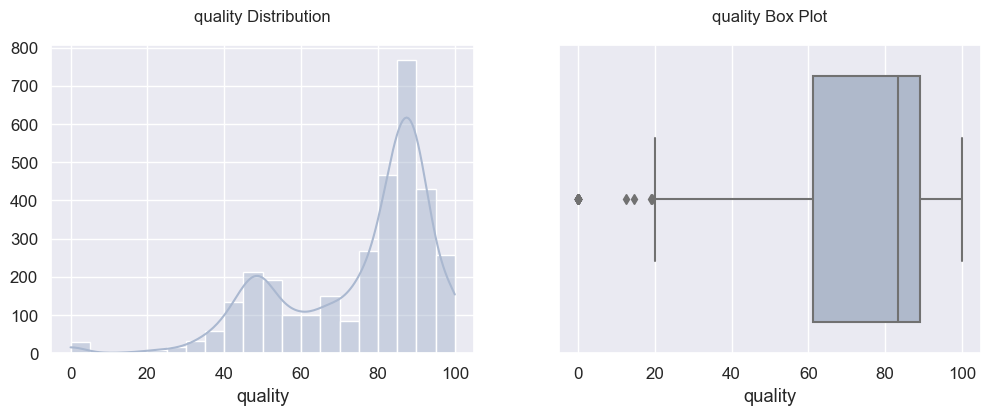

Skewness of quality : nan


In [64]:
#Visualize (6) quality
col = 'quality'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.color_palette("vlag", as_cmap=True)

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#aab8d0')
sns.boxplot(df[col], ax=axes[1], color='#aab8d0')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of quality
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'quality' is skewed to the left. A Box plot indicates the presence of few outliers in this variable.

#### 1.4.1.4 Univariate Boxplot

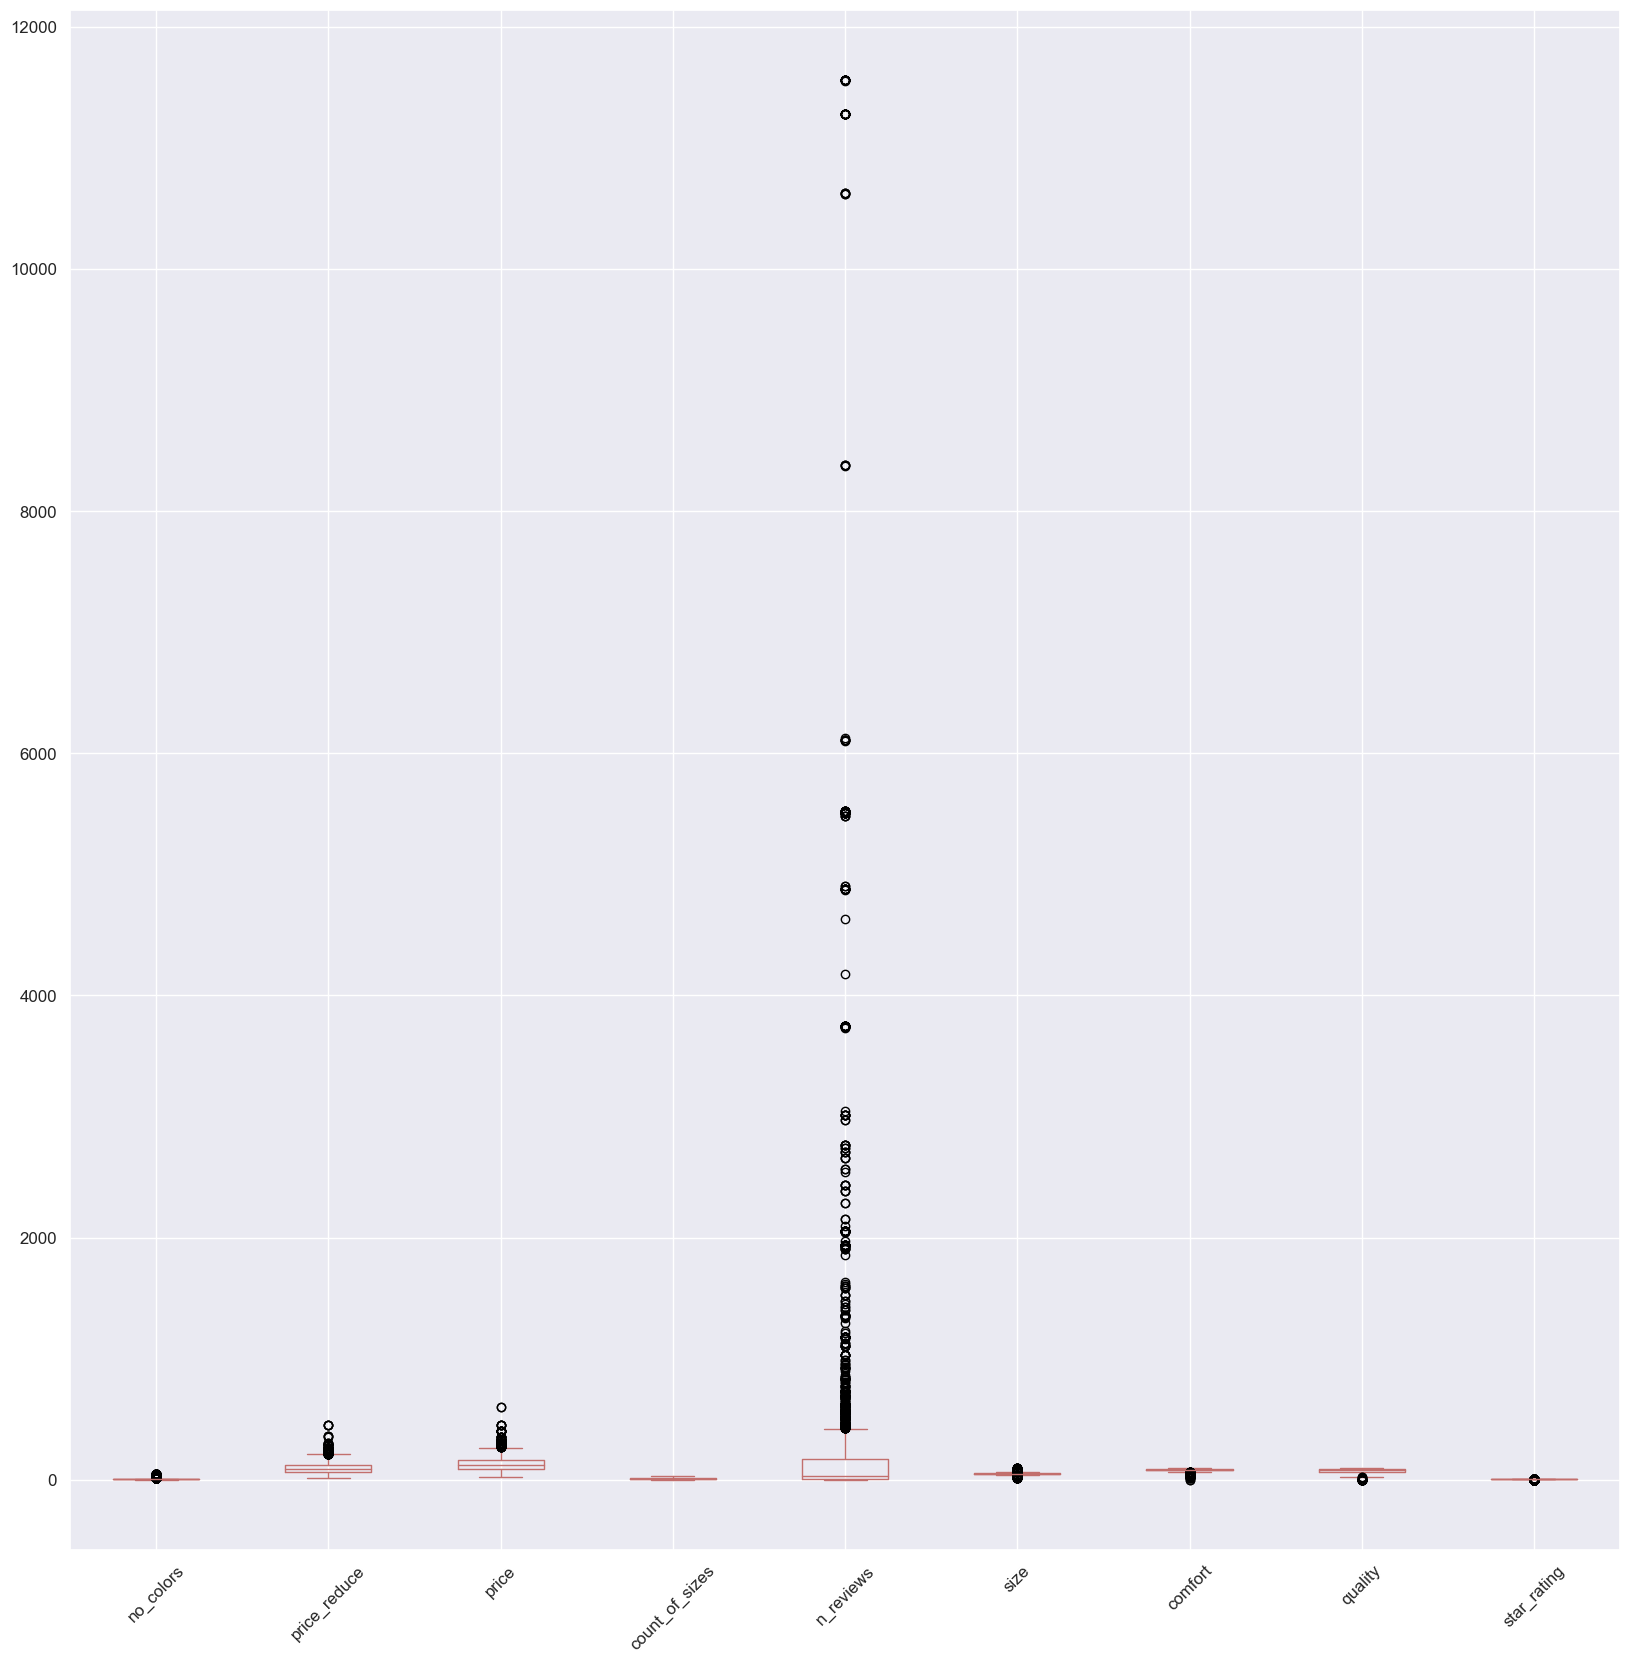

In [65]:
# Draw a boxplot for each independent variable 
df.boxplot(figsize=(20,20), color='#c26f6d')
plt.xticks(rotation=45)
plt.show()

The data is in different scales therefore it will be scaled later in the analysis. Next, we will draw the boxplot without 'n_reviews' columns to appreciate better the distribution.

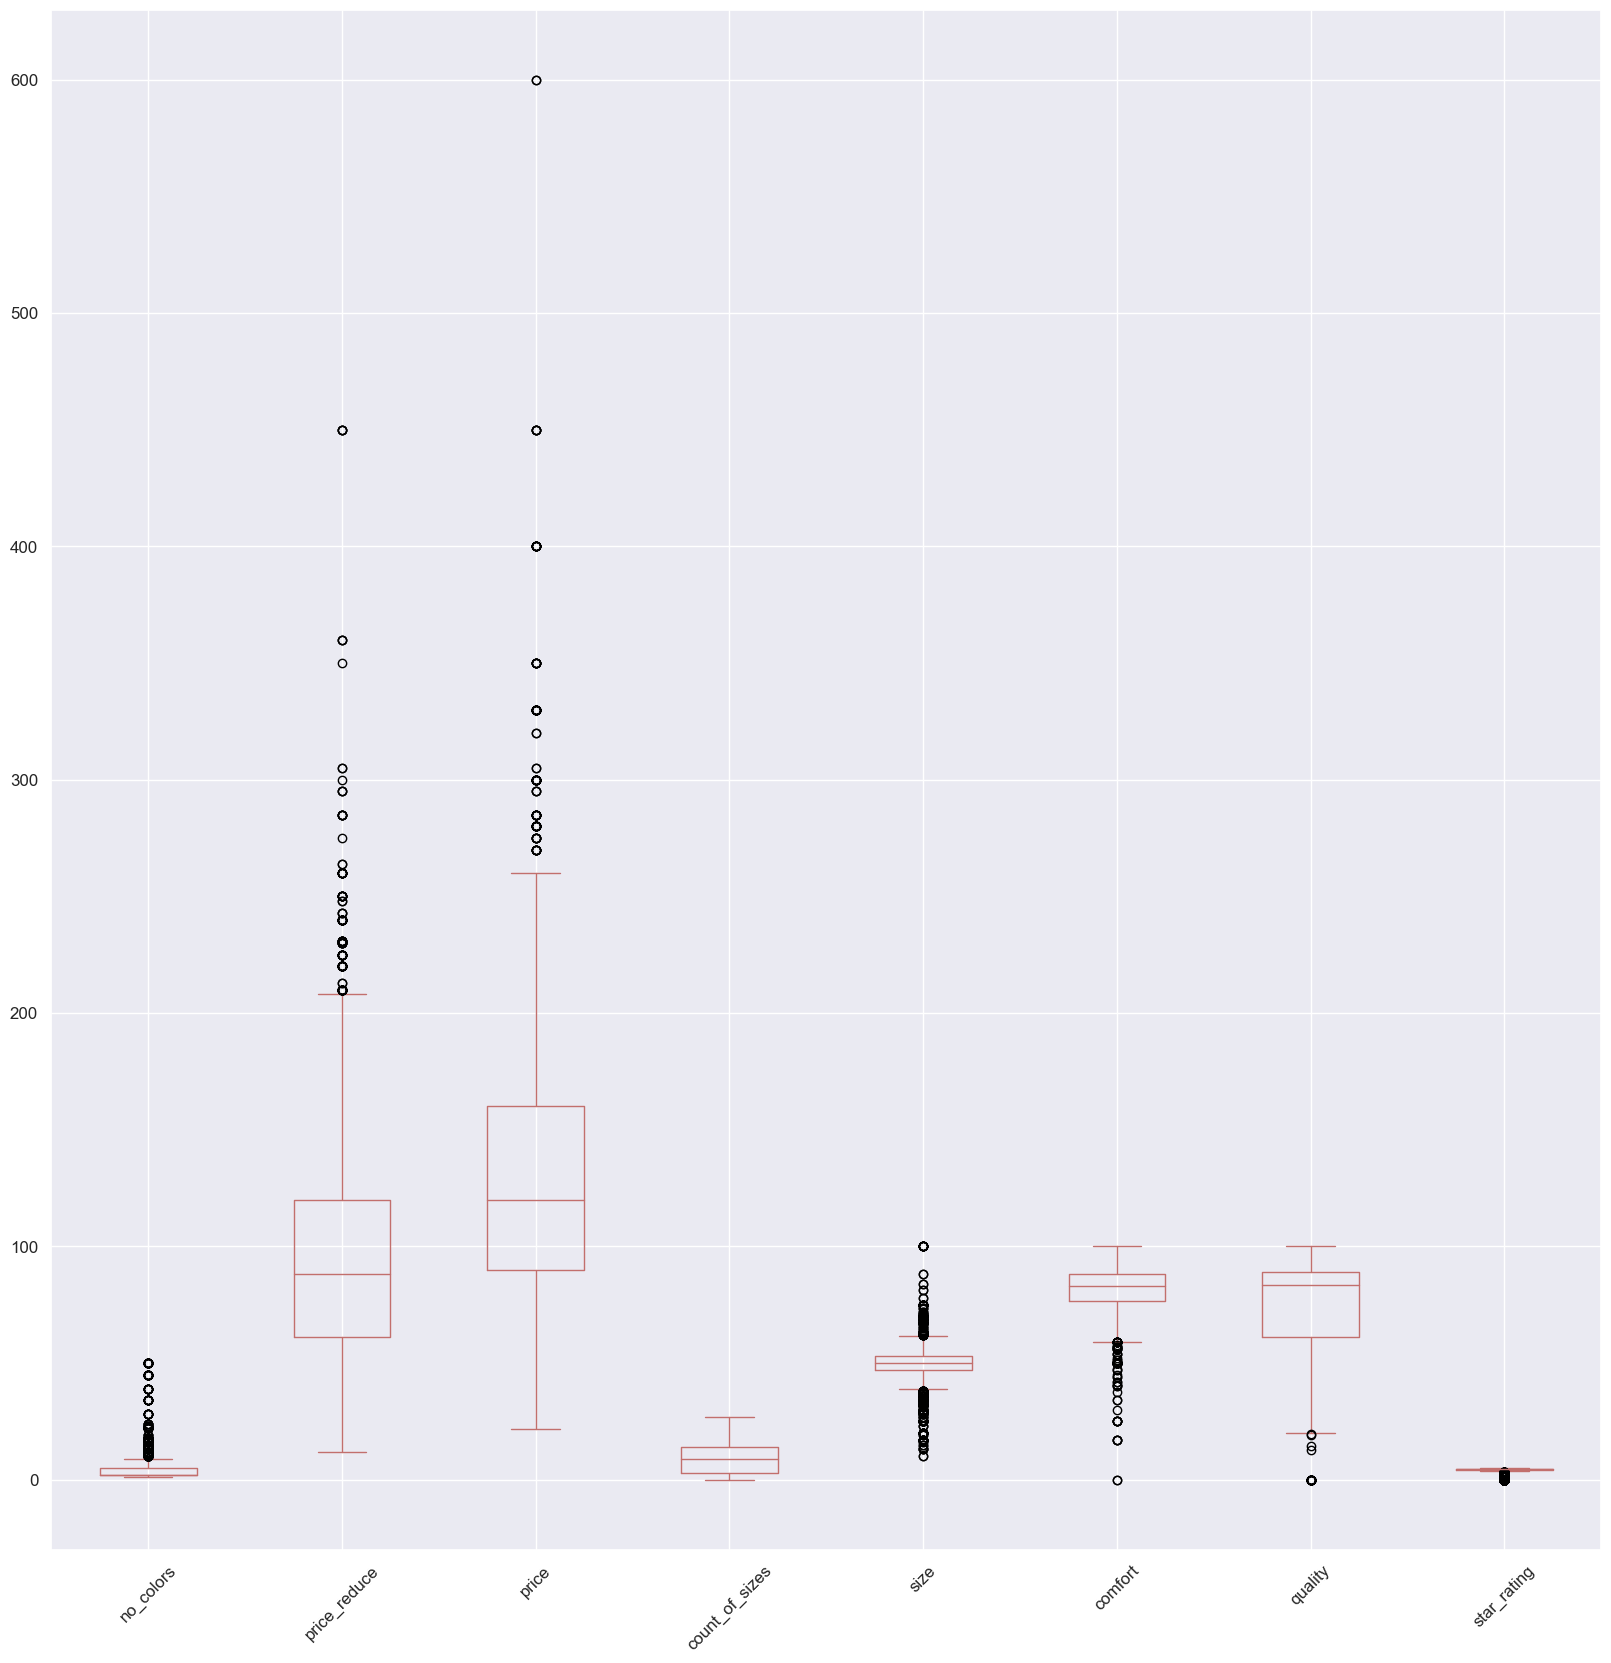

In [66]:
# Draw a boxplot for each independent variable 
df.drop('n_reviews', axis=1).boxplot(figsize=(20,20), color='#c26f6d')
plt.xticks(rotation=45)
plt.show()

### 1.4.2  Bivariate Analysis

#### 1.4.2.1 BoxPlot Analysis:  Finding outliers and comparing  

##### Plotting functions

In [67]:
def boxplot_by_category(col, category_col, xlabel, cat_label, figsize, palette, xscale=''):
    plt.figure(figsize=figsize)
    sns.set_palette(palette)
    sns.boxplot(data=df, x=col, y=category_col)
    plt.ylabel(cat_label)
    plt.xlabel(xlabel)
    if xscale != '':
        plt.xscale(xscale)
    plt.title(f"BoxPlot of {col} vs. {cat_label}")
    plt.show()

#### 1.4.2.1.1 Category
#### Price distribution according to Category

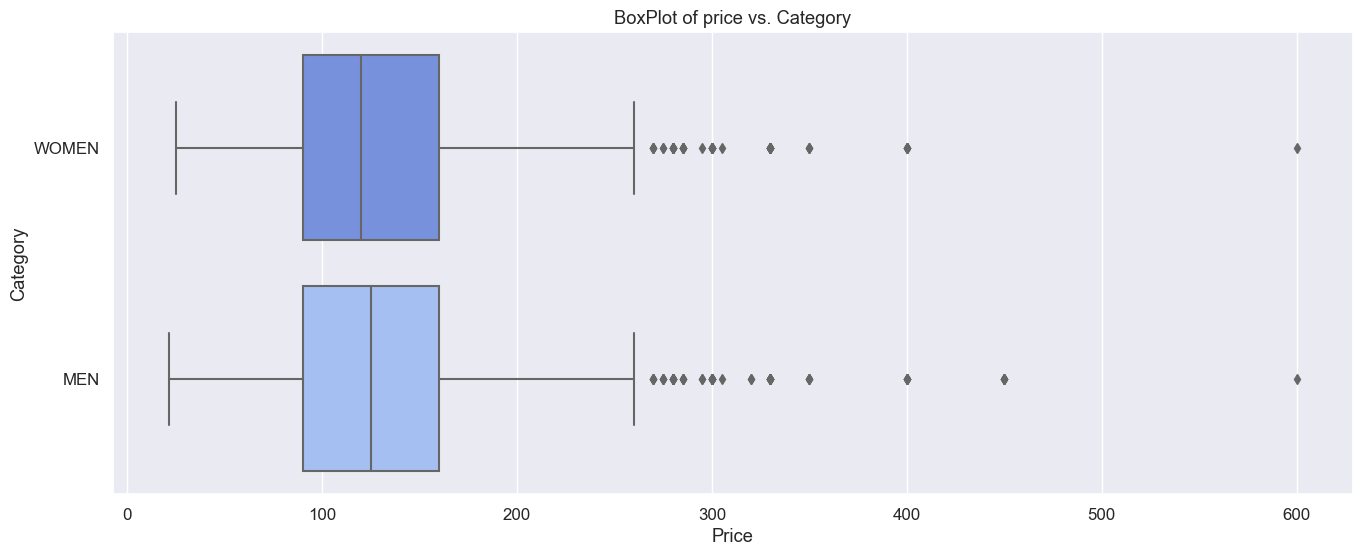

In [68]:
# Visualizing and comparing each independent variable with target
# Columns price 
col = 'price'
category_col= 'Category_gral'

boxplot_by_category(col, category_col,  xlabel='Price', cat_label='Category', figsize=(16,6), palette='coolwarm', xscale='')

#### Price_reduce distribution according to Category

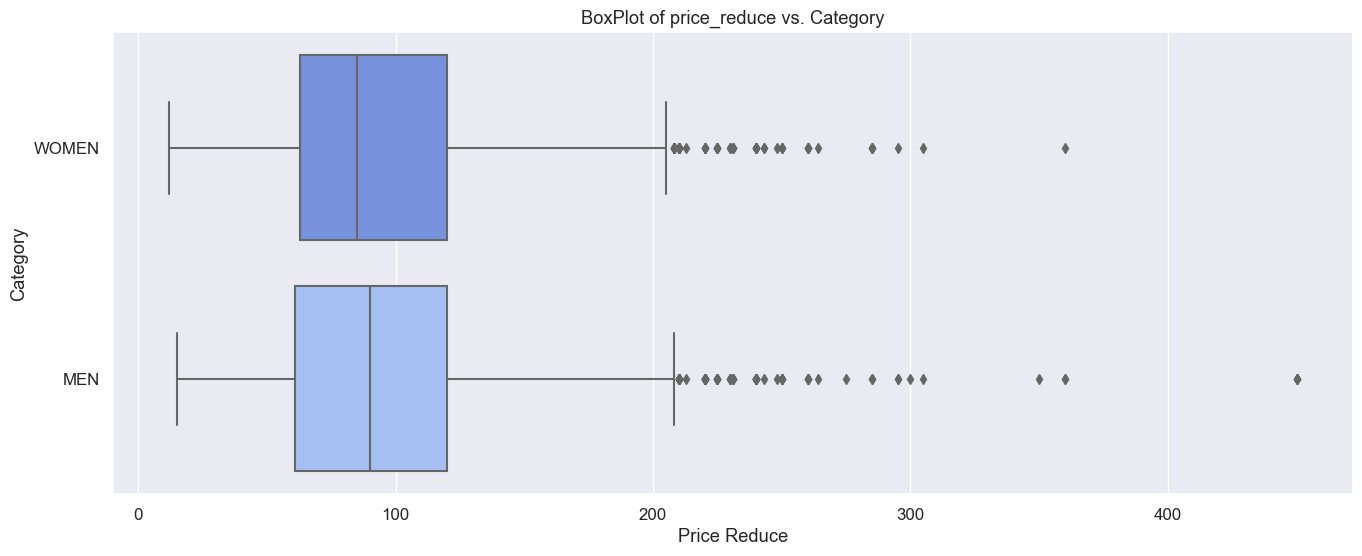

In [69]:
# Visualizing and comparing each independent variable with target
# Columns price 
col = 'price_reduce'
category_col= 'Category_gral'

boxplot_by_category(col, category_col,  xlabel='Price Reduce', cat_label='Category', figsize=(16,6), palette='coolwarm', xscale='')

#### Star Rating distribution according to Category

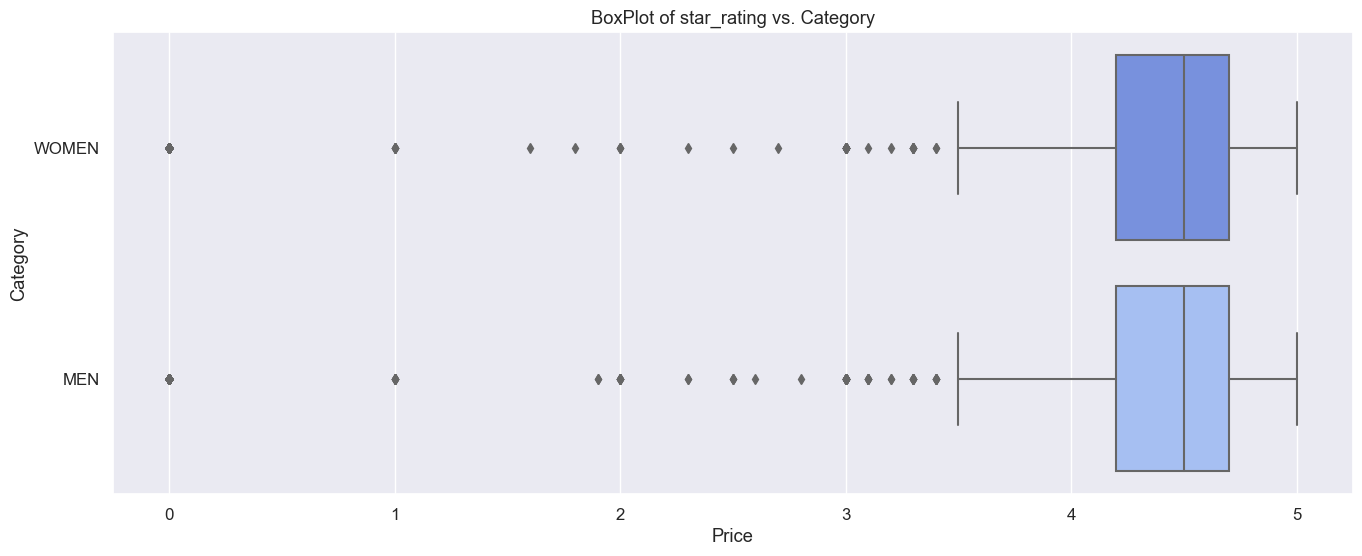

In [70]:
# Visualizing and comparing each independent variable with target
# Columns star_rating
col = 'star_rating'
category_col= 'Category_gral'

boxplot_by_category(col, category_col,  xlabel='Price', cat_label='Category', figsize=(16,6), palette='coolwarm', xscale='')

#### Create binary columns from of 'color_1', 'color_2', 'color_3', 'color_4' 

In [71]:
df['color_1_'] = df['color_1'].apply(lambda x: 'Black' if pd.notna(x) and x=='Black' else f'Not Black')
df['color_2_'] = df['color_2'].apply(lambda x: 'Blue' if pd.notna(x) and x=='Blue' else f'Not Blue')
df['color_3_'] = df['color_3'].apply(lambda x: 'White' if pd.notna(x) and x=='White' else f'Not White')
df['color_4_'] = df['color_4'].apply(lambda x: 'Red' if pd.notna(x) and x=='Red' else f'Not Red')

df.tail(5)

ShoeName Category  no_colors  price_reduce  price  \
4417     Brown Sports Shoe for men      Men        1.0         57.56  95.94   
4418   PARIS KHAKI sneaker for men      Men        3.0         35.96  59.94   
4419  Dubai Khaki sneakers for men      Men        4.0         44.34  44.34   
4420         Navy sneakers for men      Men        2.0         23.72  39.54   
4421   Black Slip-on Shoes for men      Men        2.0         16.15  21.54   

       product_code  count_of_sizes color_1 color_2 color_3  ... n_reviews  \
4417  FGC0DY0S0082A               1     NaN     NaN     NaN  ...       NaN   
4418  FGC0L4033131A               0     NaN    Blue     NaN  ...       NaN   
4419  FGC0L4037301A               1   Black     NaN     NaN  ...       NaN   
4420  FGC0Y9032792A               0   Black    Blue     NaN  ...       NaN   
4421  FGC0Z7041652A               0   Black     NaN     NaN  ...       NaN   

     size  comfort  quality  star_rating  Category_gral   color_1_  color_2_  \
4417  NaN      NaN      NaN          NaN            MEN  Not Black  Not Blue   
4418  NaN      NaN      NaN          NaN            MEN  Not Black      Blue   
4419  NaN      NaN      NaN          NaN            MEN      Black  Not Blue   
4420  NaN      NaN      NaN          NaN            MEN      Black      Blue   
4421  NaN      NaN      NaN          NaN            MEN      Black  Not Blue   

       color_3_ color_4_  
4417  Not White  Not Red  
4418  Not White  Not Red  
4419  Not White  Not Red  
4420  Not White  Not Red  
4421  Not White  Not Red  

[5 rows x 22 columns]

#### 1.4.2.1.2 Color: Black

#### Price distribution according to Color: Black

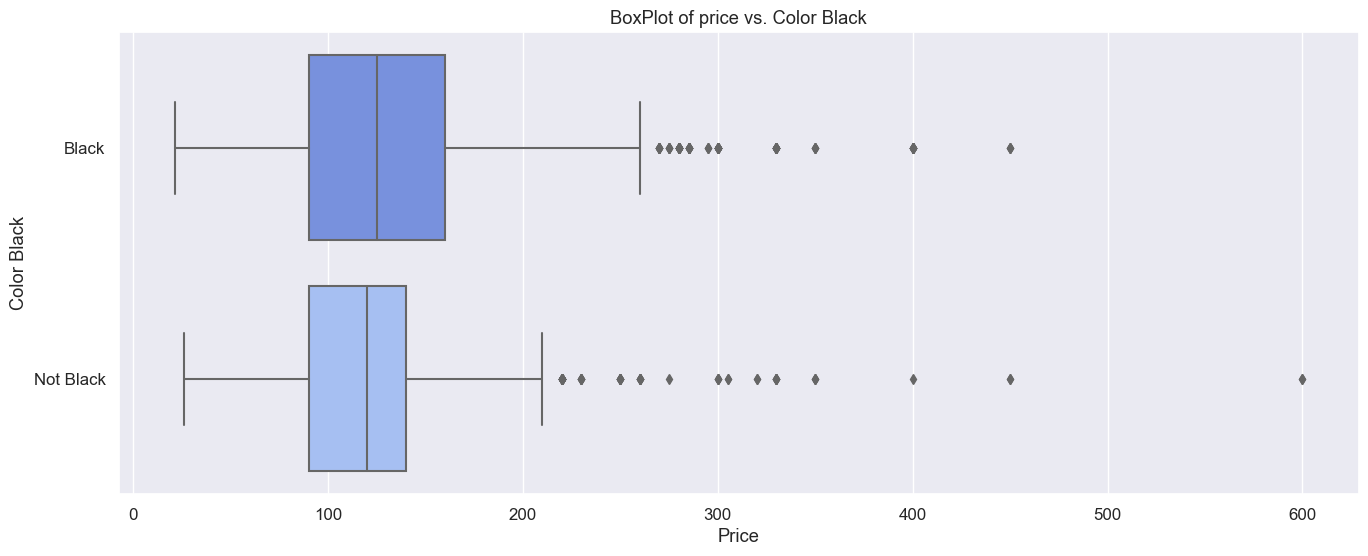

In [72]:
# Visualizing and comparing each independent variable with target
# Columns price 
col = 'price'
category_col= 'color_1_'

boxplot_by_category(col, category_col,  xlabel='Price', cat_label='Color Black', figsize=(16,6), palette='coolwarm', xscale='')

#### Price_reduce distribution according to Color: Back

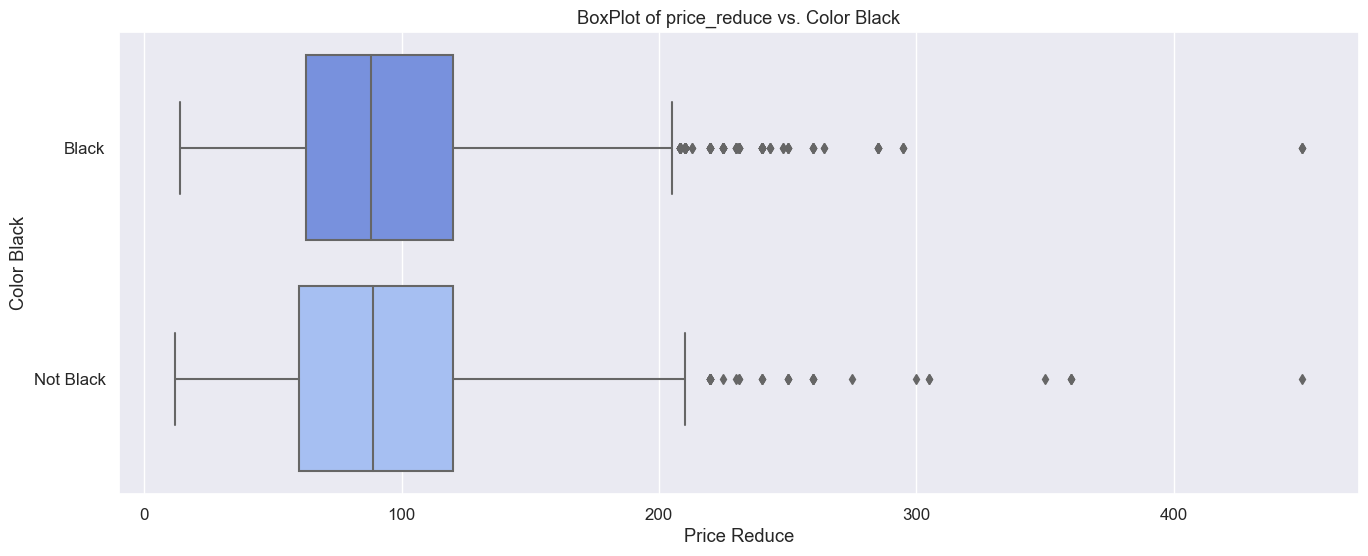

In [73]:
# Visualizing and comparing each independent variable with target
# Columns price 
col = 'price_reduce'
category_col= 'color_1_'

boxplot_by_category(col, category_col,  xlabel='Price Reduce', cat_label='Color Black', figsize=(16,6), palette='coolwarm', xscale='')

#### Star Rating distribution according to Color: Black

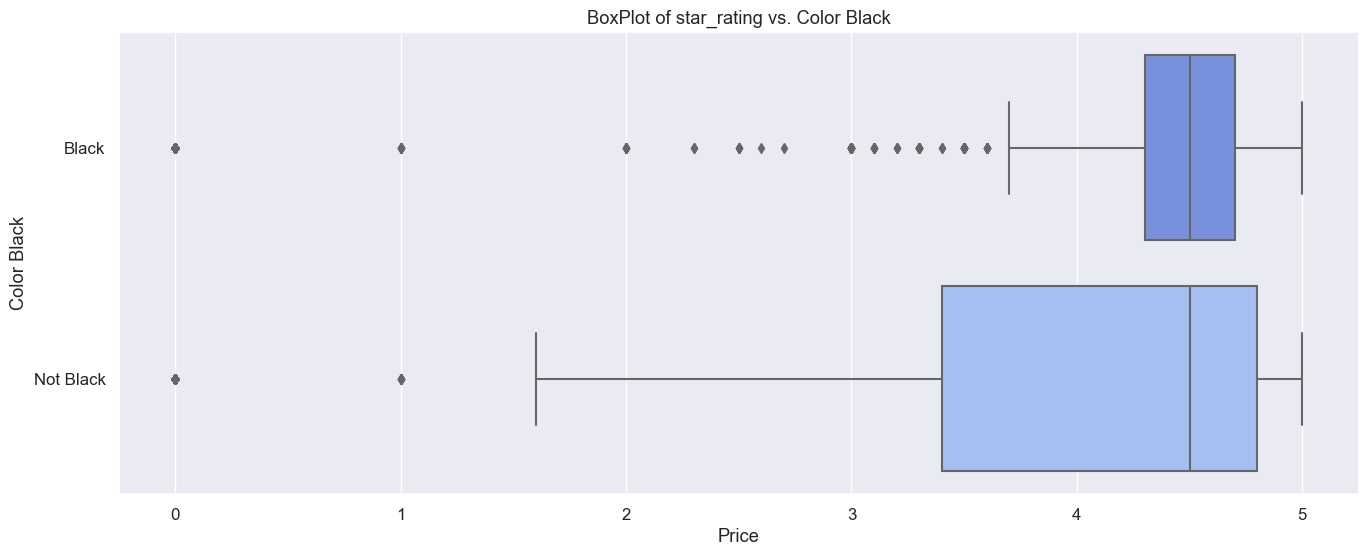

In [74]:
# Visualizing and comparing each independent variable with target
# Columns star_rating
col = 'star_rating'
category_col= 'color_1_'

boxplot_by_category(col, category_col,  xlabel='Price', cat_label='Color Black', figsize=(16,6), palette='coolwarm', xscale='')

#### 1.4.2.1.3 Color: Blue

#### Price distribution according to Color: Blue

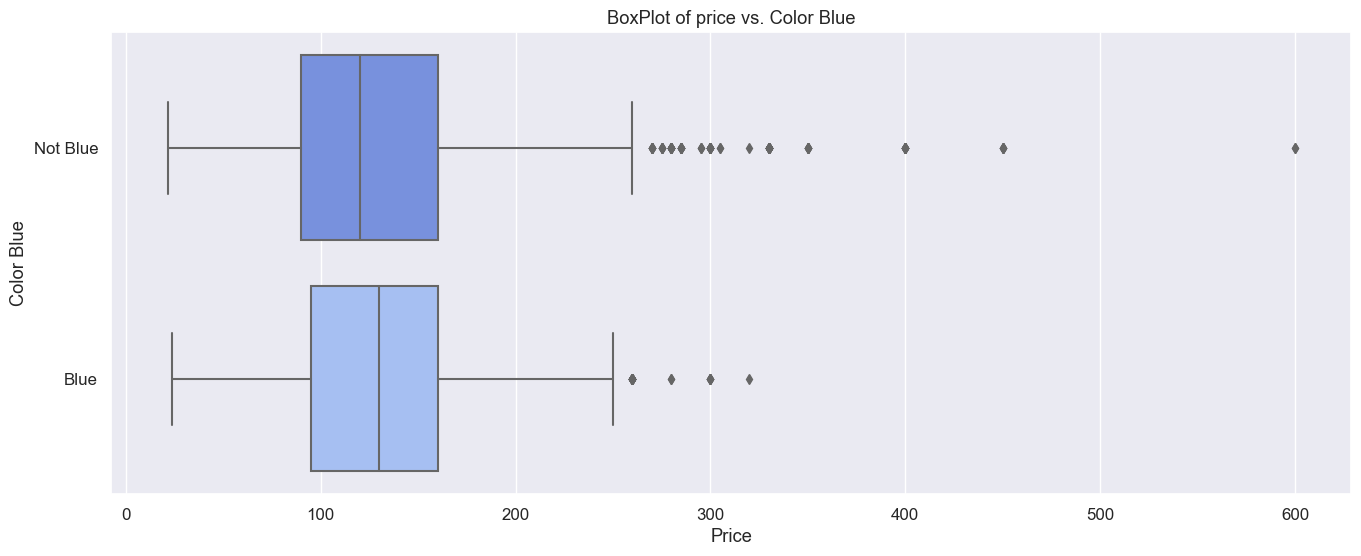

In [75]:
# Visualizing and comparing each independent variable with target
# Columns price 
col = 'price'
category_col= 'color_2_'

boxplot_by_category(col, category_col,  xlabel='Price', cat_label='Color Blue', figsize=(16,6), palette='coolwarm', xscale='')

#### Price_reduce distribution according to Color: Blue

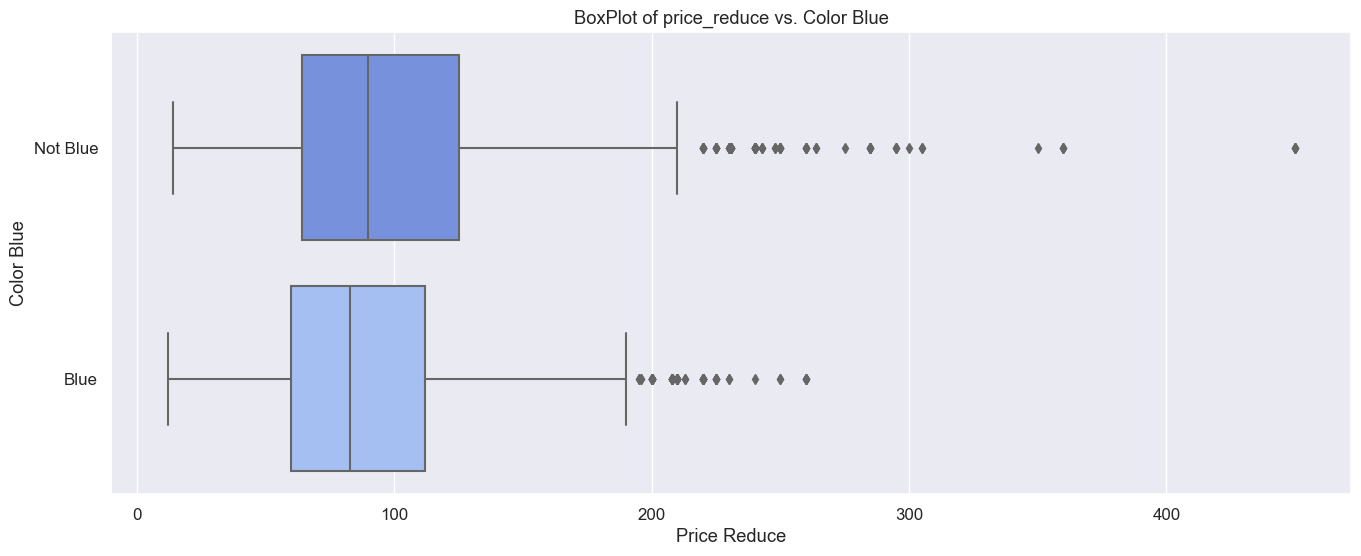

In [76]:
# Visualizing and comparing each independent variable with target
# Columns price 
col = 'price_reduce'
category_col= 'color_2_'

boxplot_by_category(col, category_col,  xlabel='Price Reduce', cat_label='Color Blue', figsize=(16,6), palette='coolwarm', xscale='')

#### Star Rating distribution according to Color: Blue

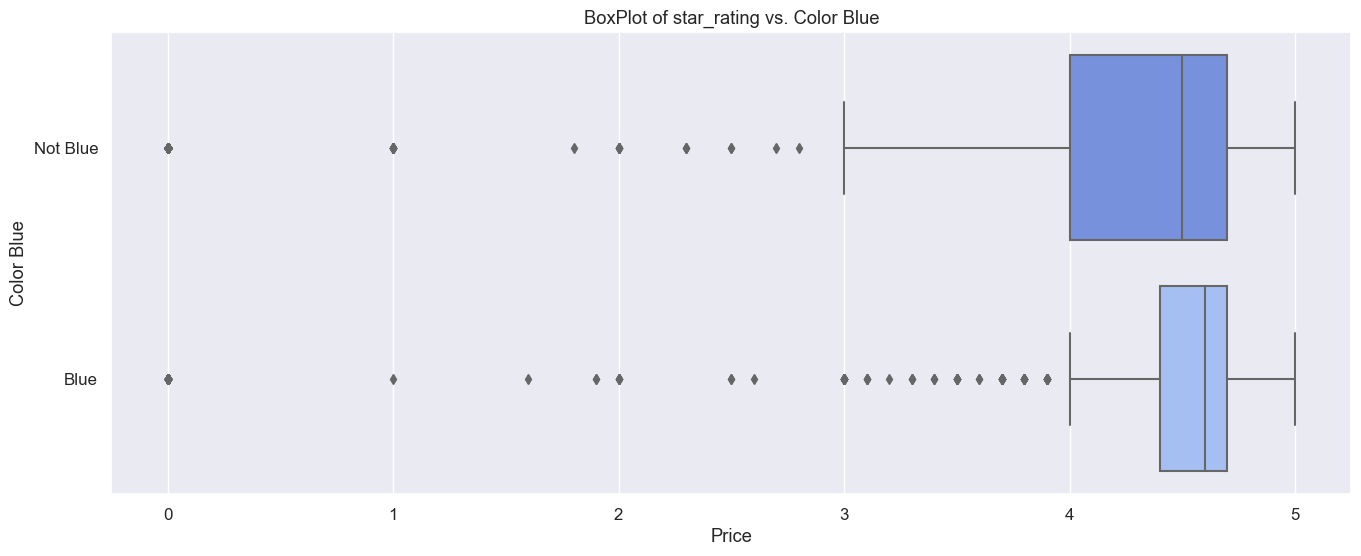

In [77]:
# Visualizing and comparing each independent variable with target
# Columns star_rating
col = 'star_rating'
category_col= 'color_2_'

boxplot_by_category(col, category_col,  xlabel='Price', cat_label='Color Blue', figsize=(16,6), palette='coolwarm', xscale='')

#### 1.4.2.1.4 Color. White

#### Price distribution according to Color: White

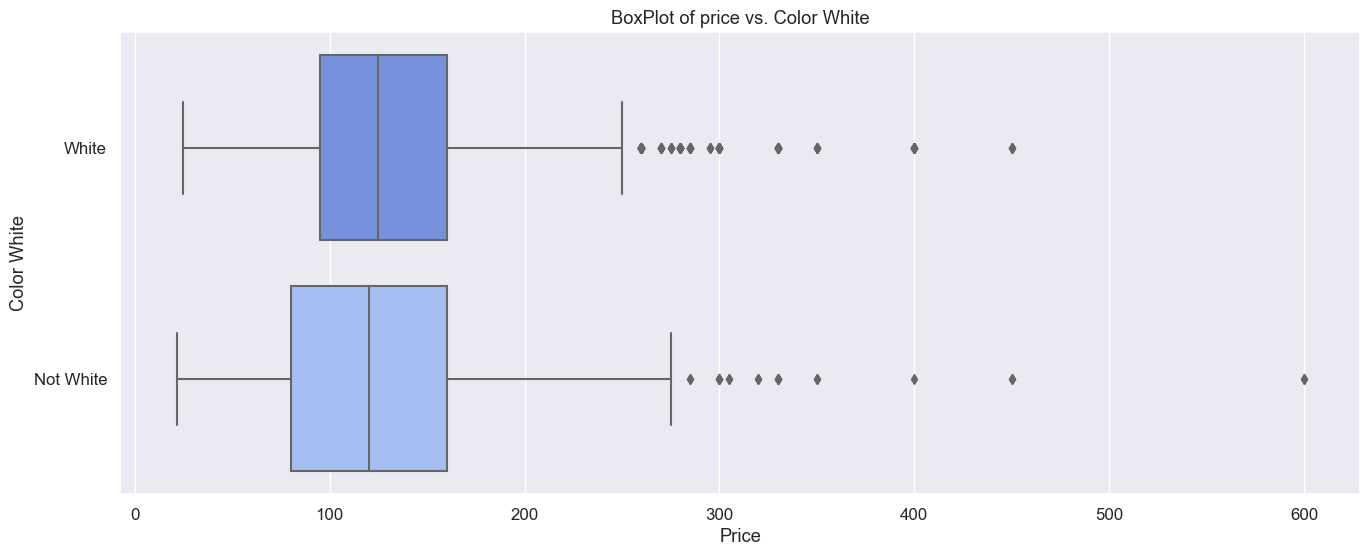

In [78]:
# Visualizing and comparing each independent variable with target
# Columns price 
col = 'price'
category_col= 'color_3_'

boxplot_by_category(col, category_col,  xlabel='Price', cat_label='Color White', figsize=(16,6), palette='coolwarm', xscale='')

#### Price_reduce distribution according to Color: White

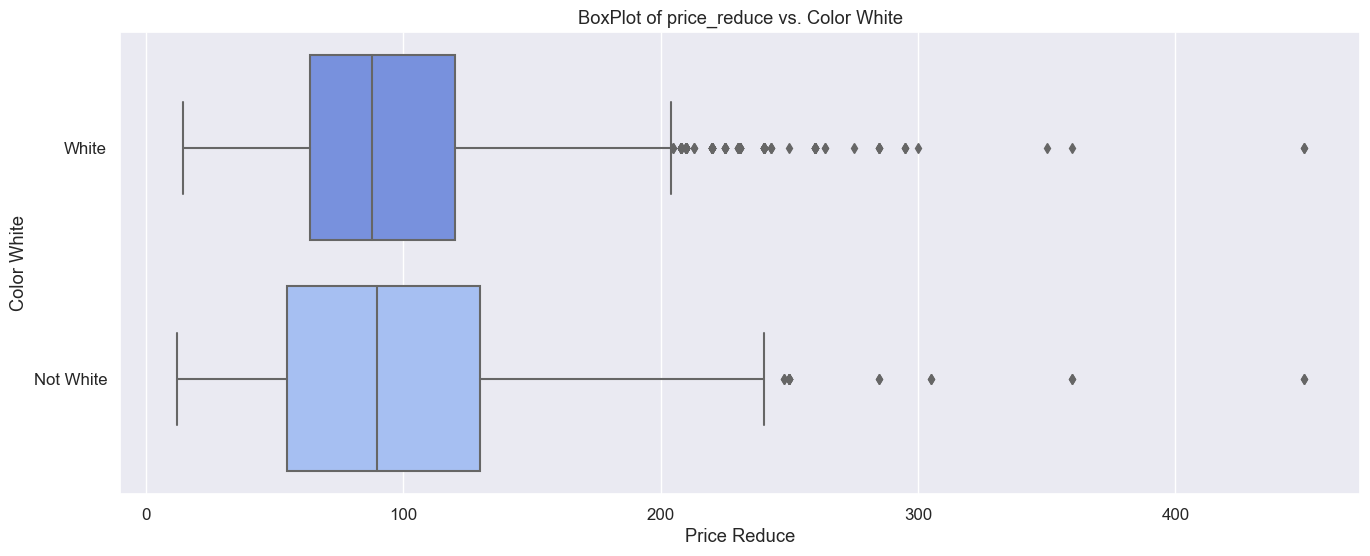

In [79]:
# Visualizing and comparing each independent variable with target
# Columns price 
col = 'price_reduce'
category_col= 'color_3_'

boxplot_by_category(col, category_col,  xlabel='Price Reduce', cat_label='Color White', figsize=(16,6), palette='coolwarm', xscale='')

#### Star Rating distribution according to Color: White

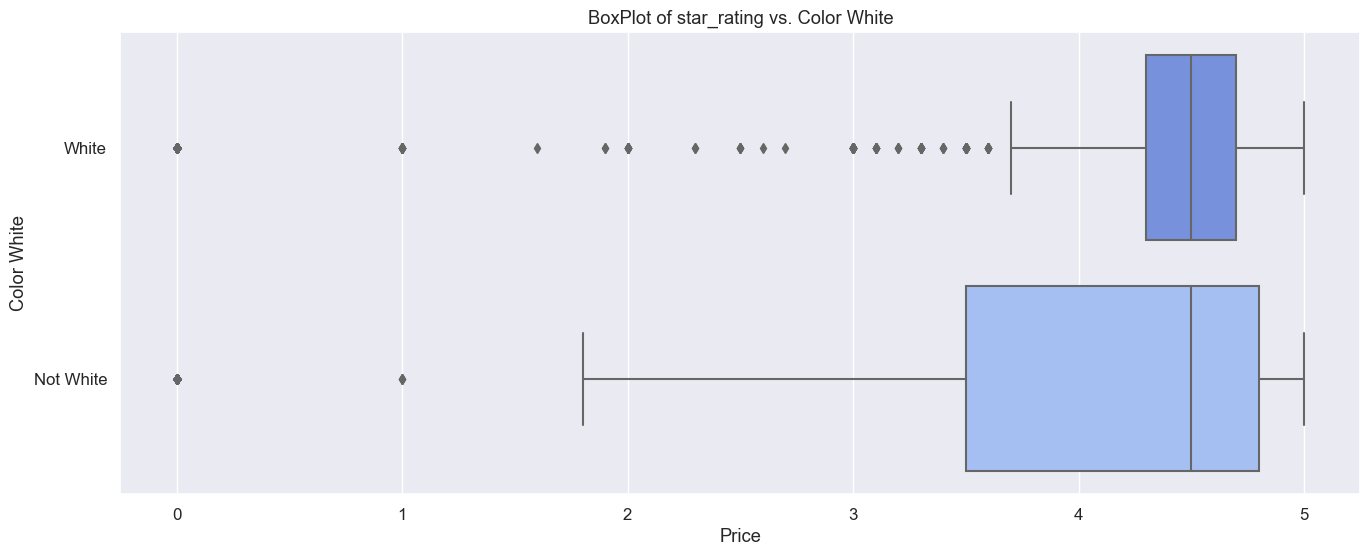

In [80]:
# Visualizing and comparing each independent variable with target
# Columns star_rating
col = 'star_rating'
category_col= 'color_3_'

boxplot_by_category(col, category_col,  xlabel='Price', cat_label='Color White', figsize=(16,6), palette='coolwarm', xscale='')

#### 1.4.2.1.5 Color: Red
#### Price distribution according to Color: Red

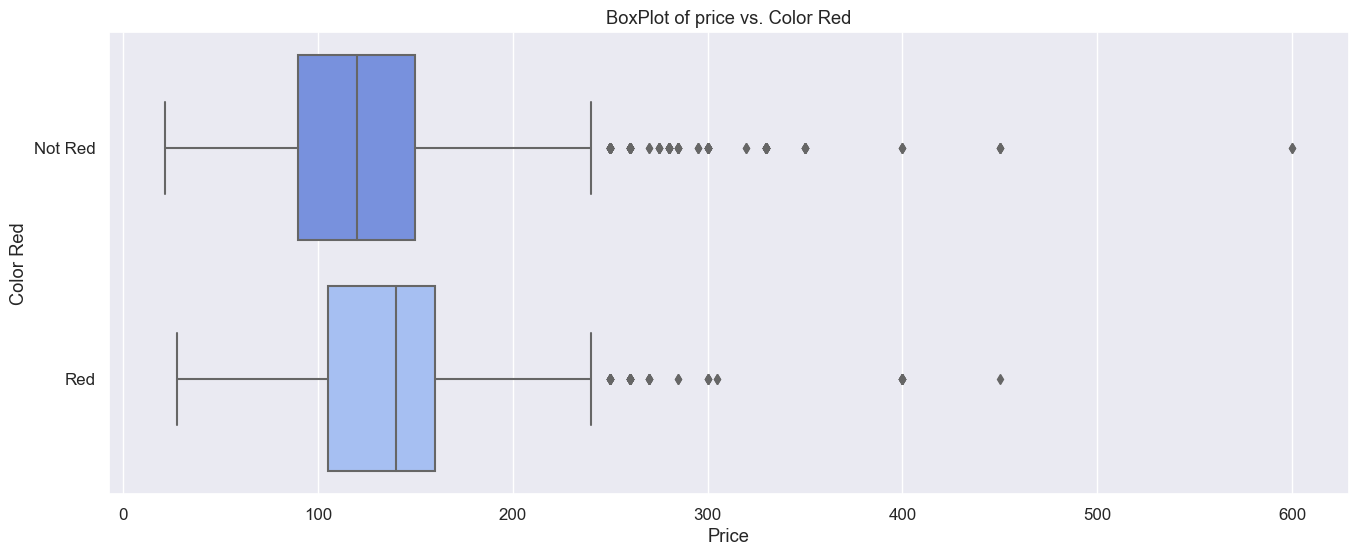

In [81]:
# Visualizing and comparing each independent variable with target
# Columns price 
col = 'price'
category_col= 'color_4_'

boxplot_by_category(col, category_col,  xlabel='Price', cat_label='Color Red', figsize=(16,6), palette='coolwarm', xscale='')

#### Price_reduce distribution according to Color: Red

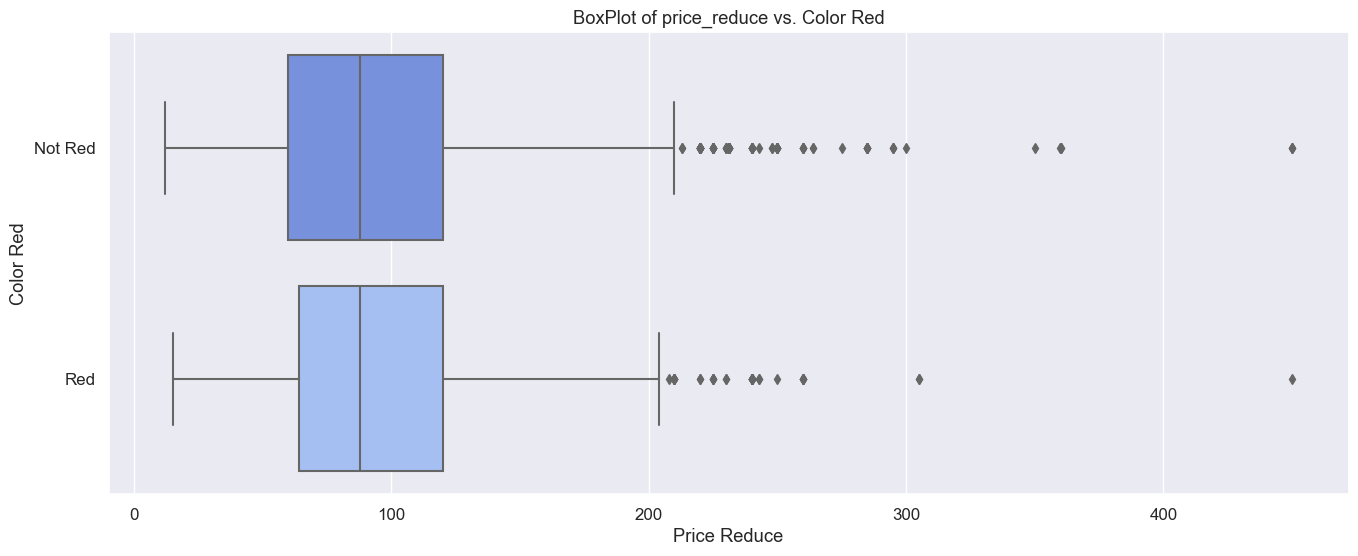

In [82]:
# Visualizing and comparing each independent variable with target
# Columns price 
col = 'price_reduce'
category_col= 'color_4_'

boxplot_by_category(col, category_col,  xlabel='Price Reduce', cat_label='Color Red', figsize=(16,6), palette='coolwarm', xscale='')

#### Star Rating distribution according to Color: Red

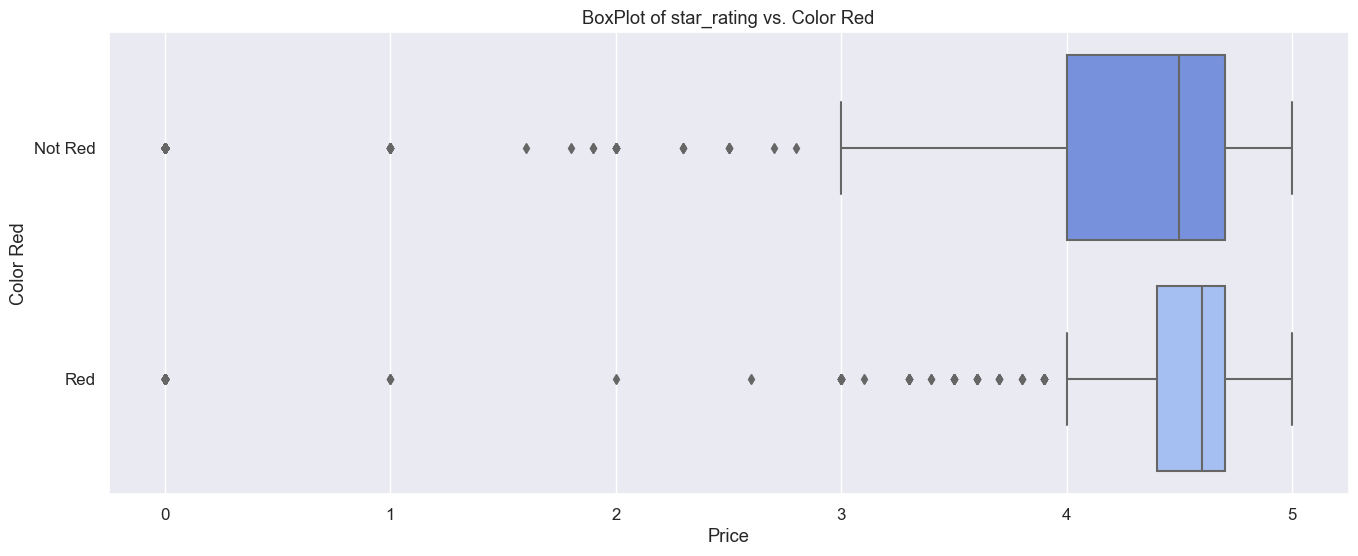

In [83]:
# Visualizing and comparing each independent variable with target
# Columns star_rating
col = 'star_rating'
category_col= 'color_4_'

boxplot_by_category(col, category_col,  xlabel='Price', cat_label='Color Red', figsize=(16,6), palette='coolwarm', xscale='')

#### 1.4.2.1.6 Other_column

#### Price distribution according to Other Colors

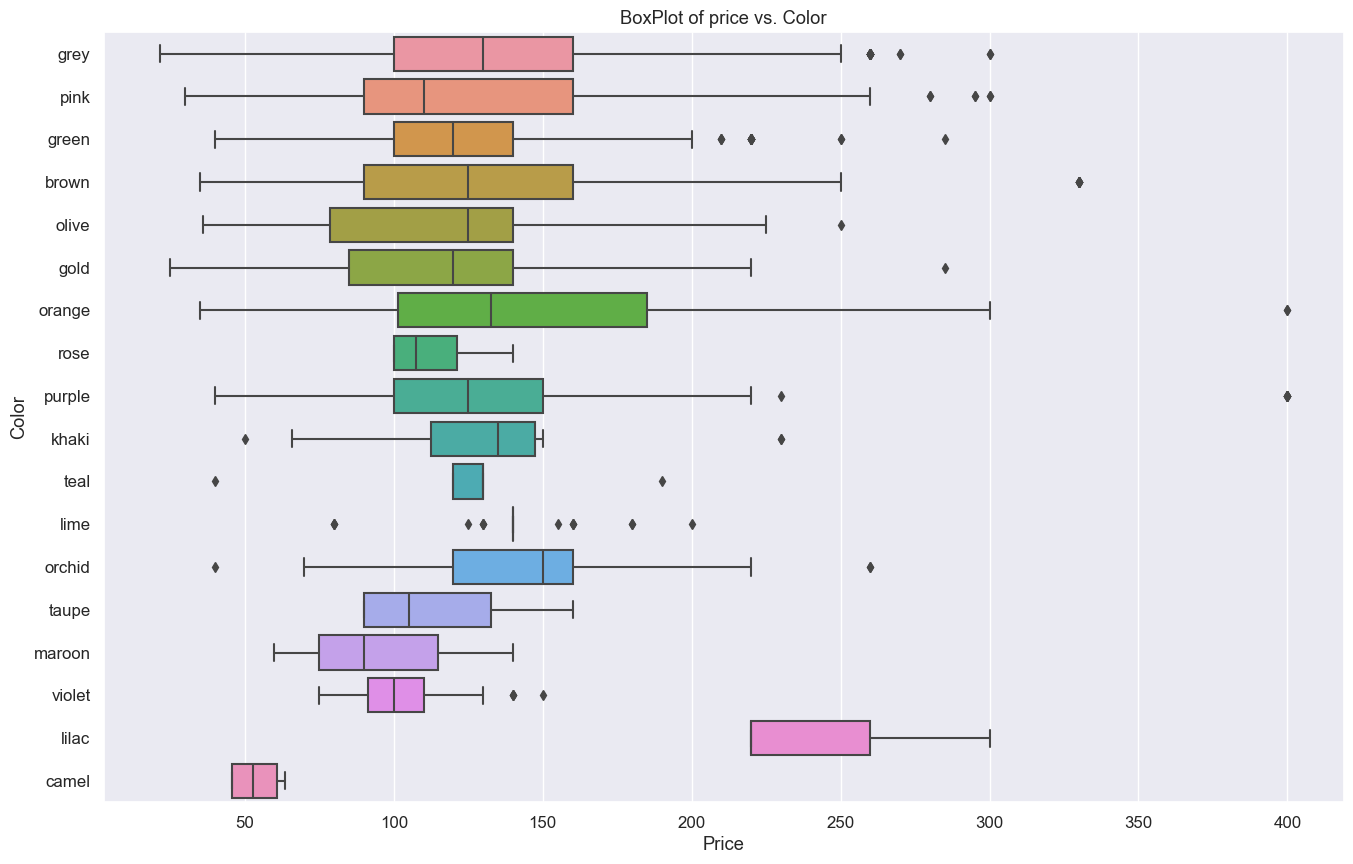

In [84]:
# Visualizing and comparing each independent variable with target
# Columns price 
col = 'price'
category_col= 'other_color'

boxplot_by_category(col, category_col,  xlabel='Price', cat_label='Color', figsize=(16,10), palette='coolwarm', xscale='')

#### Price_reduce distribution according to other_color

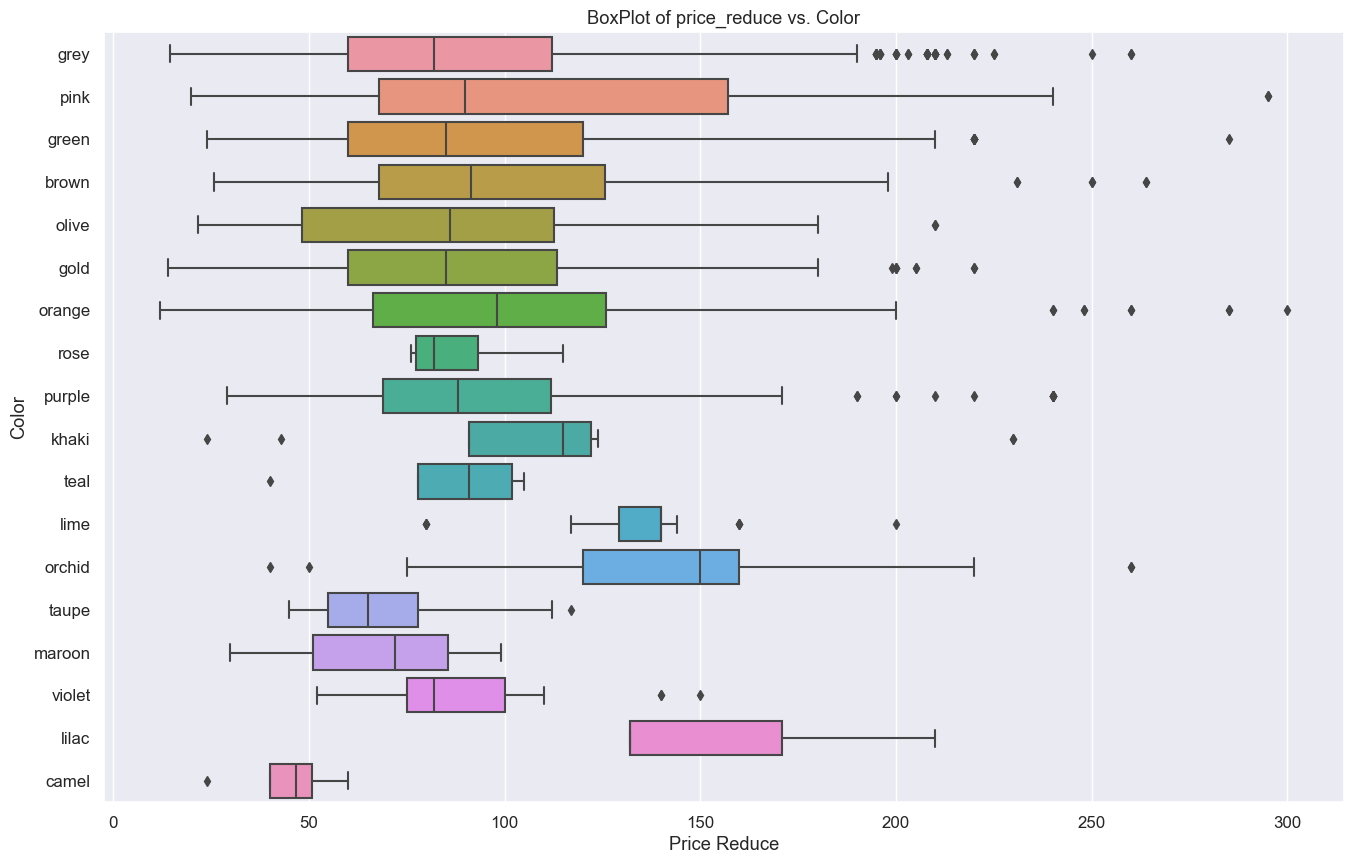

In [85]:
# Visualizing and comparing each independent variable with target
# Columns price 
col = 'price_reduce'
category_col= 'other_color'

boxplot_by_category(col, category_col,  xlabel='Price Reduce', cat_label='Color', figsize=(16,10), palette='coolwarm', xscale='')

#### Star Rating distribution according to other_color

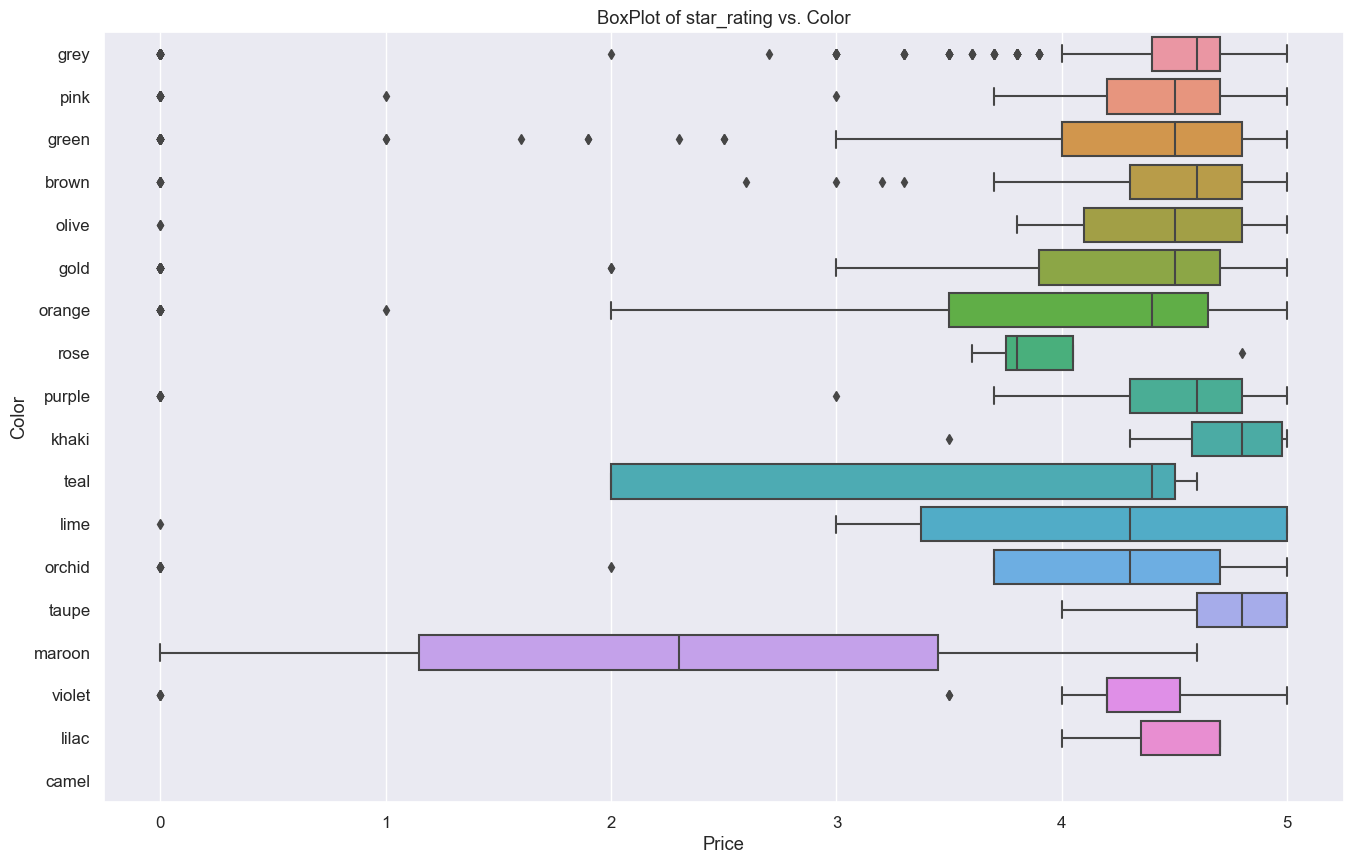

In [86]:
# Visualizing and comparing each independent variable with target
# Columns star_rating
col = 'star_rating'
category_col= 'other_color'

boxplot_by_category(col, category_col,  xlabel='Price', cat_label='Color', figsize=(16,10), palette='coolwarm', xscale='')

In [87]:
def plot_scatter_target_r_according_to(x_col, y_col, category_col, xlabel, ylabel, cat_label, title, palette):
    '''Draw a scatter plot comparing <x_col> with <y_col> variable.'''
    plt.figure(figsize=(8, 4))
    sns.set(font_scale=1)  

    # Plot scatterplot
    sns.scatterplot(x=x_col, y=y_col, hue=category_col, data=df, palette=palette)

    # visual presentation
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1)).set_title(cat_label if cat_label else category_col)
    plt.xlabel(xlabel if xlabel else x_col)
    plt.ylabel(ylabel if ylabel else y_col)
    if title:
        plt.title(title)
    else:
        plt.title(f'{xlabel if xlabel else x_col} vs. {ylabel if ylabel else y_col} according to {cat_label if cat_label else category_col}')
    plt.show()

#### 1.4.2.2.a Analyzing the Relationship Between Price and Color Variety Across Categories: A Scatter Plot Exploration

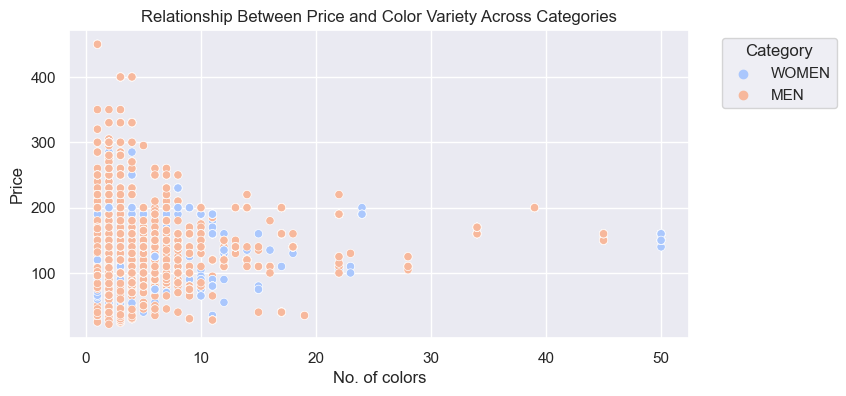

In [88]:
col = 'no_colors'
plot_scatter_target_r_according_to(col, y_col='price', category_col='Category_gral',
                                   xlabel='No. of colors', ylabel='Price', cat_label='Category',
                                   title='Relationship Between Price and Color Variety Across Categories', 
                                   palette='coolwarm')

Shoes within the Men's category generally exhibit higher prices compared to women's shoes, particularly those with limited color options. On the other hand, Women's shoe prices typically fall within a moderate range, yet those with fewer color options usually have a higher price than those offering a more extensive color selection.

#### 1.4.2.2.b Analyzing the Impact of Color Variety on Discounted Prices Across Categories

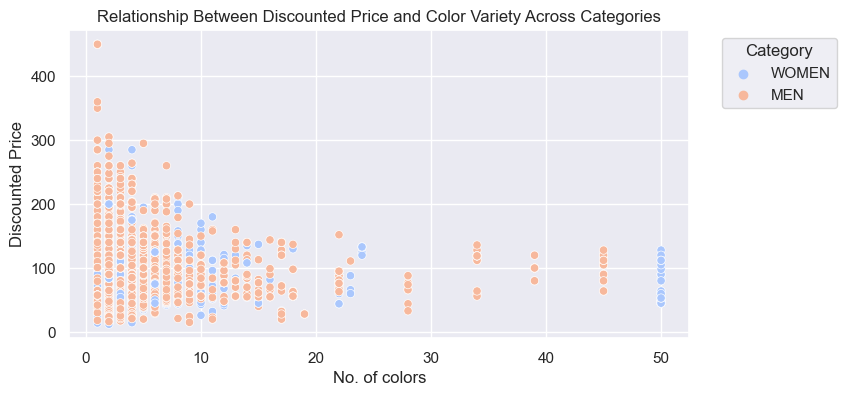

In [89]:
col = 'no_colors'
plot_scatter_target_r_according_to(col, y_col='price_reduce', category_col='Category_gral',
                                   xlabel='No. of colors', ylabel='Discounted Price', cat_label='Category',
                                   title='Relationship Between Discounted Price and Color Variety Across Categories', 
                                   palette='coolwarm')

Compared to the preceding plot, the general trends remain consistent: the Men's category continues to showcase higher prices in contrast to women's shoes, and those with restricted color options command higher prices than their counterparts with a broader color selection. However, it is noteworthy that a significant number of observations consistently stay below 100 or in close proximity to 100.

#### 1.4.2.2.c Analyzing the Relationship Between Star Rating and Color Variety Across Categories

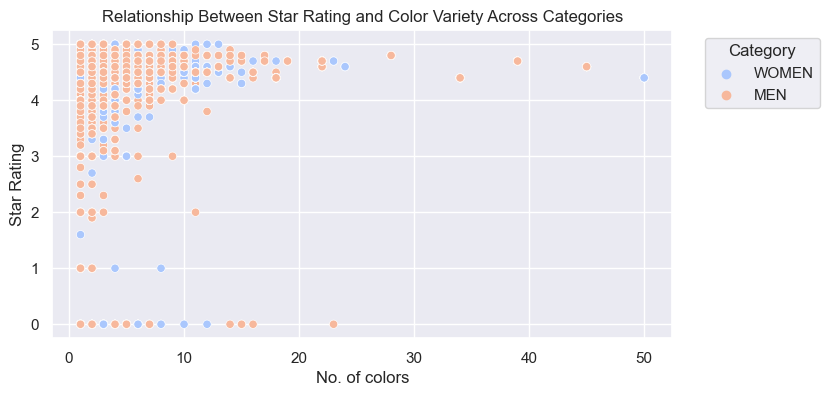

In [90]:
col = 'no_colors'
plot_scatter_target_r_according_to(col, y_col='star_rating', category_col='Category_gral',
                                   xlabel='No. of colors', ylabel='Star Rating', cat_label='Category',
                                   title='Relationship Between Star Rating and Color Variety Across Categories', 
                                   palette='coolwarm')

Most men's and women's shoes generally receive ratings higher than 4, irrespective of the number of colors available. However, some observations with notably low ratings stand out, particularly for shoes with a limited color variety. This could be attributed to the fact that these shoes typically fall within a higher price range, leading customers to have elevated expectations. On the contrary, shoes offering a broad spectrum of colors consistently exhibit ratings that do not dip below 4.

#### 1.4.2.3.a Analyzing the Relationship Between Price and the Count of Sizes Across Categories: A Scatter Plot Exploration

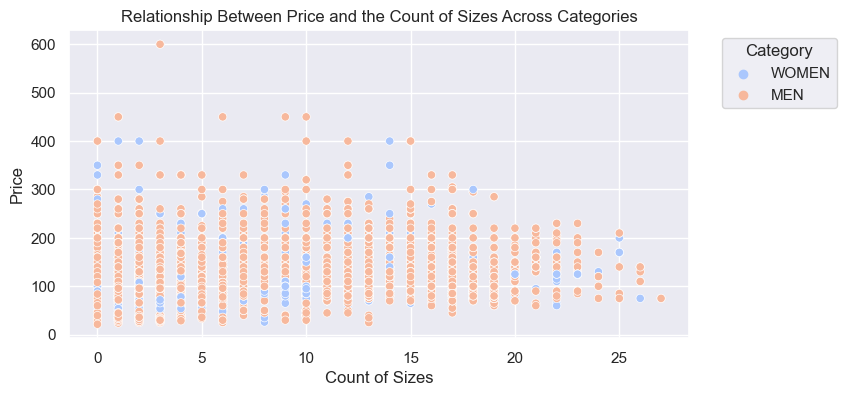

In [91]:
col = 'count_of_sizes'
plot_scatter_target_r_according_to(col, y_col='price', category_col='Category_gral',
                                   xlabel='Count of Sizes', ylabel='Price', cat_label='Category',
                                   title='Relationship Between Price and the Count of Sizes Across Categories', 
                                   palette='coolwarm')

Some men's shoes with higher prices tend to have limited available sizes, although this is a minor occurrence with only a few observations. Similarly, this pattern is observed with women's shoes, with the distinction that women's shoes generally tend to have lower prices overall.

#### 1.4.2.3.b Analyzing the Impact of the Count of Sizes on Discounted Prices Across Categories

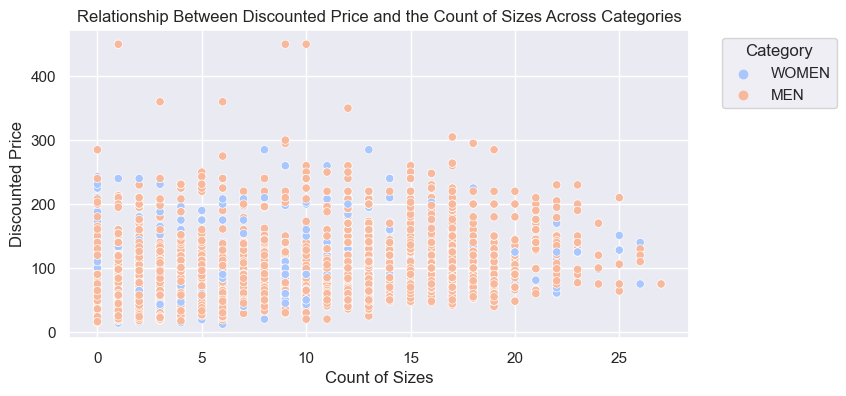

In [92]:
col = 'count_of_sizes'
plot_scatter_target_r_according_to(col, y_col='price_reduce', category_col='Category_gral',
                                   xlabel='Count of Sizes', ylabel='Discounted Price', cat_label='Category',
                                   title='Relationship Between Discounted Price and the Count of Sizes Across Categories', 
                                   palette='coolwarm')

Compared to the previous plot, the conclusions are similar.

#### 1.4.2.3.c Analyzing the Relationship Between Star Rating and the Count of Sizes Across Categories

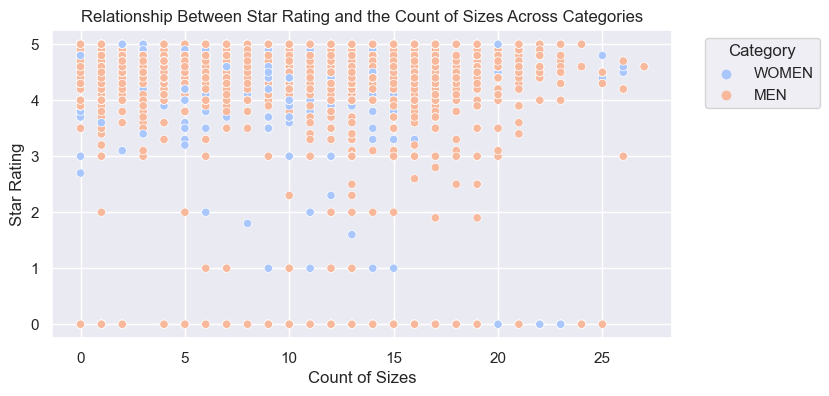

In [93]:
col = 'count_of_sizes'
plot_scatter_target_r_according_to(col, y_col='star_rating', category_col='Category_gral',
                                   xlabel='Count of Sizes', ylabel='Star Rating', cat_label='Category',
                                   title='Relationship Between Star Rating and the Count of Sizes Across Categories', 
                                   palette='coolwarm')

The count of available sizes does not have a significant impact on the star rating score, except in some specific cases. One noticeable trend is that lower ratings, particularly those below 1, tend to be associated with men's shoes.

#### 1.4.2.4.a Analyzing the Relationship Between Price and Number of Reviews Across Categories: A Scatter Plot Exploration

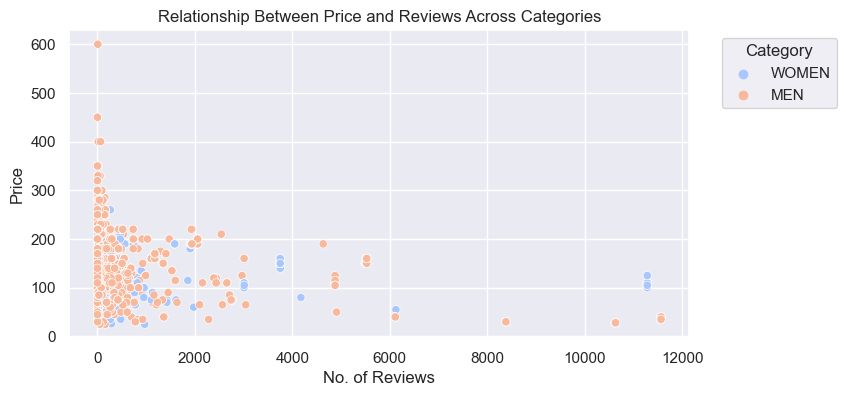

In [94]:
col = 'n_reviews'
plot_scatter_target_r_according_to(col, y_col='price', category_col='Category_gral',
                                   xlabel='No. of Reviews', ylabel='Price', cat_label='Category',
                                   title='Relationship Between Price and Reviews Across Categories', 
                                   palette='coolwarm')

The most expensive men's shoes tend to have zero reviews, and as the shoe price decreases, they tend to accumulate more reviews. A similar pattern is observed with women's shoes.

#### 1.4.2.4.b Analyzing the Impact of Number of Reviews on Discounted Prices Across Categories

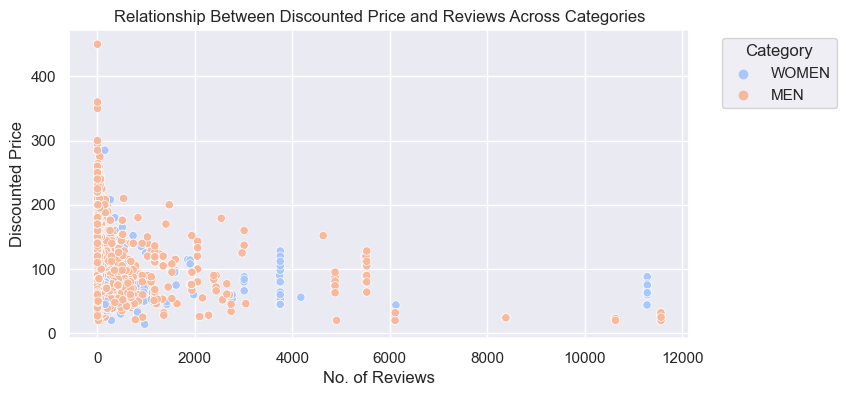

In [95]:
col = 'n_reviews'
plot_scatter_target_r_according_to(col, y_col='price_reduce', category_col='Category_gral',
                                   xlabel='No. of Reviews', ylabel='Discounted Price', cat_label='Category',
                                   title='Relationship Between Discounted Price and Reviews Across Categories', 
                                   palette='coolwarm')

Compared to the previous plot, despite preseting a similar pattern, we can observe that discounted shoes with prices ranging from 50 to 100 tend to have more reviews.

#### 1.4.2.4.c Analyzing the Relationship Between Star Rating and Number of Reviews Across Categories

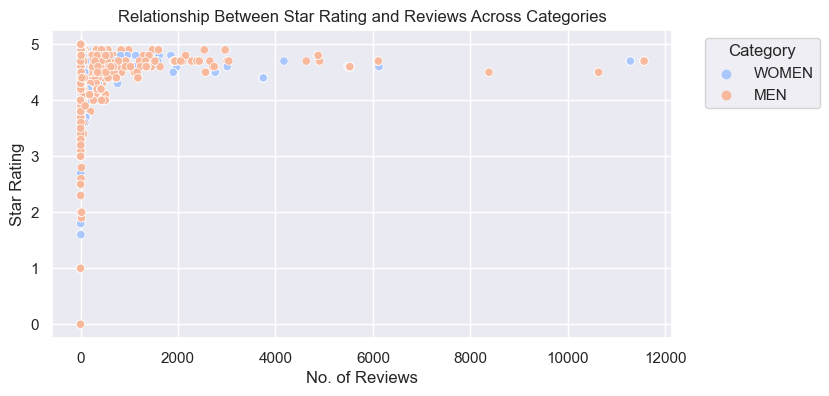

In [96]:
col = 'n_reviews'
plot_scatter_target_r_according_to(col, y_col='star_rating', category_col='Category_gral',
                                   xlabel='No. of Reviews', ylabel='Star Rating', cat_label='Category',
                                   title='Relationship Between Star Rating and Reviews Across Categories', 
                                   palette='coolwarm')

In general, the star ratings received by both women's and men's shoes tend to be above 4, consistently maintaining that range even when there are numerous reviews. There are a few instances with lower star ratings, but these are typically associated with shoes that have very few reviews.

#### 1.4.2.5.a Analyzing the Relationship Between Price and Quality, Comfort and Size Across Categories: A Scatter Plot Exploration

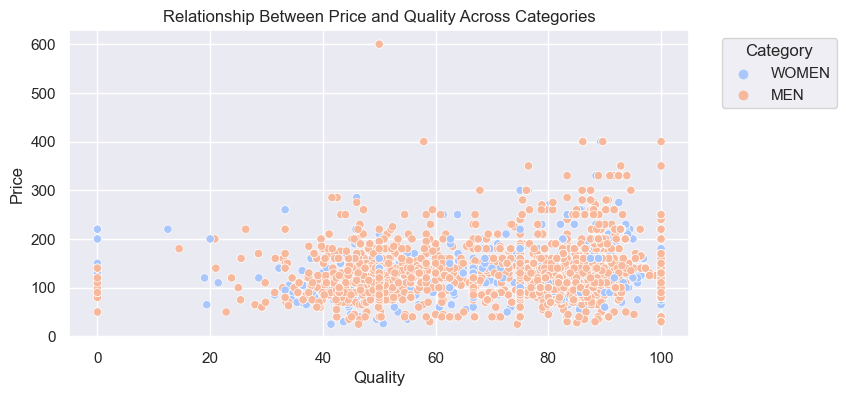

In [97]:
col = 'quality'
plot_scatter_target_r_according_to(col, y_col='price', category_col='Category_gral',
                                   xlabel='Quality', ylabel='Price', cat_label='Category',
                                   title='Relationship Between Price and Quality Across Categories', 
                                   palette='coolwarm')

There is a slight tendency for shoes, especially men's, to have a higher quality rating as their price increases.

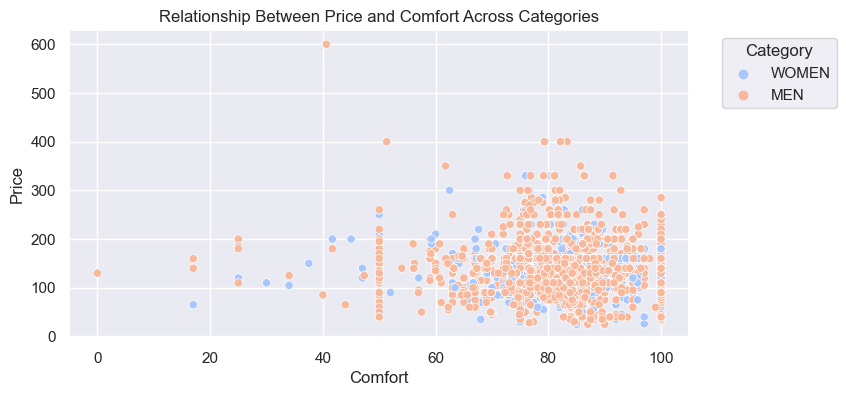

In [98]:
col = 'comfort'
plot_scatter_target_r_according_to(col, y_col='price', category_col='Category_gral',
                                   xlabel='Comfort', ylabel='Price', cat_label='Category',
                                   title='Relationship Between Price and Comfort Across Categories', 
                                   palette='coolwarm')

Comparing with the preceding plot, there is a similar pattern when evaluating comfort, with the difference that men's shoes tend to have a comfort rating generally above 50%. In contrast, women's shoes do show observations with comfort ratings between 20% and 45%, especially for shoes in the moderate price range.

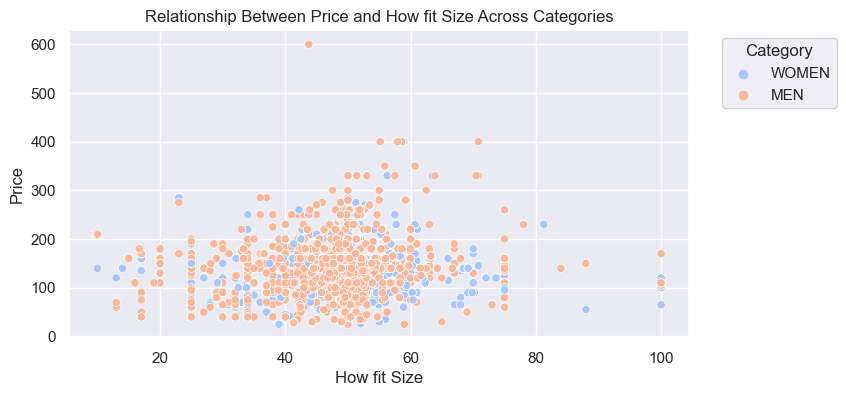

In [99]:
col = 'size'
plot_scatter_target_r_according_to(col, y_col='price', category_col='Category_gral',
                                   xlabel='How fit Size', ylabel='Price', cat_label='Category',
                                   title='Relationship Between Price and How fit Size Across Categories', 
                                   palette='coolwarm')

The more valuable shoes, especially those for men, tend to have a rating between 40% and 60% in terms of how well the shoe fits.

#### 1.4.2.5.b Analyzing the Impact of Quality, Comfort and Size on Discounted Prices Across Categories

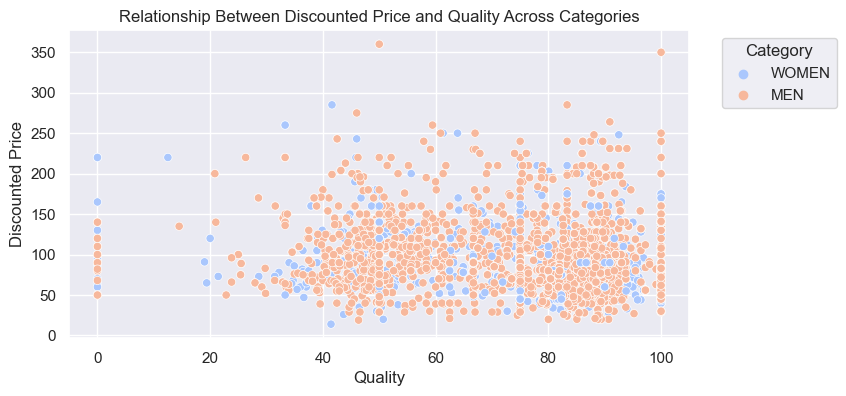

In [100]:
col = 'quality'
plot_scatter_target_r_according_to(col, y_col='price_reduce', category_col='Category_gral',
                                   xlabel='Quality', ylabel='Discounted Price', cat_label='Category',
                                   title='Relationship Between Discounted Price and Quality Across Categories', 
                                   palette='coolwarm')

There is a slight trend indicating that shoes, particularly men's, tend to receive higher quality ratings as their prices increase, even when considering discounts.

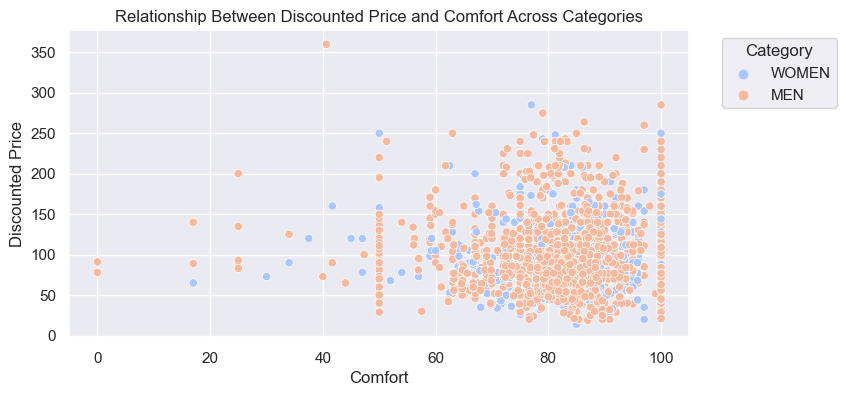

In [101]:
col = 'comfort'
plot_scatter_target_r_according_to(col, y_col='price_reduce', category_col='Category_gral',
                                   xlabel='Comfort', ylabel='Discounted Price', cat_label='Category',
                                   title='Relationship Between Discounted Price and Comfort Across Categories', 
                                   palette='coolwarm')

Comparing to the previous plot, a similar pattern emerges when evaluating comfort, with the difference that men's shoes tend to have a comfort rating generally above 50%. In contrast, observations for women's shoes include comfort ratings ranging from 20% to 45%, particularly for shoes in the moderate price range, even when considering discounts.

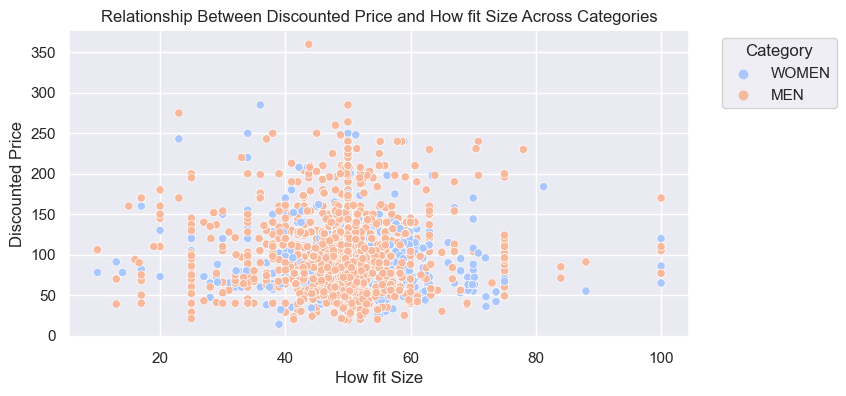

In [102]:
col = 'size'
plot_scatter_target_r_according_to(col, y_col='price_reduce', category_col='Category_gral',
                                   xlabel='How fit Size', ylabel='Discounted Price', cat_label='Category',
                                   title='Relationship Between Discounted Price and How fit Size Across Categories', 
                                   palette='coolwarm')

The more valuable shoes, especially those for men, tend to have a rating between 40% and 60% in terms of how well the shoe fits.

#### 1.4.2.5.c Analyzing the Relationship Between Star Rating and Quality, Comfort and Size Across Categories

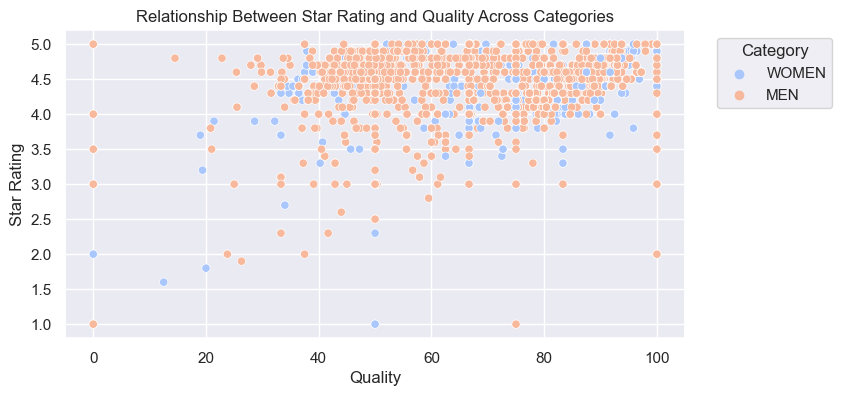

In [103]:
col = 'quality'
plot_scatter_target_r_according_to(col, y_col='star_rating', category_col='Category_gral',
                                   xlabel='Quality', ylabel='Star Rating', cat_label='Category',
                                   title='Relationship Between Star Rating and Quality Across Categories', 
                                   palette='coolwarm')

As expected, higher ratings correspond to higher quality evaluations. Beyond the 40% threshold, ratings fall within the range of 4.5 to 5.0. However, what we can observe is that there is a greater number of observations with low star ratings for women's shoes, and they also tend to have quality evaluations of less than 40%.

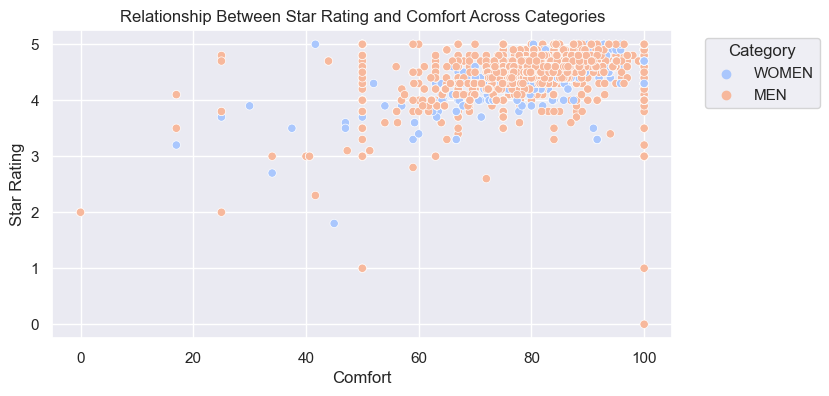

In [104]:
col = 'comfort'
plot_scatter_target_r_according_to(col, y_col='star_rating', category_col='Category_gral',
                                   xlabel='Comfort', ylabel='Star Rating', cat_label='Category',
                                   title='Relationship Between Star Rating and Comfort Across Categories', 
                                   palette='coolwarm')

The highest comfort ratings correspond to star ratings above 3.5.

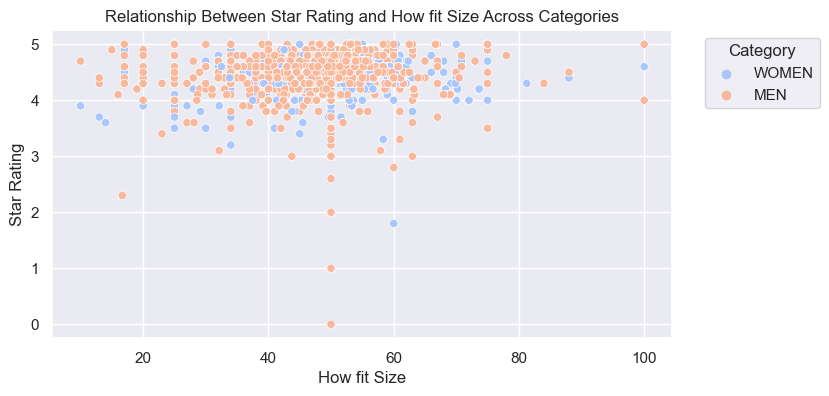

In [105]:
col = 'size'
plot_scatter_target_r_according_to(col, y_col='star_rating', category_col='Category_gral',
                                   xlabel='How fit Size', ylabel='Star Rating', cat_label='Category',
                                   title='Relationship Between Star Rating and How fit Size Across Categories', 
                                   palette='coolwarm')

The highest ratings regarding how well the shoe fits are generally in the range of 40% to 60%, with a star rating of over 4 in most cases. However, despite a high star rating, it doesn't necessarily imply in all cases that the shoe is rated as fitting well. This discrepancy could be due to missing data for this fitting parameter in some instances.

#### 1.4.2.6 Price  according to the Category and Other colors

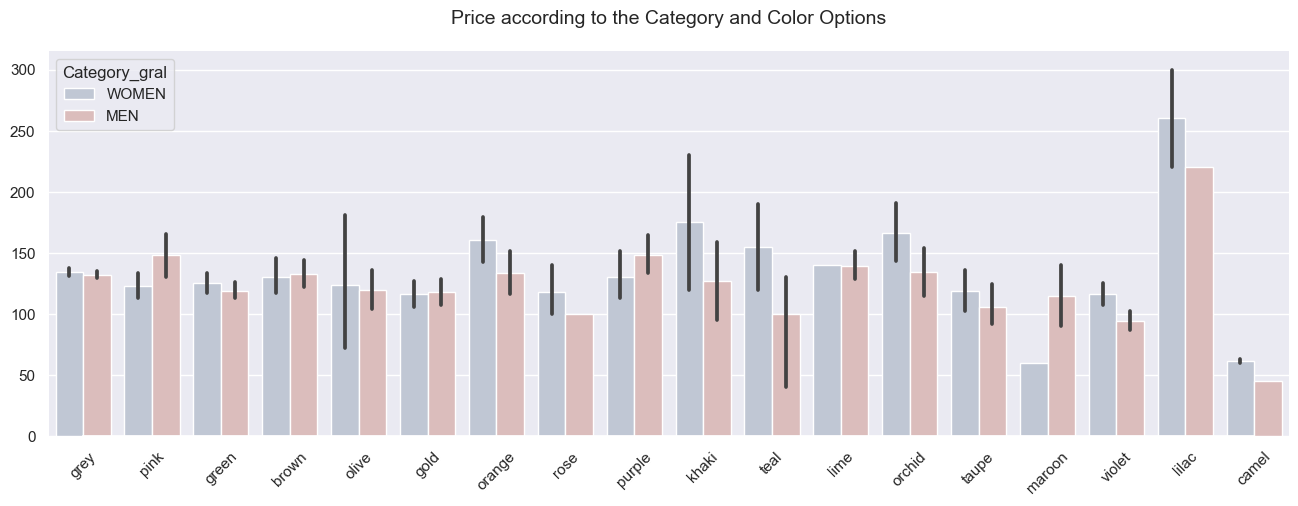

In [106]:
plt.figure(figsize=(16,5))
sns.barplot(x='other_color', y='price', hue='Category_gral', data= df, palette='vlag')

# visual presentation
sns.despine(trim=True, left=True)
plt.ylabel('')
plt.xlabel('')
# plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Price according to the Category and Color Options', size=14, y=1.05)
plt.show()

Shoes in lilac tend to have a higher price, especially those designed for women. Meanwhile, shoes in camel colors tend to be priced lower, but once again, those for women are priced higher.

#### 1.4.2.7 Discounted Price  according to the Category and Other colors

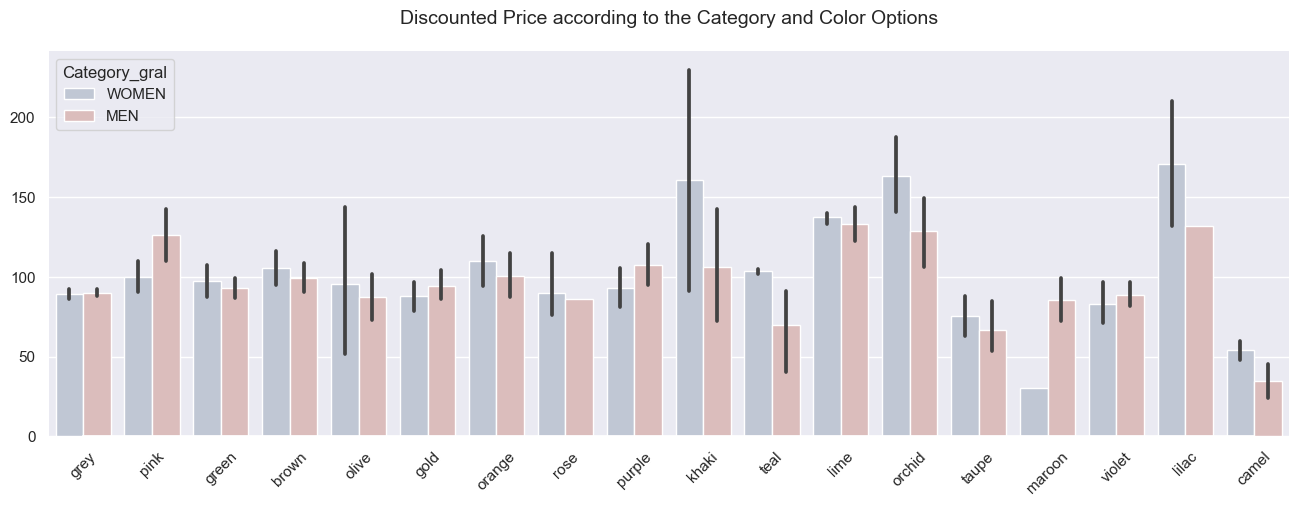

In [107]:
plt.figure(figsize=(16,5))
sns.barplot(x='other_color', y='price_reduce', hue='Category_gral', data= df, palette='vlag')

# visual presentation
sns.despine(trim=True, left=True)
plt.ylabel('')
plt.xlabel('')
# plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Discounted Price according to the Category and Color Options', size=14, y=1.05)
plt.show()

Comparing with the regular price, we can observe differences in the patterns. We notice that lilac shoes consistently top the list for higher prices, but closely following are orchid and khaki, especially in the women's category.

#### 1.4.2.8 Star Rating  according to the Category and Other colors

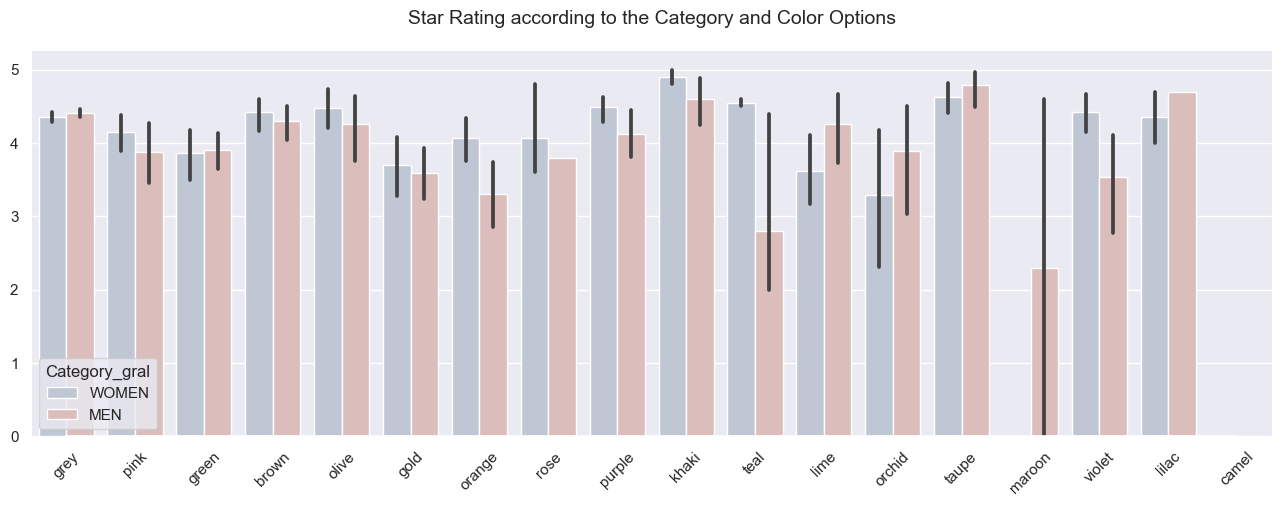

In [108]:
plt.figure(figsize=(16,5))
sns.barplot(x='other_color', y='star_rating', hue='Category_gral', data= df, palette='vlag')

# visual presentation
sns.despine(trim=True, left=True)
plt.ylabel('')
plt.xlabel('')
# plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Star Rating according to the Category and Color Options', size=14, y=1.05)
plt.show()

The majority of shoes, both for men and women and across different color varieties, tend to have a star rating of around 4, with some exceptions. This is evident in cases such as men's brown and khaki shoes, which have a star rating lower than 3.

### 1.4.3 Multivariate Analysis


#### 1.4.3.1 Pairplot

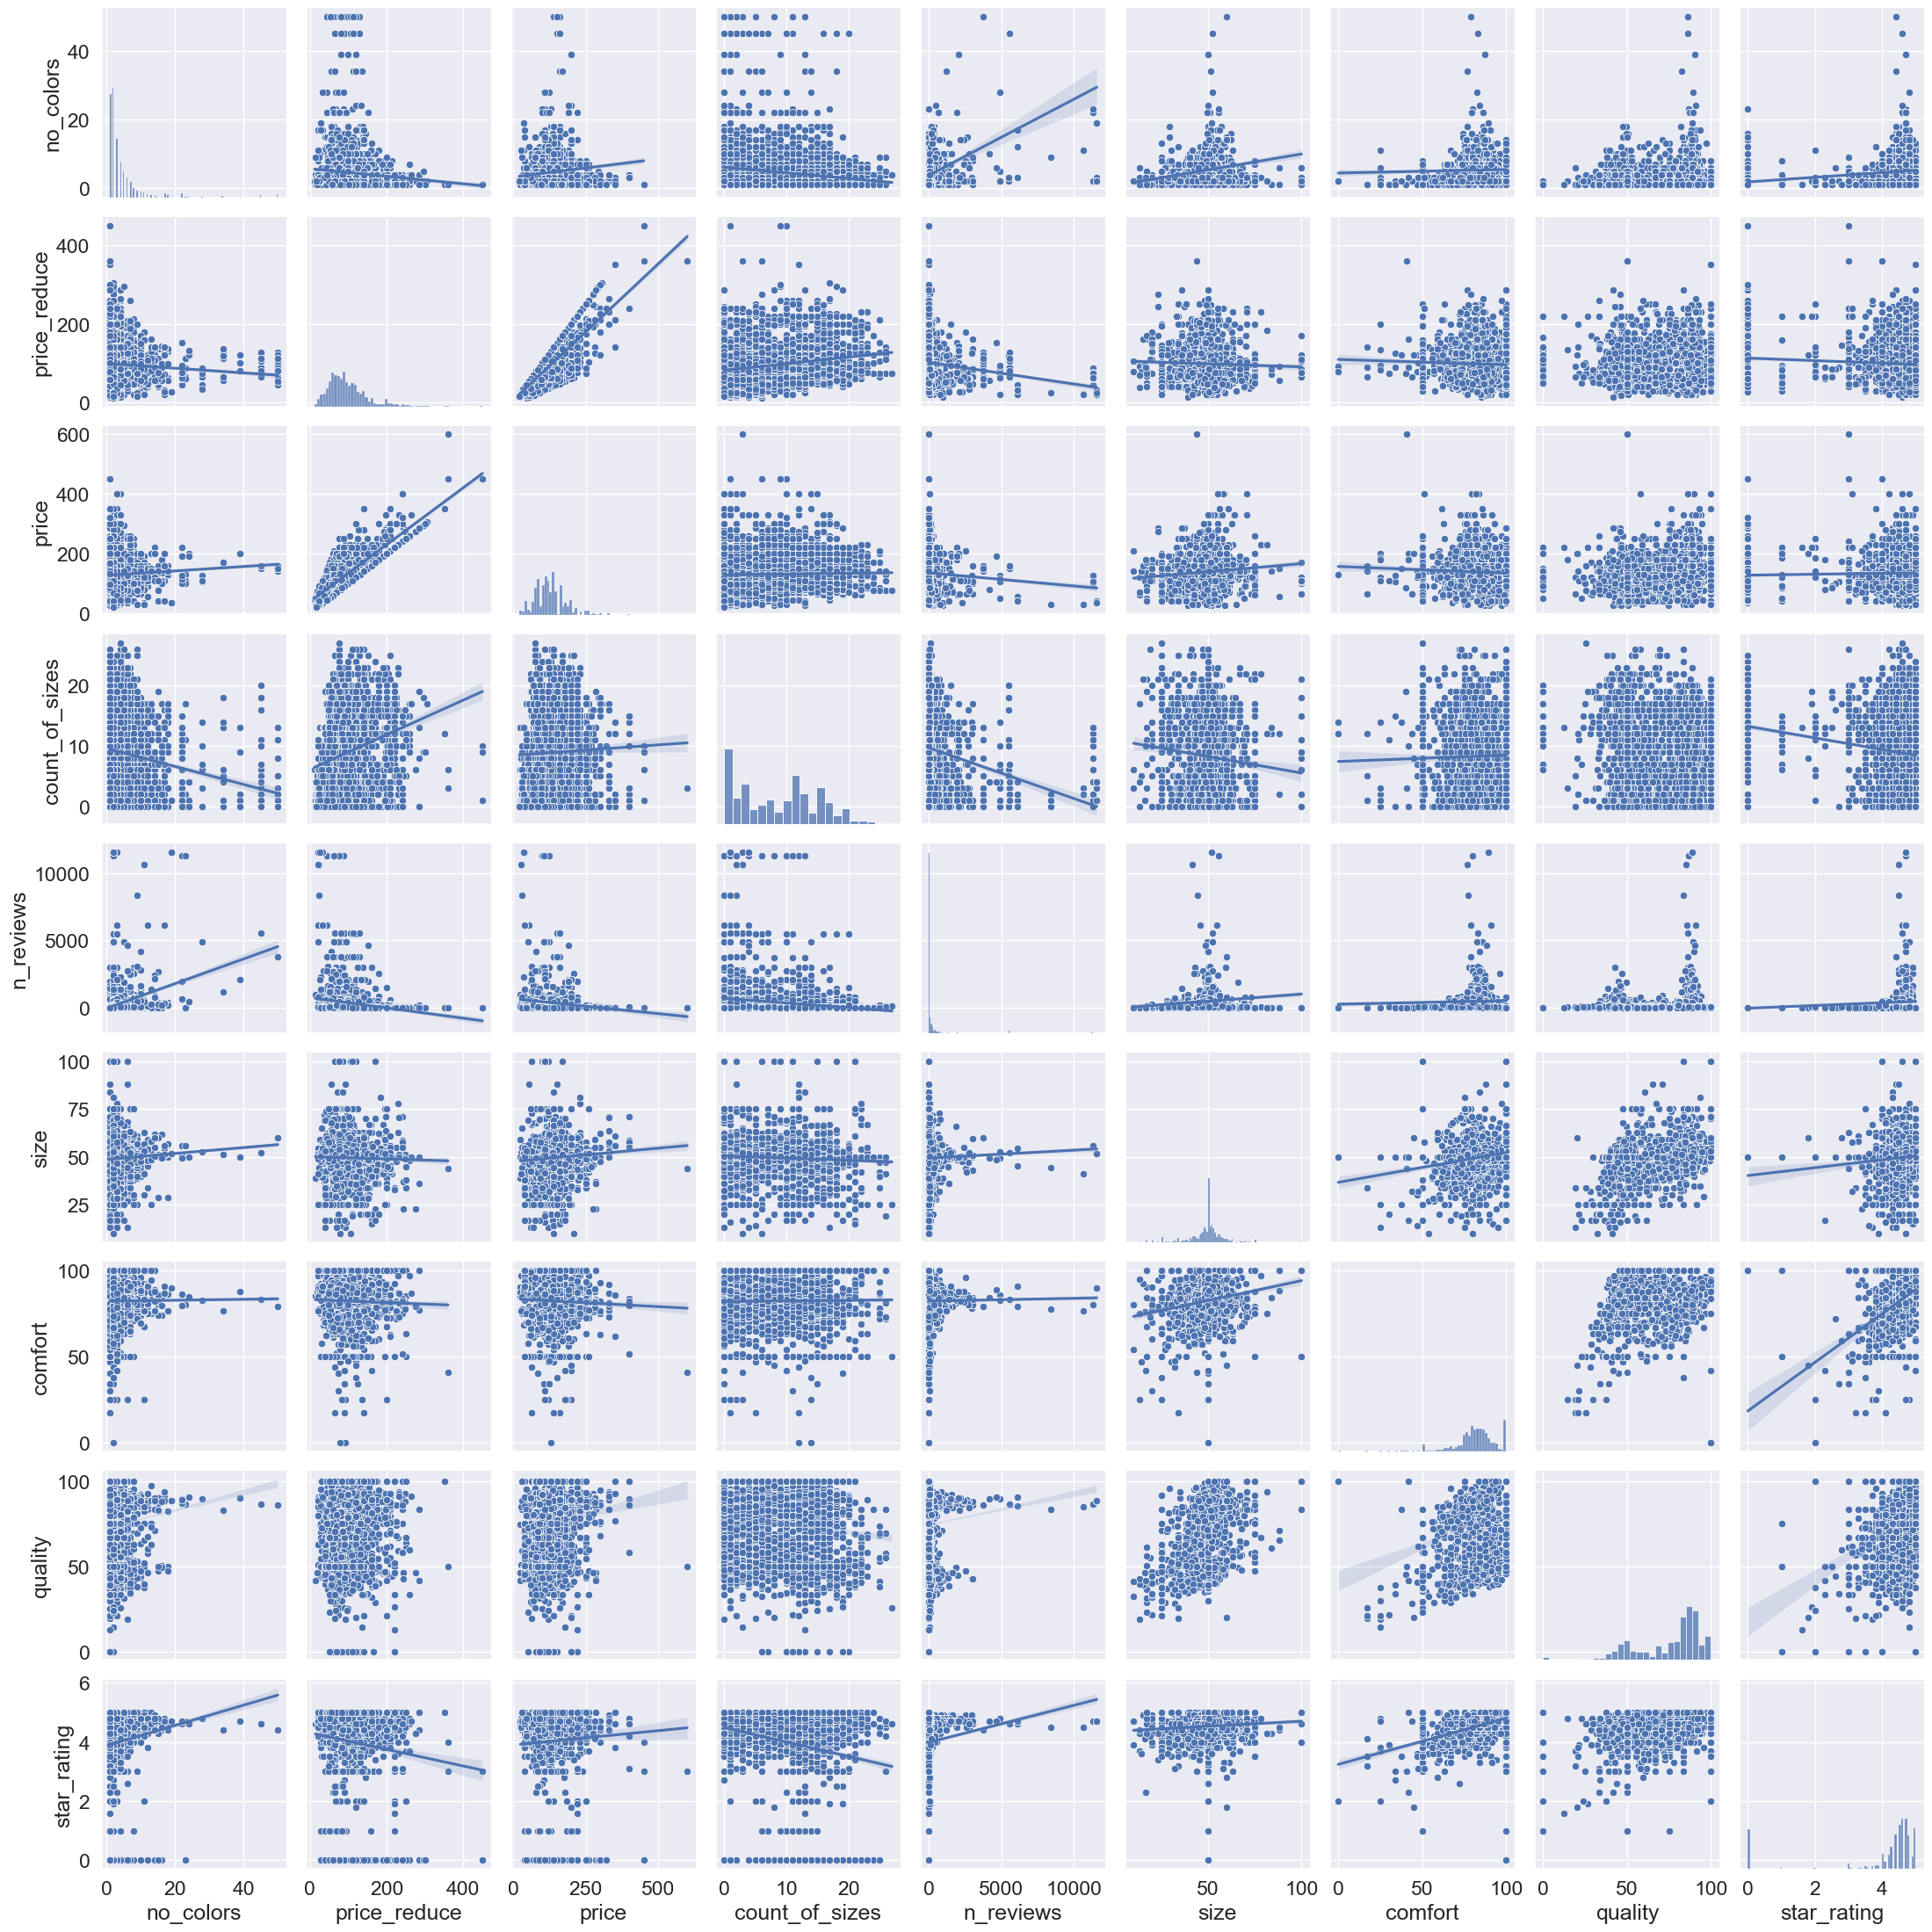

In [109]:
df_pp = df.drop(['color_1','color_2','color_3', 'color_4', 'Category'], axis=1)
sns.set(font_scale=1.5)  
grid = sns.pairplot(df, palette = "coolwarm")

# Add a regression line for non-diagonal plots
for ax in grid.axes.flat[1:-1]: # first and last axes are not considered
    if ax.get_xlabel() != ax.get_ylabel():
        sns.regplot(data=df, x=ax.get_xlabel(), y=ax.get_ylabel(), scatter=False, ax=ax, color='b')

plt.show()

We observe a positive correlation between 'star_rating' and 'price,' 'no_colors,' 'n_reviews,' and 'comfort,' as well as a negative correlation between 'star_rating' and 'price_reduce.'

When analyzing 'price,' we notice a positive correlation with 'price_reduce' and 'size.' Conversely, there is a negative correlation between 'price' and 'n_reviews.'

Turning our attention to 'price_reduce,' we identify a positive correlation with 'price.' Also, there is a negative correlation between 'price' and 'n_reviews.'

#### 1.4.3.2 Correlation between 'Average Cost for Two' and 'Price range' with independent variables

In [110]:
# Calculate the correlation between features
cor = df.corr()
cor

no_colors  price_reduce     price  count_of_sizes  n_reviews  \
no_colors        1.000000     -0.080546  0.088619       -0.156372   0.451422   
price_reduce    -0.080546      1.000000  0.814500        0.220618  -0.145249   
price            0.088619      0.814500  1.000000        0.031293  -0.098988   
count_of_sizes  -0.156372      0.220618  0.031293        1.000000  -0.171678   
n_reviews        0.451422     -0.145249 -0.098988       -0.171678   1.000000   
size             0.118973     -0.030835  0.086514       -0.079237   0.066317   
comfort          0.016776     -0.034683 -0.044817        0.019587   0.020778   
quality          0.175897     -0.111673  0.120746       -0.153453   0.125161   
star_rating      0.152078     -0.095076  0.038453       -0.216372   0.113458   

                    size   comfort   quality  star_rating  
no_colors       0.118973  0.016776  0.175897     0.152078  
price_reduce   -0.030835 -0.034683 -0.111673    -0.095076  
price           0.086514 -0.044817  0.120746     0.038453  
count_of_sizes -0.079237  0.019587 -0.153453    -0.216372  
n_reviews       0.066317  0.020778  0.125161     0.113458  
size            1.000000  0.189976  0.438381     0.083702  
comfort         0.189976  1.000000  0.267602     0.469181  
quality         0.438381  0.267602  1.000000     0.304906  
star_rating     0.083702  0.469181  0.304906     1.000000

In [111]:
# Listing the correlation coeficients with the target variable (Regression model)
corr_df = cor.unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[(corr_df['Feature A']=='price') &  (corr_df['Feature B'] != 'price')]

Feature A       Feature B  Corr coef
10     price    price_reduce   0.814500
31     price         quality   0.120746
38     price       no_colors   0.088619
40     price            size   0.086514
46     price     star_rating   0.038453
47     price  count_of_sizes   0.031293
59     price         comfort  -0.044817
68     price       n_reviews  -0.098988

Clearly, there is a correlation between 'price' and 'price_reduce' due to the nature of these features. However, when constructing the model, only one of these features will be considered as the target, and the other must be discarded.

In addition to this, the correlation analysis indicates a weak positive relationship between the target variable 'price' and the following features: 'quality,' 'no_colors,' and 'size.'

In [112]:
# Listing the correlation coeficients with the target variable (Regression model)
corr_df = cor.unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[(corr_df['Feature A']=='price_reduce') &  (corr_df['Feature B'] != 'price_reduce')]

Feature A       Feature B  Corr coef
9   price_reduce           price   0.814500
22  price_reduce  count_of_sizes   0.220618
55  price_reduce            size  -0.030835
58  price_reduce         comfort  -0.034683
63  price_reduce       no_colors  -0.080546
65  price_reduce     star_rating  -0.095076
70  price_reduce         quality  -0.111673
71  price_reduce       n_reviews  -0.145249

After the correlation analysis of the target feature 'price_reduce,' we can determine that it exhibits a weak positive relationship with 'count_of_sizes'.

In [113]:
# Listing the correlation coeficients with the target variable (Regression model)
corr_df = cor.unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[(corr_df['Feature A']=='star_rating') &  (corr_df['Feature B'] != 'star_rating')]

Feature A       Feature B  Corr coef
11  star_rating         comfort   0.469181
18  star_rating         quality   0.304906
27  star_rating       no_colors   0.152078
36  star_rating       n_reviews   0.113458
42  star_rating            size   0.083702
45  star_rating           price   0.038453
66  star_rating    price_reduce  -0.095076
79  star_rating  count_of_sizes  -0.216372

The correlation analysis reveals a moderately positive relationship between the target variable 'star_rating' and the following features: 'comfort,' 'quality,' 'no_colors,' and 'n_reviews.' Additionally, there is a negative correlation with 'count_of_sizes.'

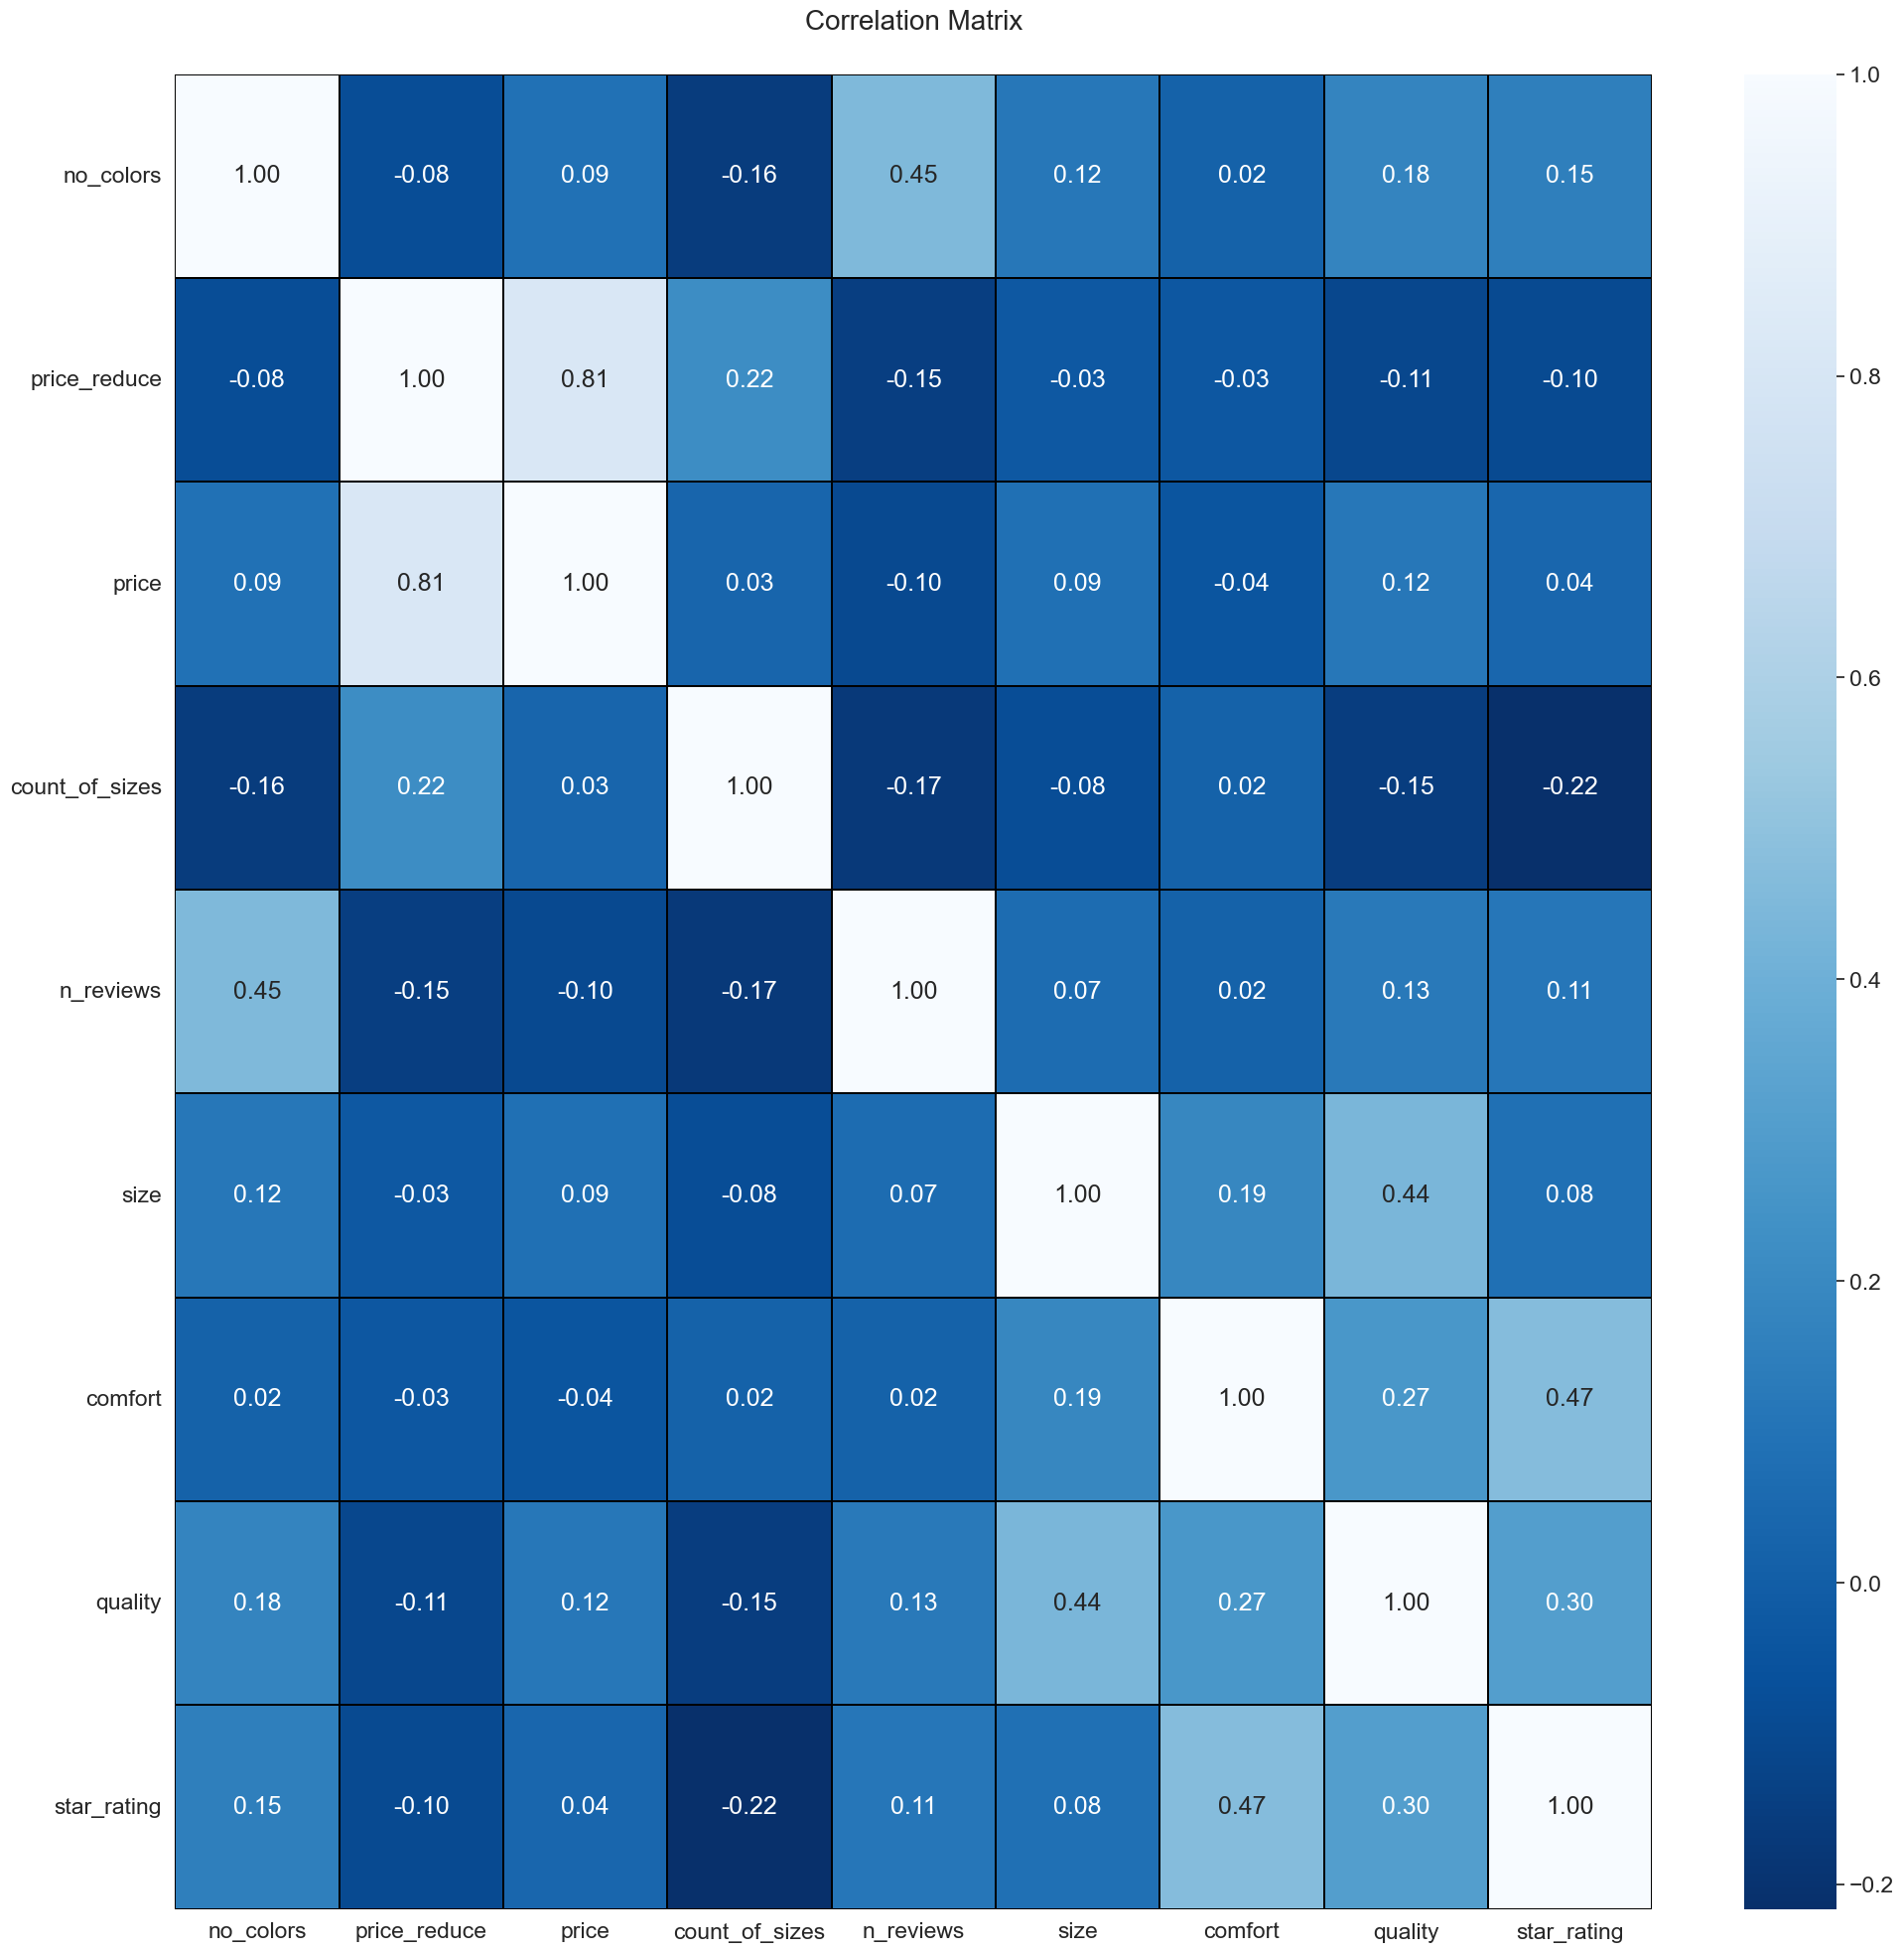

In [114]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(24, 24))
sns.set(font_scale=1.5)

sns.heatmap(cor, linewidths = 0.1, fmt = ".2f", linecolor = 'black', cmap='Blues_r', annot=True)
plt.yticks(rotation = 0)
plt.title('Correlation Matrix', size=20, y=1.02)
plt.show()

This heatmap illustrates the correlation matrix, revealing relationships between features as well as between features and the target variable.
- The heatmap illustrates both positive and negative correlations.
- The variable 'Price' shows a weak correlation with all other variables, except with 'price_reduce' due to the nature of these two features.
- The 'star_rating' variable exhibits a significant positive correlation with 'comfort' (+0.47), 'quality' (+0.30), and a negative correlation with 'count_of_sizes' (-0.22).
- The variable 'price_reduce' demonstrates a weak positive correlation with 'count_of_sizes' (+0.22).
- Other variables that show correlations include:
  * 'no_colors' with 'n_reviews' (+0.45)
  * 'quality' with 'size' (+0.44)

In [115]:
df.head()

ShoeName Category  no_colors  price_reduce  price  \
0                                NaN    Women        1.0        115.00  115.0   
1                   Nike Gamma Force    Women        9.0         72.97   90.0   
2  Nike Court Vision Low Next Nature    Women        6.0         60.97   80.0   
3                   Nike Air Max 270    Women       12.0        120.97  160.0   
4                     Nike Air Max 1    Women        6.0        140.00  140.0   

  product_code  count_of_sizes color_1 color_2 color_3  ... n_reviews  size  \
0   DD1503-101              13   Black     NaN   White  ...     617.0  49.0   
1   DX9176-101              15   Black    Blue   White  ...     147.0  61.0   
2   DH3158-107              15   Black    Blue   White  ...     199.0  59.0   
3   DZ7736-002              15   Black    Blue   White  ...       2.0   NaN   
4   DZ2628-102              13   Black    Blue   White  ...      70.0  43.0   

   comfort  quality  star_rating  Category_gral  color_1_  color_2_ color_3_  \
0     78.0    44.66          4.8          WOMEN     Black  Not Blue    White   
1     75.0    50.78          4.5          WOMEN     Black      Blue    White   
2     78.0    46.67          4.6          WOMEN     Black      Blue    White   
3      NaN      NaN          5.0          WOMEN     Black      Blue    White   
4     78.0    54.62          4.6          WOMEN     Black      Blue    White   

  color_4_  
0  Not Red  
1      Red  
2  Not Red  
3  Not Red  
4  Not Red  

[5 rows x 22 columns]

# 2. Preprocessing Data
## 2.1 Missing values
In Section 1.2, it was identified that the dataset contains missing values. In the following steps, we will address this issue.

In [116]:
df_backup1 = df.copy()

In [117]:
# checking the null values
missing_val = df.isnull().sum().to_frame("Null values")

# Calculate the % of the null values
missing_val["% of missing"] = round(missing_val['Null values'] / len(df) * 100,2)

missing_val

Null values  % of missing
ShoeName                  1          0.02
Category                  0          0.00
no_colors                12          0.29
price_reduce             16          0.38
price                    16          0.38
product_code             26          0.62
count_of_sizes            0          0.00
color_1                 909         21.71
color_2                2373         56.68
color_3                 821         19.61
color_4                2654         63.39
other_color            1213         28.97
n_reviews               321          7.67
size                   1299         31.02
comfort                1261         30.12
quality                 876         20.92
star_rating             321          7.67
Category_gral             0          0.00
color_1_                  0          0.00
color_2_                  0          0.00
color_3_                  0          0.00
color_4_                  0          0.00

### 2.1.1 Impute other_color column with 'color_1', 'color_2', 'color_3', 'color_4'

In [118]:
# First obtain the indexes of the rows with other_column = null
indexes = df[df['other_color'].isna()].index
df.loc[indexes][['other_color','color_1', 'color_2', 'color_3', 'color_4' ]]

other_color color_1 color_2 color_3 color_4
0            NaN   Black     NaN   White     NaN
8            NaN   Black     NaN   White     NaN
18           NaN   Black     NaN   White     NaN
22           NaN   Black     NaN   White     NaN
59           NaN   Black     NaN   White     NaN
...          ...     ...     ...     ...     ...
4393         NaN   Black    Blue     NaN     Red
4394         NaN   Black     NaN   White     NaN
4395         NaN   Black    Blue     NaN     NaN
4400         NaN     NaN    Blue     NaN     NaN
4420         NaN   Black    Blue     NaN     NaN

[1213 rows x 5 columns]

In [119]:
colors_columns = ['color_1', 'color_2', 'color_3', 'color_4']
other_color_column = 'other_color'

# Iter according to priority
for color_column in colors_columns:
    # Fill null values in 'other_color' with color_column value 
    df[other_color_column] = df[other_color_column].combine_first(df[color_column])

In [120]:
df.loc[indexes][['other_color','color_1', 'color_2', 'color_3', 'color_4' ]]

other_color color_1 color_2 color_3 color_4
0          Black   Black     NaN   White     NaN
8          Black   Black     NaN   White     NaN
18         Black   Black     NaN   White     NaN
22         Black   Black     NaN   White     NaN
59         Black   Black     NaN   White     NaN
...          ...     ...     ...     ...     ...
4393       Black   Black    Blue     NaN     Red
4394       Black   Black     NaN   White     NaN
4395       Black   Black    Blue     NaN     NaN
4400        Blue     NaN    Blue     NaN     NaN
4420       Black   Black    Blue     NaN     NaN

[1213 rows x 5 columns]

#### Checking for remaining null values in other_color

In [121]:
print(f"There are still {df['other_color'].isna().sum()} null values in column other_color.")
df[df['other_color'].isna()][['other_color','color_1', 'color_2', 'color_3', 'color_4' ]]

There are still 75 null values in column other_color.


other_color color_1 color_2 color_3 color_4
153          NaN     NaN     NaN     NaN     NaN
333          NaN     NaN     NaN     NaN     NaN
448          NaN     NaN     NaN     NaN     NaN
848          NaN     NaN     NaN     NaN     NaN
851          NaN     NaN     NaN     NaN     NaN
...          ...     ...     ...     ...     ...
4174         NaN     NaN     NaN     NaN     NaN
4176         NaN     NaN     NaN     NaN     NaN
4188         NaN     NaN     NaN     NaN     NaN
4203         NaN     NaN     NaN     NaN     NaN
4219         NaN     NaN     NaN     NaN     NaN

[75 rows x 5 columns]

For the remaining 75, we will use the mode to impute the null values

In [122]:
# Calculate the mode of the 'other_color' column
most_frequent_value = df['other_color'].mode()[0]

# Impute the missing values in 'other_color' with the most frequent value
df['other_color'] = df['other_color'].fillna(most_frequent_value)

### 2.1.2 Impute price and price_reduce
We will utilize the product_code to initially impute the price. Subsequently, we will employ the detailed category for the remaining null values.

In [123]:
# impute the null values of price and price_reduce based on the 'product_code'
df['price'] = df['price'].fillna(df.groupby('product_code')['price'].transform('mean'))

# then by category
df['price'] = df['price'].fillna(df.groupby('Category')['price'].transform('mean'))

In [124]:
# Impute null values in 'price_reduce' with values from 'price' column
df['price_reduce'] = df['price_reduce'].fillna(df['price'])

### 2.1.3 Impute the numerical columns

We wil use the 'Category' column to group and calculate the mean in order to impute null values in following columns: 'no_colors','n_reviews', 'size', 'comfort', 'quality', 'star_rating'

In [125]:
df_backup2 = df.copy()

First, we will check for infinite values in the 'quality' column, as we discovered this issue during the Exploratory Data Analysis (EDA).

In [257]:
# Display the columns with infinity values
columns_with_infinity = df.columns[df.isin([np.inf, -np.inf]).any()]
print("Columns with Infinity Values:", columns_with_infinity)

Columns with Infinity Values: Index(['quality'], dtype='object')


Only the column 'quality' has infity values.

In [258]:
df[df['quality'].isin([np.inf, -np.inf]) ]

ShoeName Category  no_colors  price_reduce  \
1605  Nike x Future Movement Air Humara      Men        1.0        115.97   

      price product_code  count_of_sizes color_1 color_2 color_3  ...  \
1605  165.0   FQ1099-200               2     NaN     NaN     NaN  ...   

     n_reviews  size  comfort  quality  star_rating  Category_gral   color_1_  \
1605       0.0  50.0    100.0      inf          0.0            MEN  Not Black   

      color_2_   color_3_ color_4_  
1605  Not Blue  Not White  Not Red  

[1 rows x 22 columns]

It's just one row, so we will replace it with a null value to be handled during the imputation process.

In [259]:
df['quality'].replace([np.inf, -np.inf], np.nan, inplace=True)

Next, we will proceede to impute the null values in the numerical columns.

In [260]:
columns_to_impute = {'no_colors': 0, 'n_reviews': 0, 'size': 0, 'comfort': 0, 'quality': 0, 'star_rating': 1}

for col, decimal in columns_to_impute.items():
    # Calculate the mean within each category
    category_mean = df.groupby('Category')[col].transform('mean').unique()

    print(f"\n\nColumn: {col}\n")
    
    # Display category means
    for cat, mean_val in zip(df['Category'].unique(), category_mean):
        print(f"{cat}, Mean: {mean_val.round(decimal)}")

    # Impute the missing values
    df[col] = df[col].fillna(df.groupby('Category')[col].transform('mean').round(decimal))




Column: no_colors

Women, Mean: 3.0
Men, Mean: 3.0
WOMEN Originals, Mean: 5.0
Women's Essentials, Mean: 8.0
Women's Originals, Mean: 14.0
Women's Sportswear, Mean: 7.0
Women's Running, Mean: 5.0
WOMEN Sportswear, Mean: 11.0
WOMEN Y-3, Mean: 4.0
Women's TERREX, Mean: 4.0
Women's Five Ten, Mean: 3.0
Women's Tennis, Mean: 3.0
WOMEN Soccer, Mean: 3.0
WOMEN Yoga, Mean: 7.0
WOMEN Running, Mean: 8.0
WOMEN Five Ten, Mean: 3.0
Women's Golf, Mean: 3.0
WOMEN Cycling, Mean: 5.0
WOMEN Boxing, Mean: 4.0
WOMEN Basketball, Mean: 4.0
Women's Basketball, Mean: 2.0
WOMEN Golf, Mean: 2.0
Women's Training, Mean: 4.0
WOMEN Training, Mean: 4.0
Women's Softball, Mean: 3.0
WOMEN adidas by Stella McCartney, Mean: 2.0
WOMEN TERREX, Mean: 3.0
WOMEN Track & Field, Mean: 4.0
Women's adidas by Stella McCartney, Mean: 4.0
Women's HIIT, Mean: 9.0
WOMEN Football, Mean: 5.0
WOMEN Weightlifting, Mean: 9.0
WOMEN Essentials, Mean: 4.0
Women's Volleyball, Mean: 10.0
WOMEN Futsal, Mean: 8.0
MEN Originals, Mean: 11.0
Men's 

In [261]:
# LIst the remaining null values.
df[['no_colors', 'n_reviews', 'size', 'comfort', 'quality', 'star_rating']].isna().sum().to_frame('Remaining null values')

Remaining null values
no_colors                        1
n_reviews                        0
size                             1
comfort                          1
quality                          1
star_rating                      0

In [262]:
# List the rows with remaining null values.
df[(df['no_colors'].isna()) | (df['size'].isna()) | (df['comfort'].isna()) | (df['quality'].isna())]

ShoeName  \
2945                                Y-3 Qasa High   
3189  adidas by Stella McCartney Solarglide Shoes   

                              Category  no_colors  price_reduce  price  \
2945                         Men's Y-3        NaN         240.0  400.0   
3189  Men's adidas by Stella McCartney        3.0          99.0  220.0   

     product_code  count_of_sizes color_1 color_2 color_3  ... n_reviews  \
2945       HQ3734              12     NaN     NaN     NaN  ...       6.0   
3189          NaN               6   Black     NaN   White  ...      16.0   

         size  comfort  quality  star_rating  Category_gral   color_1_  \
2945  70.8333  83.3333    100.0          4.8            MEN  Not Black   
3189      NaN      NaN      NaN          4.3            MEN      Black   

      color_2_   color_3_ color_4_  
2945  Not Blue  Not White  Not Red  
3189  Not Blue      White  Not Red  

[2 rows x 22 columns]

We will inspect the row with 'no_colors' = nan.

In [267]:
df.loc[2945,'no_colors'] = 1
df.loc[2945]

ShoeName          Y-3 Qasa High
Category              Men's Y-3
no_colors                   1.0
price_reduce              240.0
price                     400.0
product_code             HQ3734
count_of_sizes               12
color_1                     NaN
color_2                     NaN
color_3                     NaN
color_4                     NaN
other_color                grey
n_reviews                   6.0
size                    70.8333
comfort                 83.3333
quality                   100.0
star_rating                 4.8
Category_gral               MEN
color_1_              Not Black
color_2_               Not Blue
color_3_              Not White
color_4_                Not Red
Name: 2945, dtype: object

As we can see this shoe has 1 color, so we will impute directly.

The remaining null values in quality will be impute with the average of the median by Category_gral.

In [271]:
columns_to_impute = ['size', 'comfort', 'quality']

for col in columns_to_impute:
    # Calculate the median within each category
    category_median = df.groupby('Category_gral')[col].transform('median').unique()

    print(f"\nColumn: {col}")
    
    # Display category medians
    for cat, median_val in zip(df['Category_gral'].unique(), category_median):
        print(f"{cat}, Median: {median_val:.0f}")

    # Impute the missing values with the median
    df[col] = df[col].fillna(df.groupby('Category_gral')[col].transform('median').round(0))



Column: size
WOMEN, Median: 49
MEN, Median: 48

Column: comfort
WOMEN, Median: 82
MEN, Median: 84

Column: quality
WOMEN, Median: 82
MEN, Median: 78


In [272]:
df.loc[3189]

ShoeName          adidas by Stella McCartney Solarglide Shoes
Category                     Men's adidas by Stella McCartney
no_colors                                                 3.0
price_reduce                                             99.0
price                                                   220.0
product_code                                              NaN
count_of_sizes                                              6
color_1                                                 Black
color_2                                                   NaN
color_3                                                 White
color_4                                                   NaN
other_color                                            orange
n_reviews                                                16.0
size                                                     48.0
comfort                                                  84.0
quality                                                  78.0
star_rat

### 2.1.4 Deleting columns that were replaced

The columns 'color_1', 'color_2', 'color_3', and 'color_3' were replaced with binary columns named 'color_1_', 'color_2_', 'color_3_', and 'color_3_'. Additionally, the 'Category' column was generalized as 'Category_gral'. Consequently, we will proceed to drop these columns.

In [273]:
df.drop(['color_1','color_2','color_3', 'color_4'], axis=1, inplace=True)

In [274]:
df.head()

ShoeName Category  no_colors  price_reduce  price  \
0                                NaN    Women        1.0        115.00  115.0   
1                   Nike Gamma Force    Women        9.0         72.97   90.0   
2  Nike Court Vision Low Next Nature    Women        6.0         60.97   80.0   
3                   Nike Air Max 270    Women       12.0        120.97  160.0   
4                     Nike Air Max 1    Women        6.0        140.00  140.0   

  product_code  count_of_sizes other_color  n_reviews  size  comfort  quality  \
0   DD1503-101              13       Black      617.0  49.0     78.0    44.66   
1   DX9176-101              15        grey      147.0  61.0     75.0    50.78   
2   DH3158-107              15        pink      199.0  59.0     78.0    46.67   
3   DZ7736-002              15       green        2.0  46.0     82.0    60.00   
4   DZ2628-102              13        grey       70.0  43.0     78.0    54.62   

   star_rating Category_gral color_1_  color_2_ color_3_ color_4_  
0          4.8         WOMEN    Black  Not Blue    White  Not Red  
1          4.5         WOMEN    Black      Blue    White      Red  
2          4.6         WOMEN    Black      Blue    White  Not Red  
3          5.0         WOMEN    Black      Blue    White  Not Red  
4          4.6         WOMEN    Black      Blue    White  Not Red

### 2.1.5 Impute ShoeName and product_code

In [279]:
for col in ['ShoeName', 'product_code']:
    # Calculate the mode within each category
    category_mode = df.groupby('Category_gral')[col].transform(lambda x: x.mode()[0] if not x.mode().empty else None).unique()

    print(f"\nColumn: {col}")
    
    # Display category modes
    for cat, mode_val in zip(df['Category_gral'].unique(), category_mode):
        print(f"{cat}, Mode: {mode_val}")

    # Impute the missing values with the mode
    df[col] = df[col].fillna(df.groupby('Category_gral')[col].transform(lambda x: x.mode()[0] if not x.mode().empty else None))



Column: ShoeName
WOMEN, Mode: NMD_R1 Shoes

Column: product_code
WOMEN, Mode: GZ2528
MEN, Mode: FZ5706


### 2.1.6 Last check for missing values

In [284]:
# checking the null values
missing_val = df.isnull().sum().to_frame("Null values")

# Calculate the % of the null values
missing_val["% of missing"] = round(missing_val['Null values'] / len(df) * 100,2)

missing_val[missing_val["% of missing"]>0]

Empty DataFrame
Columns: [Null values, % of missing]
Index: []

In [285]:
 df.isnull().sum().sum()

0

No missing values to remove.

## 2.2 Feature Engineering

### 2.2.1 Encoding categorical columns: Category and other_color

To encode the categorical features we will use LabelEncoder.

In [287]:
df_backup3 = df.copy()

In [289]:
encoding_col = ['Category', 'other_color', 'Category_gral']
encoding_col

['Category', 'other_color', 'Category_gral']

In [290]:
from sklearn.preprocessing import LabelEncoder

category_mappings = {}

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
for col in encoding_col:
    df[col] = label_encoder.fit_transform(df[col])
    
    # Store the mapping in a dictionary
    category_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(f"{col}: \n{category_mappings[col]}\n")

Category: 
{'MEN Basketball': 0, 'MEN Boxing': 1, 'MEN Cycling': 2, 'MEN Essentials': 3, 'MEN Five Ten': 4, 'MEN Football': 5, 'MEN Futsal': 6, 'MEN Golf': 7, 'MEN Originals': 8, 'MEN Running': 9, 'MEN Soccer': 10, 'MEN Sportswear': 11, 'MEN TERREX': 12, 'MEN Track & Field': 13, 'MEN Training': 14, 'MEN Weightlifting': 15, 'MEN Y-3': 16, 'MEN Yoga': 17, 'MEN adidas by Stella McCartney': 18, 'Men': 19, "Men's Baseball": 20, "Men's Basketball": 21, "Men's Essentials": 22, "Men's Five Ten": 23, "Men's Football": 24, "Men's Golf": 25, "Men's HIIT": 26, "Men's Originals": 27, "Men's Running": 28, "Men's Sportswear": 29, "Men's TERREX": 30, "Men's Tennis": 31, "Men's Track & Field": 32, "Men's Training": 33, "Men's Y-3": 34, "Men's adidas by Stella McCartney": 35, 'WOMEN Basketball': 36, 'WOMEN Boxing': 37, 'WOMEN Cycling': 38, 'WOMEN Essentials': 39, 'WOMEN Five Ten': 40, 'WOMEN Football': 41, 'WOMEN Futsal': 42, 'WOMEN Golf': 43, 'WOMEN Originals': 44, 'WOMEN Running': 45, 'WOMEN Soccer': 

### 2.2.2 Encoding binary columns

In [291]:
df_backup4 = df.copy()

#### color_1: Black

In [307]:
col = 'color_1_' #Black color
print(f"Unique values for {col} Black: {df[col].unique()}\n{df[col].value_counts()}\n")


# Encoding the Black/Not Black categorical values
df[col] = df[col].map({'Not Black': 1, 'Black': 0})

# Listing the encoded values to encode 
print(f"Encoded values for {col}: {df[col].unique()}\n{df[col].value_counts()}\n")

Unique values for color_1_ Black: ['Black' 'Not Black']
Black        3278
Not Black     909
Name: color_1_, dtype: int64

Encoded values for color_1_: [0 1]
0    3278
1     909
Name: color_1_, dtype: int64



#### color_2: Blue

In [308]:
col = 'color_2_' #Blue color
print(f"Unique values for {col} Blue: {df[col].unique()}\n{df[col].value_counts()}\n")

# Encoding the Blue/Not Blue categorical values
df[col] = df[col].map({'Not Blue': 0, 'Blue': 1})

# Listing the encoded values to encode 
print(f"Encoded values for {col}: {df[col].unique()}\n{df[col].value_counts()}\n")

Unique values for color_2_ Blue: ['Not Blue' 'Blue']
Not Blue    2373
Blue        1814
Name: color_2_, dtype: int64

Encoded values for color_2_: [0 1]
0    2373
1    1814
Name: color_2_, dtype: int64



#### color_3: White

In [309]:
col = 'color_3_' #White color
print(f"Unique values for {col} White: {df[col].unique()}\n{df[col].value_counts()}\n")


# Encoding the White/Not White categorical values
df[col] = df[col].map({'Not White': 0, 'White': 3})

# Listing the encoded values to encode 
print(f"Encoded values for {col}: {df[col].unique()}\n{df[col].value_counts()}\n")

Unique values for color_3_ White: ['White' 'Not White']
White        3366
Not White     821
Name: color_3_, dtype: int64

Encoded values for color_3_: [3 0]
3    3366
0     821
Name: color_3_, dtype: int64



#### color_4: Red

In [310]:
col = 'color_4_' #Red color
print(f"Unique values for {col} Red: {df[col].unique()}\n{df[col].value_counts()}\n")


# Encoding the Red/Not Red categorical values
df[col] = df[col].map({'Not Red': 0, 'Red': 2})

# Listing the encoded values to encode 
print(f"Encoded values for {col}: {df[col].unique()}\n{df[col].value_counts()}\n")

Unique values for color_4_ Red: ['Not Red' 'Red']
Not Red    2654
Red        1533
Name: color_4_, dtype: int64

Encoded values for color_4_: [0 2]
0    2654
2    1533
Name: color_4_, dtype: int64



The columns 'color_1_', 'color_2_', 'color_3_', and 'color_4_'' have been encoded.

### 2.2.2 Fequency-Based Encoding ShoeName and product_code
Frequency-Based Encoding replace each category with its frequency or percentage of occurrences in the dataset.

In [311]:
df_backup5 = df.copy()

In [312]:
encoding_col = df.select_dtypes(include='object').columns.tolist()

for col in encoding_col:
    print(f"Unique values for {col}: {df[col].nunique()}")

Unique values for ShoeName: 2225
Unique values for product_code: 3577


To address high cardinality issues in the categorical variables listed below, we will implement feature engineering and other strategies as outlined:

- 'ShoeName' Column: Despite 'ShoeName' exhibiting high cardinality, it potentially influences both target variables. For instance, it might indicate whether the shoe is associated with a well-known brand or model. Frequency-Based Encoding will be applied to this column.

- 'product_code' Column: This column provides similar information to 'ShoeName' with higher cardinality.

In [313]:
# Calculate the frequency of each category
frequency_map = df['ShoeName'].value_counts(normalize=True).to_dict()

# Create a new column with the frequency-based encoding
df['ShoeName_enc'] = df['ShoeName'].map(frequency_map)

# Display the result
print(df[['ShoeName_enc', 'ShoeName']].head())
print(f"\nCounts for ShoeName Encoded feature:\n{df['ShoeName_enc'].value_counts()}\n")
print(f"Unique values in ShoeName Name: {df['ShoeName'].nunique()}")
print(f"Unique values in ShoeName Name Encoded: {df['ShoeName_enc'].nunique()}")

   ShoeName_enc                           ShoeName
0      0.014091                       NMD_R1 Shoes
1      0.000239                   Nike Gamma Force
2      0.000955  Nike Court Vision Low Next Nature
3      0.000955                   Nike Air Max 270
4      0.000955                     Nike Air Max 1

Counts for ShoeName Encoded feature:
0.000239    1416
0.000478    1036
0.000955     340
0.000717     249
0.001433     234
0.001194     120
0.002388     110
0.001911      96
0.001672      63
0.014091      59
0.002866      48
0.005732      48
0.002627      44
0.004777      40
0.009315      39
0.009076      38
0.004299      36
0.002150      36
0.007404      31
0.005254      22
0.005016      21
0.004060      17
0.003821      16
0.003583      15
0.003105      13
Name: ShoeName_enc, dtype: int64

Unique values in ShoeName Name: 2225
Unique values in ShoeName Name Encoded: 25


The Frequency-Based Encoding of the 'ShoeName' has successfully reduced the cardinality of this feature from 2225 unique values to 25. Subsequently, unnecessary columns will be dropped.

In [314]:
# Calculate the frequency of each category
frequency_map = df['product_code'].value_counts(normalize=True).to_dict()

# Create a new column with the frequency-based encoding
df['product_code_enc'] = df['product_code'].map(frequency_map)

# Display the result
print(df[['product_code_enc', 'product_code']].head())
print(f"\nCounts for product_code Encoded feature:\n{df['product_code_enc'].value_counts()}\n")
print(f"Unique values in product_code Name: {df['product_code'].nunique()}")
print(f"Unique values in product_code Name Encoded: {df['product_code_enc'].nunique()}")

   product_code_enc product_code
0          0.000239   DD1503-101
1          0.000239   DX9176-101
2          0.000239   DH3158-107
3          0.000239   DZ7736-002
4          0.000239   DZ2628-102

Counts for product_code Encoded feature:
0.000239    2995
0.000478    1158
0.005971      25
0.001433       6
0.000717       3
Name: product_code_enc, dtype: int64

Unique values in product_code Name: 3577
Unique values in product_code Name Encoded: 5


The Frequency-Based Encoding of the 'product_code' has successfully reduced the cardinality of this feature from 3577 unique values to 5. Subsequently, unnecessary columns will be dropped.

In [315]:
# Drop 'product_code' column
df.drop(['product_code','ShoeName'],axis=1, inplace=True)

In [316]:
display(df.head())
display(df.tail())

Category  no_colors  price_reduce  price  count_of_sizes  other_color  \
0        55        1.0        115.00  115.0              13            0   
1        55        9.0         72.97   90.0              15            8   
2        55        6.0         60.97   80.0              15           16   
3        55       12.0        120.97  160.0              15            7   
4        55        6.0        140.00  140.0              13            8   

   n_reviews  size  comfort  quality  star_rating  Category_gral  color_1_  \
0      617.0  49.0     78.0    44.66          4.8              1         0   
1      147.0  61.0     75.0    50.78          4.5              1         0   
2      199.0  59.0     78.0    46.67          4.6              1         0   
3        2.0  46.0     82.0    60.00          5.0              1         0   
4       70.0  43.0     78.0    54.62          4.6              1         0   

   color_2_  color_3_  color_4_  ShoeName_enc  product_code_enc  
0         0         3         0      0.014091          0.000239  
1         1         3         2      0.000239          0.000239  
2         1         3         0      0.000955          0.000239  
3         1         3         0      0.000955          0.000239  
4         1         3         0      0.000955          0.000239

Category  no_colors  price_reduce  price  count_of_sizes  other_color  \
4417        19        1.0         57.56  95.94               1            4   
4418        19        3.0         35.96  59.94               0            4   
4419        19        4.0         44.34  44.34               1            7   
4420        19        2.0         23.72  39.54               0            0   
4421        19        2.0         16.15  21.54               0            8   

      n_reviews  size  comfort  quality  star_rating  Category_gral  color_1_  \
4417       62.0  47.0     84.0     63.0          3.6              0         1   
4418       62.0  47.0     84.0     63.0          3.6              0         1   
4419       62.0  47.0     84.0     63.0          3.6              0         0   
4420       62.0  47.0     84.0     63.0          3.6              0         0   
4421       62.0  47.0     84.0     63.0          3.6              0         0   

      color_2_  color_3_  color_4_  ShoeName_enc  product_code_enc  
4417         0         0         0      0.000239          0.000239  
4418         1         0         0      0.000239          0.000239  
4419         0         0         0      0.000239          0.000239  
4420         1         0         0      0.000239          0.000239  
4421         0         0         0      0.000239          0.000239

We have converted the categorical columns into numerical columns using LabelEncoder method.  

## 2.3  Removing outliers

In [317]:
df_backup6 = df.copy()

In [323]:
features_with_outliers = ['price_reduce', 'price', 'n_reviews',  'size', 'comfort', 'quality', 'star_rating']
features_with_outliers

['price_reduce',
 'price',
 'n_reviews',
 'size',
 'comfort',
 'quality',
 'star_rating']

We selected the features with outliers from the Univariate Analysis and considered only the continuous ones. 

In [324]:
# Detect outliers with zscore method
from scipy.stats import zscore

z = np.abs(zscore(df[features_with_outliers]))
z

price_reduce     price  n_reviews      size   comfort   quality  \
0         0.368423  0.272783   0.181264  0.016185  0.454722  1.570014   
1         0.480345  0.704034   0.177789  1.557760  0.763703  1.236184   
2         0.722677  0.876534   0.138064  1.300831  0.454722  1.460374   
3         0.488984  0.503468   0.288561  0.369209  0.042748  0.733258   
4         0.873282  0.158468   0.236613  0.754602  0.454722  1.026722   
...            ...       ...        ...       ...       ...       ...   
4417      0.791540  0.601569   0.242724  0.240744  0.163240  0.569616   
4418      1.227738  1.222570   0.242724  0.240744  0.163240  0.569616   
4419      1.058509  1.491671   0.242724  0.240744  0.163240  0.569616   
4420      1.474916  1.574471   0.242724  0.240744  0.163240  0.569616   
4421      1.627788  1.884971   0.242724  0.240744  0.163240  0.569616   

      star_rating  
0        0.560721  
1        0.342698  
2        0.415373  
3        0.706069  
4        0.415373  
...           ...  
4417     0.311369  
4418     0.311369  
4419     0.311369  
4420     0.311369  
4421     0.311369  

[4187 rows x 7 columns]

In [328]:
threshold = 3
df_new = df[(z<threshold).all(axis=1)]

print(f"{df.shape[0] - df_new.shape[0]} rows with outliers were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")

df = df_new.copy()
df_new

412 rows with outliers were deleted.
This represent 9.84% of the data.
In the new dataset there are 3775 rows and 18 columns.


Category  no_colors  price_reduce   price  count_of_sizes  other_color  \
0           55        1.0        115.00  115.00              13            0   
1           55        9.0         72.97   90.00              15            8   
2           55        6.0         60.97   80.00              15           16   
3           55       12.0        120.97  160.00              15            7   
4           55        6.0        140.00  140.00              13            8   
...        ...        ...           ...     ...             ...          ...   
4417        19        1.0         57.56   95.94               1            4   
4418        19        3.0         35.96   59.94               0            4   
4419        19        4.0         44.34   44.34               1            7   
4420        19        2.0         23.72   39.54               0            0   
4421        19        2.0         16.15   21.54               0            8   

      n_reviews  size  comfort  quality  star_rating  Category_gral  color_1_  \
0         617.0  49.0     78.0    44.66          4.8              1         0   
1         147.0  61.0     75.0    50.78          4.5              1         0   
2         199.0  59.0     78.0    46.67          4.6              1         0   
3           2.0  46.0     82.0    60.00          5.0              1         0   
4          70.0  43.0     78.0    54.62          4.6              1         0   
...         ...   ...      ...      ...          ...            ...       ...   
4417       62.0  47.0     84.0    63.00          3.6              0         1   
4418       62.0  47.0     84.0    63.00          3.6              0         1   
4419       62.0  47.0     84.0    63.00          3.6              0         0   
4420       62.0  47.0     84.0    63.00          3.6              0         0   
4421       62.0  47.0     84.0    63.00          3.6              0         0   

      color_2_  color_3_  color_4_  ShoeName_enc  product_code_enc  
0            0         3         0      0.014091          0.000239  
1            1         3         2      0.000239          0.000239  
2            1         3         0      0.000955          0.000239  
3            1         3         0      0.000955          0.000239  
4            1         3         0      0.000955          0.000239  
...        ...       ...       ...           ...               ...  
4417         0         0         0      0.000239          0.000239  
4418         1         0         0      0.000239          0.000239  
4419         0         0         0      0.000239          0.000239  
4420         1         0         0      0.000239          0.000239  
4421         0         0         0      0.000239          0.000239  

[3775 rows x 18 columns]

Since we can not afford to lose more than 10% of the data, we have selectively retained the continuous variables with outliers based on the Univariate Analysis. Adopting a threshold of 3, the data culling process resulted in a loss of 9.84%. As a consequence, our current dataset comprises 3775 rows and 18 columns.

## 2.4 Skewness Correction

In [332]:
categorical_cols = ['other_color', 'Category', 'Category_gral', 'color_1_', 'color_2_', 'color_3_', 'color_4_', 'ShoeName_enc','product_code_enc', 'no_colors']

In [333]:
# Checking the skewness in the data - we do not considere the categorical columns
df_skew = df.drop(categorical_cols, axis=1).skew().sort_values(ascending=False).to_frame("Skew")
df_skew

Skew
n_reviews       4.133664
price_reduce    0.850547
price           0.668862
count_of_sizes  0.182131
size            0.103791
comfort        -0.082068
quality        -0.456772
star_rating    -2.300336

We are going to select which features have a skew greater than 0.5 and apply transform methods to those features in order to eliminate the skewness.

In [334]:
# Subsetting the features with a skew > 0.5
skew_columns = df_skew[abs(df_skew['Skew']) > 0.5].index.to_list()
skew_columns = sorted(skew_columns)
skew_columns

['n_reviews', 'price', 'price_reduce', 'star_rating']

It's important to note that 'price', 'price_reduce', and 'star_rating' serves as the target variable for prediction tasks. Therefore, any transformations applied to them during modeling should be reversed after making predictions.

We are going to use the cube-root method, square-root method, and log method to transform the columns with a skewness of more than 0.5. Later, we will compare the resulting skewness in order to select the best transform method.

In [335]:
# Checking skewness using cuberoot method and log method
df_transformed = pd.DataFrame()

for col in skew_columns:
    df_transformed[f"{col}_cbrt"] = np.cbrt(df[col])
    df_transformed[f"{col}_sqrt"] = np.sqrt(df[col])
    df_transformed[f"{col}_log"] = np.log(df[col])
    df_transformed[f"{col}_log1p"] = np.log1p(df[col])
    df_transformed[f"{col}_00"] = df[col]

We will select the best transformation method looking for the minimum absolute value of skewness.

In [336]:
# Comparing which transform method give better results
df_comp = df_transformed.skew().sort_index(ascending=False).to_frame("Skewness")

# Reset the index and identify the feature
df_comp.reset_index(inplace=True)
df_comp['feature'] = df_comp['index'].str.extract(r'^(.*)_.*')
df_comp['Skewness_abs'] = abs(df_comp['Skewness'])

# Drop the records with no valid skewness
df_comp = df_comp[~df_comp.Skewness.isnull()]

# Find the indexes of the rows with the minimum 'Skewness_abs' values
min_indices = df_comp.groupby('feature')['Skewness_abs'].idxmin()

# Select the rows corresponding to the minimum values in Skewness_abs,
low_skewness = df_comp.loc[min_indices]
low_skewness

index  Skewness       feature  Skewness_abs
16    n_reviews_log1p -0.058004     n_reviews      0.058004
5          price_sqrt  0.017086         price      0.017086
9   price_reduce_cbrt  0.038127  price_reduce      0.038127
4      star_rating_00 -2.300336   star_rating      2.300336

For each skewness column, we obtain the better transform method. We can observe as follows:
* cube-root transform method is better for column 'price_reduce'.
* square-root transform method is better for column 'price'.
* logarithmic transform method is better for columns 'no_colors' and 'n_reviews'.
* do no apply any transform method is better for column 'star_rating'.

In [337]:
df_backup7 = df.copy()

In [338]:
# Cube-root method Transform  
df['price_reduce'] = np.cbrt(df['price_reduce'])

# Square-root method Transform
df['price'] = np.sqrt(df['price'])

# Logarithmic method Transform
df['no_colors'] = np.log(df['no_colors'])
df['n_reviews'] = np.log1p(df['n_reviews'])


In [339]:
# This is the new skewness for the transformed columns
df[skew_columns].skew()

n_reviews      -0.058004
price           0.017086
price_reduce    0.038127
star_rating    -2.300336
dtype: float64

After updating the df dataset with the corresponding transform method, we can continue with the analysis.

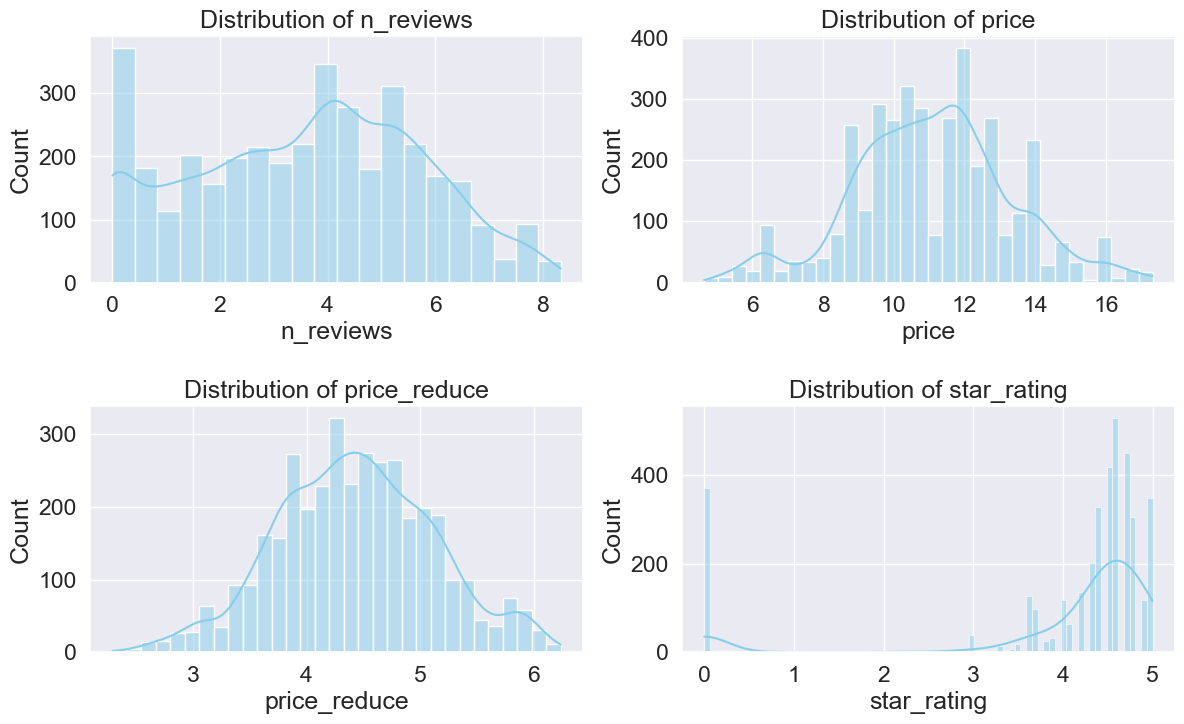

In [340]:
# Visualizing the distribution of the columns after removing skewness
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
for ax, column in zip(axs.flat, skew_columns):
    sns.histplot(data=df, x=column, ax=ax, kde=True, color='skyblue')
    ax.set_title(f"Distribution of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()

As we can see after the standardization there is no multicollinearit issue (No value is greater than 10). We can continue with model building.

## 2.5 Feature Scaling using Standard Scalarization

### 2.5.1 Separating features and label
#### 2.5.1.1 Separating features for regression model to predict Price

In [406]:
# Separating the independent and target variables into x and y 
x = df.drop(['price','price_reduce'], axis=1)
y = df['price']

print(f"Feature Dimension = {x.shape}")
print(f"Label Dimension = {y.shape}")
display(x.head())
display(y.head())

Feature Dimension = (3775, 16)
Label Dimension = (3775,)


Category  no_colors  count_of_sizes  other_color  n_reviews  size  comfort  \
0        55   0.000000              13            0   6.426488  49.0     78.0   
1        55   2.197225              15            8   4.997212  61.0     75.0   
2        55   1.791759              15           16   5.298317  59.0     78.0   
3        55   2.484907              15            7   1.098612  46.0     82.0   
4        55   1.791759              13            8   4.262680  43.0     78.0   

   quality  star_rating  Category_gral  color_1_  color_2_  color_3_  \
0    44.66          4.8              1         0         0         3   
1    50.78          4.5              1         0         1         3   
2    46.67          4.6              1         0         1         3   
3    60.00          5.0              1         0         1         3   
4    54.62          4.6              1         0         1         3   

   color_4_  ShoeName_enc  product_code_enc  
0         0      0.014091          0.000239  
1         2      0.000239          0.000239  
2         0      0.000955          0.000239  
3         0      0.000955          0.000239  
4         0      0.000955          0.000239

0    10.723805
1     9.486833
2     8.944272
3    12.649111
4    11.832160
Name: price, dtype: float64

#### 2.5.1.2 Separating features for regression model to predict star_rating
We choose price over price_reduce to build the regression model.

In [346]:
# Separating the independent and target variables into x and y 
x2 = df.drop(['star_rating', 'price_reduce'], axis=1)
y2 = df['star_rating']

print(f"Feature Dimension = {x2.shape}")
print(f"Label Dimension = {y2.shape}")
display(x2.head())
display(y2.unique())

Feature Dimension = (3775, 16)
Label Dimension = (3775,)


Category  no_colors      price  count_of_sizes  other_color  n_reviews  \
0        55   0.000000  10.723805              13            0   6.426488   
1        55   2.197225   9.486833              15            8   4.997212   
2        55   1.791759   8.944272              15           16   5.298317   
3        55   2.484907  12.649111              15            7   1.098612   
4        55   1.791759  11.832160              13            8   4.262680   

   size  comfort  quality  Category_gral  color_1_  color_2_  color_3_  \
0  49.0     78.0    44.66              1         0         0         3   
1  61.0     75.0    50.78              1         0         1         3   
2  59.0     78.0    46.67              1         0         1         3   
3  46.0     82.0    60.00              1         0         1         3   
4  43.0     78.0    54.62              1         0         1         3   

   color_4_  ShoeName_enc  product_code_enc  
0         0      0.014091          0.000239  
1         2      0.000239          0.000239  
2         0      0.000955          0.000239  
3         0      0.000955          0.000239  
4         0      0.000955          0.000239

array([4.8, 4.5, 4.6, 5. , 4.7, 4.4, 0. , 4. , 4.3, 4.1, 4.9, 3.3, 3. ,
       3.7, 4.2, 3.9, 3.6, 3.8, 3.5, 2. , 2.5, 3.4, 1. , 2.6, 3.2, 2.8,
       2.3, 3.1, 1.9])

### 2.5.2 Scaling Data
#### 2.5.2.1 Scaling the data for regression model to predict price

In [407]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling data 
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

print(f"\n\n{'*'*30} x features for regression model 1 to predict Price {'*'*30}")
display(x.head())



****************************** x features for regression model 1 to predict Price ******************************


Category  no_colors  count_of_sizes  other_color  n_reviews      size  \
0  1.105622  -1.231761        0.650740    -1.408216   1.327657 -0.007489   
1  1.105622   1.327161        0.965379     0.259292   0.657932  2.124344   
2  1.105622   0.854950        0.965379     1.926799   0.799023  1.769038   
3  1.105622   1.662201        0.965379     0.050853  -1.168860 -0.540447   
4  1.105622   0.854950        0.650740     0.259292   0.313748 -1.073406   

    comfort   quality  star_rating  Category_gral  color_1_  color_2_  \
0 -0.696623 -1.817189     0.557125       1.194844  -0.52965 -0.884977   
1 -1.090029 -1.446819     0.342292       1.194844  -0.52965  1.129973   
2 -0.696623 -1.695548     0.413903       1.194844  -0.52965  1.129973   
3 -0.172082 -0.888844     0.700347       1.194844  -0.52965  1.129973   
4 -0.696623 -1.214431     0.413903       1.194844  -0.52965  1.129973   

   color_3_  color_4_  ShoeName_enc  product_code_enc  
0  0.491292  -0.76690      6.356809         -0.217035  
1  0.491292   1.30395     -0.492547         -0.217035  
2  0.491292  -0.76690     -0.138270         -0.217035  
3  0.491292  -0.76690     -0.138270         -0.217035  
4  0.491292  -0.76690     -0.138270         -0.217035

#### 2.5.2.2 Scaling the data for classification model to predict Price range

In [348]:
scaler2 = StandardScaler()

# Scaling data 
x2 = pd.DataFrame(scaler2.fit_transform(x2), columns = x2.columns)

print(f"\n\n{'*'*30} x2 features for regression model 2 to predict star_rating {'*'*30}")
display(x2.head())



****************************** x2 features for regression model 2 to predict star_rating ******************************


Category  no_colors     price  count_of_sizes  other_color  n_reviews  \
0  1.105622  -1.231761 -0.166045        0.650740    -1.408216   1.327657   
1  1.105622   1.327161 -0.723270        0.965379     0.259292   0.657932   
2  1.105622   0.854950 -0.967679        0.965379     1.926799   0.799023   
3  1.105622   1.662201  0.701255        0.965379     0.050853  -1.168860   
4  1.105622   0.854950  0.333240        0.650740     0.259292   0.313748   

       size   comfort   quality  Category_gral  color_1_  color_2_  color_3_  \
0 -0.007489 -0.696623 -1.817189       1.194844  -0.52965 -0.884977  0.491292   
1  2.124344 -1.090029 -1.446819       1.194844  -0.52965  1.129973  0.491292   
2  1.769038 -0.696623 -1.695548       1.194844  -0.52965  1.129973  0.491292   
3 -0.540447 -0.172082 -0.888844       1.194844  -0.52965  1.129973  0.491292   
4 -1.073406 -0.696623 -1.214431       1.194844  -0.52965  1.129973  0.491292   

   color_4_  ShoeName_enc  product_code_enc  
0  -0.76690      6.356809         -0.217035  
1   1.30395     -0.492547         -0.217035  
2  -0.76690     -0.138270         -0.217035  
3  -0.76690     -0.138270         -0.217035  
4  -0.76690     -0.138270         -0.217035

## 2.6 Muticollinearity Analysis and Feature Selection


### 2.6.1 Checking Variance Inflation Factor (VIF)

#### 2.6.1.1 Checking VIF for regression model 1 to predict Average Cost for two 

In [408]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

Features  VIF values
0           Category    9.978303
9      Category_gral    9.785483
4          n_reviews    2.339464
1          no_colors    2.321095
8        star_rating    1.635497
14      ShoeName_enc    1.542527
7            quality    1.339374
13          color_4_    1.282902
5               size    1.282847
10          color_1_    1.280506
11          color_2_    1.275893
2     count_of_sizes    1.221930
12          color_3_    1.169641
6            comfort    1.109711
3        other_color    1.089533
15  product_code_enc    1.026868

As we can see after the standardization there is no multicollinearit issue (No value is greater than 10). We can continue with model building.

#### 2.6.1.2 Checking VIF for classification model to predict star_rating

In [350]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x2.columns
vif['VIF values'] = [variance_inflation_factor(x2.values, i) for i in range(len(x2.columns))]

vif.sort_values(by='VIF values', ascending=False)

Features  VIF values
0           Category    9.945239
9      Category_gral    9.743539
1          no_colors    2.315678
5          n_reviews    1.769507
14      ShoeName_enc    1.540958
13          color_4_    1.288474
6               size    1.284079
10          color_1_    1.281036
8            quality    1.277637
11          color_2_    1.276124
3     count_of_sizes    1.234294
12          color_3_    1.170553
2              price    1.104490
4        other_color    1.089166
7            comfort    1.077788
15  product_code_enc    1.029903

As we can see after the standardization there is no multicollinearit issue (No value is greater than 10). We can continue with model building.

# 3. Modeling for predicting Price

In [351]:
# Import Regression Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

## 3.1 Finding the best random state

In [352]:
def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        # Adapt to Regression Models
        acc = r2_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]


In [409]:
%%time
# Build the modelDecisionTreeRegressor

# model = LinearRegression()
model = DecisionTreeRegressor()
random_state, acc = find_best_random_state(model, x, y) 
print(f"Maximum r2 score is {round(acc,4)} at random_state {random_state}")

Maximum r2 score is 0.4074 at random_state 23
Wall time: 3.9 s


Linear Regression model achieved 40.74% as the R2 score.

Metrics: Mean Square Error (MSE): measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.

## 3.2 Creating train test split

In [410]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (2642, 16)
x_test shape:   (1133, 16)
y_train shape:  (2642,)
y_test shape:   (1133,)


## 3.3 Regression Algoritms

In [411]:
# Setting a DataFrame to save the evaluation of each model
eval_model = pd.DataFrame(columns=['id', 'Model', 'RMSE', 'R2_Score(test)', 'CV_Mean'])

In [412]:
eval_model

Empty DataFrame
Columns: [id, Model, RMSE, R2_Score(test), CV_Mean]
Index: []

### 3.3.1 Linear Regression

In [413]:
lm = LinearRegression()
lm.fit(x_train, y_train)

print("LR coef_        :", lm.coef_)
print("\nLR intercept_ :", lm.intercept_)
print("LR score train  :", lm.score(x_train, y_train))
print("LR score test   :", lm.score(x_test, y_test))

# Predict the value
y_pred = lm.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lm, x, y, cv=10, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id':'LinearRegression', 'Model': lm, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

LR coef_        : [-0.1231275   0.00998844  0.25415472  0.11014549 -0.16594158  0.11733929
 -0.17832933  0.29596251  0.20591045  0.11589653 -0.05331112 -0.03189771
  0.16421299  0.1565617   0.30022976  0.11608765]

LR intercept_ : 11.072524976391461
LR score train  : 0.10724646729678722
LR score test   : 0.0742272609881035
********** E R R O R **********
Mean squared error: 4.6292
Root Mean squared error: 2.1516
Cross-validation results (R2): [ 0.00391151 -0.08312167 -0.09945326  0.10253656 -0.04295156  0.03899293
 -0.14714777 -0.05011413 -0.5331209  -0.55125917]
Average R2: -0.1362
R2_Score(test): 0.0742


### 3.3.2 Random Forest Regressor

In [414]:
%%time
# Create the model
model = RandomForestRegressor()

# Define the hyperparameter grid  
param_dist = {
    'n_estimators': np.arange(10, 200, 10),  # number of trees
    'max_depth': [None] + list(np.arange(10, 110, 10)),  # maximum depth of trees
    'min_samples_split': np.arange(2, 11),  # minimum samples required to split
    'min_samples_leaf': np.arange(1, 11),   # minimum samples required for a leaf
    'bootstrap': [True, False]  # Bootstrap sampling
}

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=random_state)
# Fit the model 
random_search.fit(x_train, y_train)

Wall time: 22.4 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=23)

In [415]:
random_search.best_estimator_

RandomForestRegressor(max_depth=40, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=120)

In [416]:
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_
best_score = random_search.best_score_
print(f"Best parameters : {best_params}")
print(f"Best score : {best_score}")
print ("Best Estimator: ", best_estimator)

# Predict the value
y_pred = best_estimator.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2_score_test = best_estimator.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {best_score}" )
print(f"Average R2: {best_score.mean():.4f}")
print(f"R2_Score(test): {r2_score_test:.4f}")

model_scores = {'id':'Random Forest Regressor', 'Model': best_estimator, 'RMSE': r_mse, 'R2_Score(test)': r2_score_test, 'CV_Mean': best_score }
eval_model = eval_model.append(model_scores, ignore_index=True)

Best parameters : {'n_estimators': 120, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 40, 'bootstrap': True}
Best score : 0.5291451942340334
Best Estimator:  RandomForestRegressor(max_depth=40, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=120)
********** E R R O R **********
Mean squared error: 2.1674
Root Mean squared error: 1.4722
Cross-validation results (R2): 0.5291451942340334
Average R2: 0.5291
R2_Score(test): 0.5666


### 3.3.3 Decision Tree Regressor

In [417]:
# Create the decision tree regression model
dtr = DecisionTreeRegressor(random_state=random_state)
dtr.fit(x_train, y_train)

# Predict the value
y_pred = dtr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(dtr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = dtr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Decision Tree Regressor', 'Model': dtr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 3.1652
Root Mean squared error: 1.7791
Cross-validation results (R2): [-0.89568268  0.10888368 -0.15042332 -0.24924526 -2.74592404]
Average R2: -0.7865
R2_Score(test): 0.3670


### 3.3.4 K Neighbors Regressor

In [418]:
# Create the KNN model
knn = KNN()
knn.fit(x_train, y_train)

# Predict the value
y_pred = knn.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(knn, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = knn.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'K Neighbors Regressor', 'Model': knn, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 3.9872
Root Mean squared error: 1.9968
Cross-validation results (R2): [-0.51674013 -0.01871684  0.00817077 -0.26019005 -1.29415303]
Average R2: -0.4163
R2_Score(test): 0.2026


### 3.3.5 Gradient Boosting Regressor

In [419]:
%%time
# Create the GradientBoostingRegressor model
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

# Predict the value
y_pred = gbr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(gbr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = gbr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Gradient Boosting Regressor', 'Model': gbr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 3.0414
Root Mean squared error: 1.7439
Cross-validation results (R2): [-0.01960107  0.1674878   0.24373636  0.253793   -0.4921015 ]
Average R2: 0.0307
R2_Score(test): 0.3918
Wall time: 2.45 s


### 3.3.6 Lasso

In [420]:
%%time
# Create the Lasso model
lasso = Lasso()
lasso.fit(x_train, y_train)

# Predict the value
y_pred = lasso.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lasso, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = lasso.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Lasso', 'Model': lasso, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 5.0032
Root Mean squared error: 2.2368
Cross-validation results (R2): [-5.24456786e-06 -4.19403195e-05 -1.17823302e-01 -1.47011238e-01
 -6.63632235e-01]
Average R2: -0.1857
R2_Score(test): -0.0006
Wall time: 50.8 ms


### 3.3.7 Ridge

In [421]:
%%time 
# Create the Ridge model
rd = Ridge()
rd.fit(x_train, y_train)

# Predict the value
y_pred = rd.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(rd, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = rd.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Ridge', 'Model': rd, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 4.6292
Root Mean squared error: 2.1516
Cross-validation results (R2): [-0.07783218  0.04127882 -0.00483233 -3.61089227 -0.48135339]
Average R2: -0.8267
R2_Score(test): 0.0742
Wall time: 38.9 ms


### 3.3.8 Support Vector Regressor

In [422]:
%%time
# Create the Ridge model
svr = SVR()
svr.fit(x_train, y_train)

# Predict the value
y_pred = svr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(svr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = svr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'SVR', 'Model': svr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 3.9169
Root Mean squared error: 1.9791
Cross-validation results (R2): [-0.08689642  0.06413336  0.0484904  -0.0162598  -0.80167914]
Average R2: -0.1584
R2_Score(test): 0.2167
Wall time: 4.93 s


In [423]:
# Calculate the difference between R2 score and cross-validation score 
eval_model['Dif_R2_CVmean'] = eval_model['R2_Score(test)'] - eval_model['CV_Mean']

# Presenting the results ordered
eval_model.sort_values(['CV_Mean','Dif_R2_CVmean'], ascending=[False,True])

id  \
1      Random Forest Regressor   
4  Gradient Boosting Regressor   
0             LinearRegression   
7                          SVR   
5                        Lasso   
3        K Neighbors Regressor   
2      Decision Tree Regressor   
6                        Ridge   

                                               Model      RMSE  \
1  (DecisionTreeRegressor(max_depth=40, max_featu...  1.472216   
4  ([DecisionTreeRegressor(criterion='friedman_ms...  1.743947   
0                                 LinearRegression()  2.151569   
7                                              SVR()  1.979125   
5                                            Lasso()  2.236791   
3                              KNeighborsRegressor()  1.996795   
2             DecisionTreeRegressor(random_state=23)  1.779106   
6                                            Ridge()  2.151567   

   R2_Score(test)   CV_Mean  Dif_R2_CVmean  
1        0.566552  0.529145       0.037407  
4        0.391780  0.030663       0.361117  
0        0.074227 -0.136173       0.210400  
7        0.216678 -0.158442       0.375120  
5       -0.000564 -0.185703       0.185139  
3        0.202628 -0.416326       0.618954  
2        0.367009 -0.786478       1.153487  
6        0.074229 -0.826726       0.900955

From the summary of the models results and comparing the cross-validation scores (CV_Mean) and R2 score (test), we conclude Random Forest Regressor is our best-performing model since the two metrics are very close (Difference: 0.037407), this indicates that the model is performing consistently on both the test set and across different folds in cross-validation.

This consistency is a positive sign, suggesting that the model generalizes well to new data.

In order to apply Hyper Parameter tunning we are going to select **Random Forest Regressor as our final model.**

## 3.4 Hyper Parameter Tuning
### 3.4.1 Finding the best parameters for Random Forest Regressor

In [424]:
random_state

23

In [425]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [426]:
%%time
# Random Forest Regressor
param_dist = {
    'n_estimators': np.arange(10, 200, 10),  # Vary the number of trees
    'max_depth': [None] + list(np.arange(10, 110, 10)),  # Vary the maximum depth of trees
    'min_samples_split': np.arange(2, 11),  # Vary the minimum samples required to split
    'min_samples_leaf': np.arange(1, 11),  # Vary the minimum samples required for a leaf
    'bootstrap': [True, False]  # Bootstrap sampling
}

# Build the model 
model = RandomForestRegressor()

# Perform search with cross validation
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=random_state)
random_search.fit(x_train, y_train)

Wall time: 9.28 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=23, scoring='neg_mean_squared_error')

In [427]:
# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters for RandomForestRegressor model:")
best_params

Best Parameters for RandomForestRegressor model:


{'n_estimators': 120,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': 40,
 'bootstrap': True}

These are the best parameters for training the model.

In [428]:
best_model

RandomForestRegressor(max_depth=40, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=120)

## 3.5 Final Regression Model to predict Price

In [433]:
# Create the model with the best parameters
best_model = RandomForestRegressor(max_depth=40, 
                                   min_samples_leaf=2, 
                                   min_samples_split=10,
                                   n_estimators=120)


best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the r2 score
r2_score_val = r2_score(y_test, y_pred)
print(f"Maximum R2 score: {r2_score_val*100:.2f}%")

Maximum R2 score: 56.93%


In [444]:
# Create the model with the best parameters
best_model = RandomForestRegressor(max_depth=100, 
                                   #min_samples_leaf=2, 
                                   min_samples_split=9, 
                                   n_estimators=120)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the r2 score
r2_score_val = r2_score(y_test, y_pred)
print(f"Maximum R2 score: {r2_score_val*100:.2f}%")

Maximum R2 score: 58.31%


Adjusting the following parameters we improve the r2 score to 58.31% for the prediction model for 'price', as follows:

* max_depth = 100
* min_samples_leaf = 1 (default value)
* min_samples_split = 9

### 3.5.1 Saving the model

In [437]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model, "models/price_regressor_model.pkl")

['models/price_regressor_model.pkl']

### 3.5.2  Predicting the saved model

In [445]:
# Lets load the saved model and get the predictions
model = joblib.load("models/price_regressor_model.pkl")

# Prediction
prediction = model.predict(x_test)

# Maximum R2 score of the prediction with the model selected
print(f"Maximum R2 score: {r2_score(y_test, prediction)*100:.3f} %")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)

# Reversing the square-root transformation
df_result['Predicted_final'] = np.power(prediction,2)
df_result['Original_final'] = np.power(np.array(y_test),2)

df_result.T

Maximum R2 score: 56.900 %


0          1           2          3           4     \
Predicted         10.500666   9.744966   11.532737   6.414759   10.267885   
Original          12.649111   9.486833   11.832160   6.324555   10.000000   
Predicted_final  110.263988  94.964357  133.004025  41.149133  105.429457   
Original_final   160.000000  90.000000  140.000000  40.000000  100.000000   

                       5           6           7           8           9     \
Predicted         11.879790   12.083293   12.484338   11.020423   13.818787   
Original          14.142136   11.401754   12.247449   10.488088   15.811388   
Predicted_final  141.129414  146.005964  155.858707  121.449732  190.958881   
Original_final   200.000000  130.000000  150.000000  110.000000  250.000000   

                 ...        1123        1124        1125        1126  \
Predicted        ...   12.036351   12.332239   11.557302    9.874636   
Original         ...   11.401754   10.954451   10.000000   10.000000   
Predicted_final  ...  144.873747  152.084123  133.571240   97.508443   
Original_final   ...  130.000000  120.000000  100.000000  100.000000   

                       1127        1128       1129        1130        1131  \
Predicted         11.547254   11.017879   9.908819   11.249364   10.905829   
Original          10.488088   10.954451   9.219544   10.954451   10.488088   
Predicted_final  133.339073  121.393659  98.184691  126.548199  118.937115   
Original_final   110.000000  120.000000  85.000000  120.000000  110.000000   

                       1132  
Predicted         10.571161  
Original           7.071068  
Predicted_final  111.749451  
Original_final    50.000000  

[4 rows x 1133 columns]

These are the predicted values in a dataset to compared the prediction with the test data with R2 score 56.900%.

Since we transformed the 'Price' target variable with the square-root transform method, we need to reverse the transformation with the predicted values, stored in Predicted_final.

# 4. Modeling for predicting star_rating

## 4.1 Finding the best random state

In [368]:
%%time
# Build the model  

model = DecisionTreeRegressor()
random_state, acc = find_best_random_state(model, x2, y2) 
print(f"Maximum r2 score is {round(acc,4)} at random_state {random_state}")

Maximum r2 score is 0.9522 at random_state 96
Wall time: 3.82 s


Linear Regression model achieved 95.22% as the R2 score.

Metrics: Mean Square Error (MSE): measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.

## 4.2 Creating train test split

In [369]:
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (2642, 16)
x_test shape:   (1133, 16)
y_train shape:  (2642,)
y_test shape:   (1133,)


## 4.3 Regression Algoritms

In [370]:
# Setting a DataFrame to save the evaluation of each model
eval_model2 = pd.DataFrame(columns=['id', 'Model', 'RMSE', 'R2_Score(test)', 'CV_Mean'])

In [371]:
eval_model2

Empty DataFrame
Columns: [id, Model, RMSE, R2_Score(test), CV_Mean]
Index: []

### 4.3.1 Linear Regression

In [372]:
lm = LinearRegression()
lm.fit(x_train, y_train)

print("LR coef_        :", lm.coef_)
print("\nLR intercept_ :", lm.intercept_)
print("LR score train  :", lm.score(x_train, y_train))
print("LR score test   :", lm.score(x_test, y_test))

# Predict the value
y_pred = lm.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lm, x, y, cv=10, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id':'LinearRegression', 'Model': lm, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model2 = eval_model2.append(model_scores, ignore_index=True)

LR coef_        : [-0.206576   -0.0866666   0.08400278  0.01171437  0.04872371  0.80035526
 -0.021465    0.20722127  0.32372838  0.23704941  0.01121619 -0.02105064
  0.06285367  0.05299388 -0.16001841 -0.00622612]

LR intercept_ : 4.036336206497371
LR score train  : 0.3797432781992036
LR score test   : 0.4097035615543724
********** E R R O R **********
Mean squared error: 1.2556
Root Mean squared error: 1.1206
Cross-validation results (R2): [ 0.00391151 -0.08312167 -0.09945326  0.10253656 -0.04295156  0.03899293
 -0.14714777 -0.05011413 -0.5331209  -0.55125917]
Average R2: -0.1362
R2_Score(test): 0.4097


### 4.3.2 Random Forest Regressor

In [373]:
%%time
# Create the model
model = RandomForestRegressor()

# Define the hyperparameter grid  
param_dist = {
    'n_estimators': np.arange(10, 200, 10),  # number of trees
    'max_depth': [None] + list(np.arange(10, 110, 10)),  # maximum depth of trees
    'min_samples_split': np.arange(2, 11),  # minimum samples required to split
    'min_samples_leaf': np.arange(1, 11),   # minimum samples required for a leaf
    'bootstrap': [True, False]  # Bootstrap sampling
}

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=random_state)
# Fit the model 
random_search.fit(x_train, y_train)

Wall time: 21.6 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=96)

In [374]:
random_search.best_estimator_

RandomForestRegressor(max_depth=90, min_samples_leaf=3, min_samples_split=9,
                      n_estimators=30)

In [375]:
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_
best_score = random_search.best_score_
print(f"Best parameters : {best_params}")
print(f"Best score : {best_score}")
print ("Best Estimator: ", best_estimator)

# Predict the value
y_pred = best_estimator.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2_score_test = best_estimator.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {best_score}" )
print(f"Average R2: {best_score.mean():.4f}")
print(f"R2_Score(test): {r2_score_test:.4f}")

model_scores = {'id':'Random Forest Regressor', 'Model': best_estimator, 'RMSE': r_mse, 'R2_Score(test)': r2_score_test, 'CV_Mean': best_score }
eval_model2 = eval_model2.append(model_scores, ignore_index=True)

Best parameters : {'n_estimators': 30, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_depth': 90, 'bootstrap': True}
Best score : 0.9418394230278218
Best Estimator:  RandomForestRegressor(max_depth=90, min_samples_leaf=3, min_samples_split=9,
                      n_estimators=30)
********** E R R O R **********
Mean squared error: 0.0716
Root Mean squared error: 0.2677
Cross-validation results (R2): 0.9418394230278218
Average R2: 0.9418
R2_Score(test): 0.9663


### 4.3.3 Decision Tree Regressor

In [376]:
# Create the decision tree regression model
dtr = DecisionTreeRegressor(random_state=random_state)
dtr.fit(x_train, y_train)

# Predict the value
y_pred = dtr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(dtr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = dtr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Decision Tree Regressor', 'Model': dtr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model2 = eval_model2.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 0.1267
Root Mean squared error: 0.3560
Cross-validation results (R2): [-0.80335621  0.13816948 -0.13319237 -0.27648125 -2.79969705]
Average R2: -0.7749
R2_Score(test): 0.9404


### 4.3.4 K Neighbors Regressor

In [377]:
# Create the KNN model
knn = KNN()
knn.fit(x_train, y_train)

# Predict the value
y_pred = knn.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(knn, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = knn.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'K Neighbors Regressor', 'Model': knn, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model2 = eval_model2.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 0.5502
Root Mean squared error: 0.7417
Cross-validation results (R2): [-0.51674013 -0.01871684  0.00817077 -0.26019005 -1.29415303]
Average R2: -0.4163
R2_Score(test): 0.7414


### 4.3.5 Gradient Boosting Regressor

In [378]:
%%time
# Create the GradientBoostingRegressor model
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

# Predict the value
y_pred = gbr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(gbr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = gbr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Gradient Boosting Regressor', 'Model': gbr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model2 = eval_model2.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 0.0834
Root Mean squared error: 0.2887
Cross-validation results (R2): [-0.02085402  0.16840897  0.24245441  0.25381895 -0.48820521]
Average R2: 0.0311
R2_Score(test): 0.9608
Wall time: 2.47 s


### 4.3.6 Lasso

In [380]:
%%time
# Create the Lasso model
lasso = Lasso()
lasso.fit(x_train, y_train)

# Predict the value
y_pred = lasso.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lasso, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = lasso.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Lasso', 'Model': lasso, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model2 = eval_model2.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 2.1376
Root Mean squared error: 1.4621
Cross-validation results (R2): [-5.24456786e-06 -4.19403195e-05 -1.17823302e-01 -1.47011238e-01
 -6.63632235e-01]
Average R2: -0.1857
R2_Score(test): -0.0049
Wall time: 50.9 ms


### 4.3.7 Ridge

In [381]:
%%time 
# Create the Ridge model
rd = Ridge()
rd.fit(x_train, y_train)

# Predict the value
y_pred = rd.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(rd, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = rd.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Ridge', 'Model': rd, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model2 = eval_model2.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 1.2557
Root Mean squared error: 1.1206
Cross-validation results (R2): [-0.07783218  0.04127882 -0.00483233 -3.61089227 -0.48135339]
Average R2: -0.8267
R2_Score(test): 0.4097
Wall time: 27.9 ms


### 4.3.8 Support Vector Regressor

In [382]:
%%time
# Create the Ridge model
svr = SVR()
svr.fit(x_train, y_train)

# Predict the value
y_pred = svr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(svr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = svr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'SVR', 'Model': svr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model2 = eval_model2.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 0.4268
Root Mean squared error: 0.6533
Cross-validation results (R2): [-0.08689642  0.06413336  0.0484904  -0.0162598  -0.80167914]
Average R2: -0.1584
R2_Score(test): 0.7993
Wall time: 4.8 s


In [383]:
# Calculate the difference between R2 score and cross-validation score 
eval_model2['Dif_R2_CVmean'] = eval_model2['R2_Score(test)'] - eval_model2['CV_Mean']

# Presenting the results ordered
eval_model2.sort_values(['CV_Mean','Dif_R2_CVmean'], ascending=[False,True])

id  \
1      Random Forest Regressor   
4  Gradient Boosting Regressor   
0             LinearRegression   
8                          SVR   
5                        Lasso   
6                        Lasso   
3        K Neighbors Regressor   
2      Decision Tree Regressor   
7                        Ridge   

                                               Model      RMSE  \
1  (DecisionTreeRegressor(max_depth=90, max_featu...  0.267662   
4  ([DecisionTreeRegressor(criterion='friedman_ms...  0.288730   
0                                 LinearRegression()  1.120555   
8                                              SVR()  0.653323   
5                                            Lasso()  1.462058   
6                                            Lasso()  1.462058   
3                              KNeighborsRegressor()  0.741745   
2             DecisionTreeRegressor(random_state=96)  0.356010   
7                                            Ridge()  1.120579   

   R2_Score(test)   CV_Mean  Dif_R2_CVmean  
1        0.966320  0.941839       0.024480  
4        0.960809  0.031125       0.929684  
0        0.409704 -0.136173       0.545876  
8        0.799341 -0.158442       0.957783  
5       -0.004923 -0.185703       0.180780  
6       -0.004923 -0.185703       0.180780  
3        0.741350 -0.416326       1.157676  
2        0.940416 -0.774911       1.715328  
7        0.409678 -0.826726       1.236405

From the summary of the models results and comparing the cross-validation scores (CV_Mean) and R2 score (test), we conclude Random Forest Regressor is our best-performing model since the two metrics are very close (Difference: 0.024480), this indicates that the model is performing consistently on both the test set and across different folds in cross-validation.

This consistency is a positive sign, suggesting that the model generalizes well to new data.

In order to apply Hyper Parameter tunning we are going to select **Random Forest Regressor as our final model.**

## 4.4 Hyper Parameter Tuning
### 4.4.1 Finding the best parameters for Random Forest Regressor

In [384]:
random_state

96

In [385]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [386]:
%%time
# Random Forest Regressor
param_dist = {
    'n_estimators': np.arange(10, 200, 10),  # Vary the number of trees
    'max_depth': [None] + list(np.arange(10, 110, 10)),  # Vary the maximum depth of trees
    'min_samples_split': np.arange(2, 11),  # Vary the minimum samples required to split
    'min_samples_leaf': np.arange(1, 11),  # Vary the minimum samples required for a leaf
    'bootstrap': [True, False]  # Bootstrap sampling
}

# Build the model 
model = RandomForestRegressor()

# Perform search with cross validation
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=random_state)
random_search.fit(x_train, y_train)

Wall time: 21.2 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=96, scoring='neg_mean_squared_error')

In [387]:
# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters for RandomForestRegressor model:")
best_params

Best Parameters for RandomForestRegressor model:


{'n_estimators': 30,
 'min_samples_split': 9,
 'min_samples_leaf': 3,
 'max_depth': 90,
 'bootstrap': True}

These are the best parameters for training the model.

In [388]:
best_model

RandomForestRegressor(max_depth=90, min_samples_leaf=3, min_samples_split=9,
                      n_estimators=30)

## 4.5 Final Regression Model to predict star_rating

In [393]:
# Create the model with the best parameters
best_model = RandomForestRegressor(max_depth=90, 
                                   min_samples_leaf=3, 
                                   min_samples_split=9,
                                   n_estimators=30)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the r2 score
r2_score_val = r2_score(y_test, y_pred)
print(f"Maximum R2 score: {r2_score_val*100:.2f}%")

Maximum R2 score: 96.72%


In [394]:
# Create the model with the best parameters
best_model = RandomForestRegressor(max_depth=70, min_samples_split=9, n_estimators=30)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the r2 score
r2_score_val = r2_score(y_test, y_pred)
print(f"Maximum R2 score: {r2_score_val*100:.2f}%")

Maximum R2 score: 96.93%


Adjusting the following parameters we improve the r2 score to 96.93% for the prediction model for 'star_rating', as follows:

* max_depth = 70
* min_samples_leaf = 1 (default value)

### 4.5.1 Saving the model

In [395]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model, "models/star_rating_regressor_model.pkl")

['models/star_rating_regressor_model.pkl']

### 4.5.2  Predicting the saved model

In [397]:
# Lets load the saved model and get the predictions
model = joblib.load("models/star_rating_regressor_model.pkl")

# Prediction
prediction = model.predict(x_test)

# Maximum R2 score of the prediction with the model selected
print(f"Maximum R2 score: {r2_score(y_test, prediction)*100:.3f} %")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)

df_result.T

Maximum R2 score: 96.931 %


0         1         2         3         4         5     \
Predicted  4.085937  4.051872  4.398333  4.768336  4.746987  4.543084   
Original   3.800000  3.900000  4.400000  4.000000  4.800000  4.600000   

               6     7         8      9     ...      1123      1124      1125  \
Predicted  4.616111   0.0  3.945661  4.782  ...  4.343315  4.453203  4.387967   
Original   4.600000   0.0  4.600000  4.800  ...  4.400000  4.500000  4.200000   

               1126     1127      1128  1129      1130      1131  1132  
Predicted  4.527774  4.28811  4.502229   0.0  4.567991  4.849124   3.6  
Original   4.500000  3.70000  4.600000   0.0  4.800000  5.000000   3.6  

[2 rows x 1133 columns]

These are the predicted values in a dataset to compared the prediction with the test data with R2 score 96.931%.

**Final Conclusions:**

* The given dataset comprises 4422 rows and 17 columns, our univariate/bivariate analysis was conducted on all 17 features. 


* We have two target variables: 'price' and 'star_rating', which are continuous, prompting the development of a regression models. 


* The chosen regression model is the RandomForestRegressor, achieving a R2 score of 56.900% for predicting 'price'.


* For predicting 'star_rating', the chosen regression model is the RandomForestRegressor, achieving a R2 score of 96.93%.


* The dataset presented duplicates, 29 rows, whose removal represented 0.688% of the data.


* Handling missing values resulted in the removal of 206 rows, constituting a 4.66% loss of data.


* Outlier treatment involved eliminating 9.84% of the total records (412 rows). Treshold was set as 3.


* The features did not presented multicollinearity issues.

_I would be glad if you could suggest me any improvements._

**Notes:**
- In order to do a better data analysis I investigated other approaches from different sources. These references as inspiration help me with the EDA process. But not in order to make an exact copy of the analysis or the code.
- All functions used in this project are my own. As we have progressed in the assignments, I have been improving the code so that they are more general and can be applied in different scenarios. I decided to do it this way to improve and progress my knowledge of python. 

By Monica Atiaga